# Расчётное задание 2a (Статическая обработка случайный последовательностей. Идентификация законов распределения)
- **Студент:** Сыров Егор Романович
- **Группа:** 5130901/30201

## Задание 1: Статистическая обработка случайных последовательностей

### 1.1: Создать 10 подвыборок

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
from scipy import stats

with open("Task_2a.txt", "r") as file:
    N = int(file.readline())
    X = np.array(tuple(map(float, file.readline().split())))

np.random.seed(42)
Xperm = np.random.permutation(X)
Xpodv = np.split(Xperm, 10)
Xpodv_sorted = [np.sort(podv) for podv in Xpodv]

### 1.2: Представить визуально оценки функции плотности распределения

### 1.2.1: Выборочная функция распределния F(x)

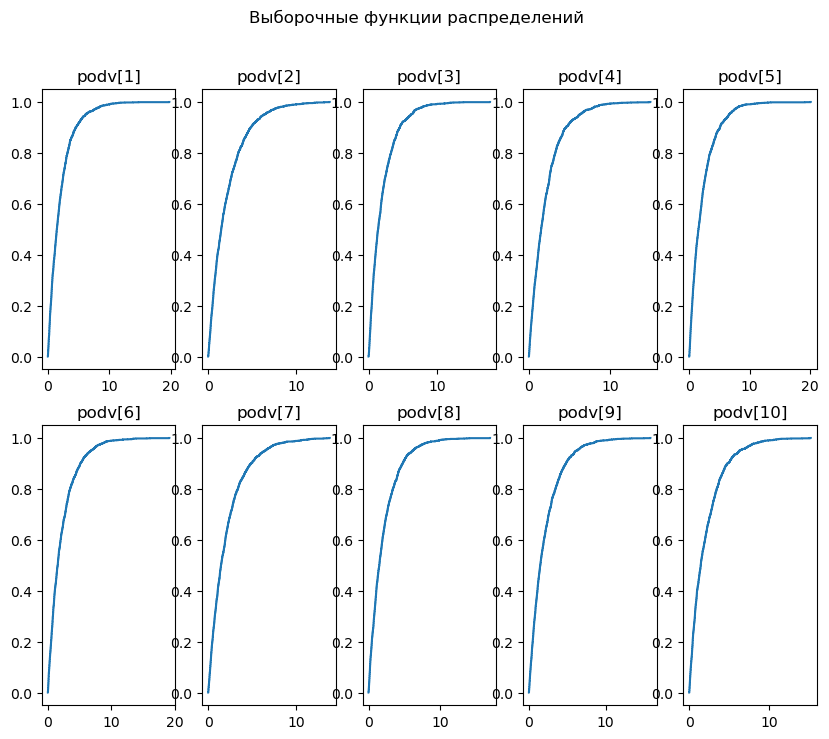

In [94]:
fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle("Выборочные функции распределений")
for index, podv in enumerate(Xpodv_sorted):
    res = scipy.stats.ecdf(podv)
    ax[index // 5, index % 5].step(
        res.cdf.quantiles, res.cdf.probabilities, where="post"
    )
    ax[index // 5, index % 5].set_title(f"podv[{index + 1}]")

### 1.2.2: Абсолютные и относительные гистограммы распределений

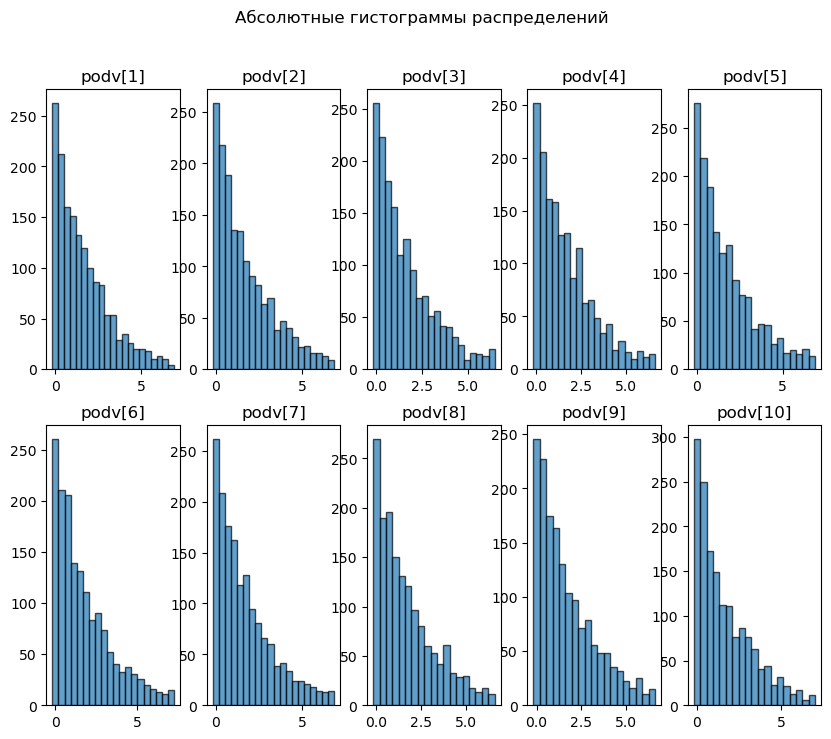

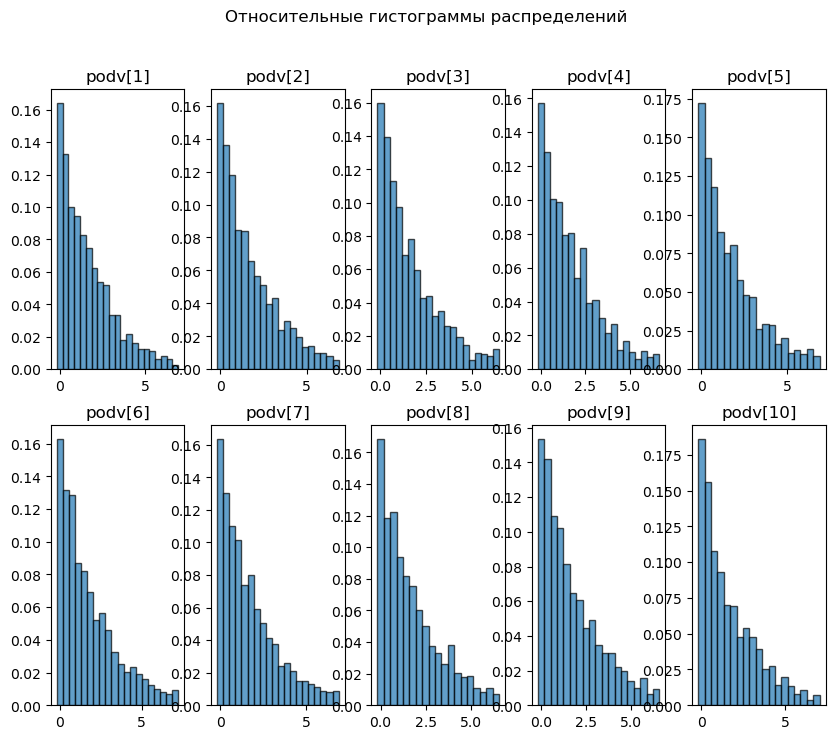

In [95]:
fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle("Абсолютные гистограммы распределений")
for index, podv in enumerate(Xpodv_sorted):
    counts, bin_edges = np.histogram(podv[:-60], bins="fd")
    ax[index // 5, index % 5].bar(
        bin_edges[:-1], counts, width=np.diff(bin_edges), alpha=0.7, edgecolor="black"
    )
    ax[index // 5, index % 5].set_title(f"podv[{index + 1}]")

fig, ax = plt.subplots(2, 5, figsize=(10, 8))
fig.suptitle("Относительные гистограммы распределений")
for index, podv in enumerate(Xpodv_sorted):
    counts, bin_edges = np.histogram(podv[:-60], bins="fd")
    ax[index // 5, index % 5].bar(
        bin_edges[:-1],
        counts / len(podv[:-60]),
        width=np.diff(bin_edges),
        alpha=0.7,
        edgecolor="black",
    )
    ax[index // 5, index % 5].set_title(f"podv[{index + 1}]")

### 1.2.3: Оценки плотности распределений с применением ядерного оценивания

**Функции ядер**

In [96]:
# Прямоугольное (равномерное ядро)
def uniform_kernel(u):
    return np.where(np.abs(u) < 0.5, 1.0, 0.0)


# Гауссово ядро
def gaussian_kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)


# Экспоненциальное ядро (Лапласа)
def laplas_kernel(u):
    return 1 / 2 * np.exp(-np.abs(u))


# Ядро Коши
def koshi_kernel(u):
    return 1 / np.pi / (1 + u**2)


# Треугольное ядро
def triangle_kernel(u):
    return np.where(np.abs(u) < 1, 1 - np.abs(u), 0)


# Восстанавливающий фильтр
def restorative_filter(u):
    return 1 / (2 * np.pi) * (np.sin(u / 2) / (u / 2)) ** 2

**Ядерная оценка плотности для различных ядер**


Подвыборка 1:


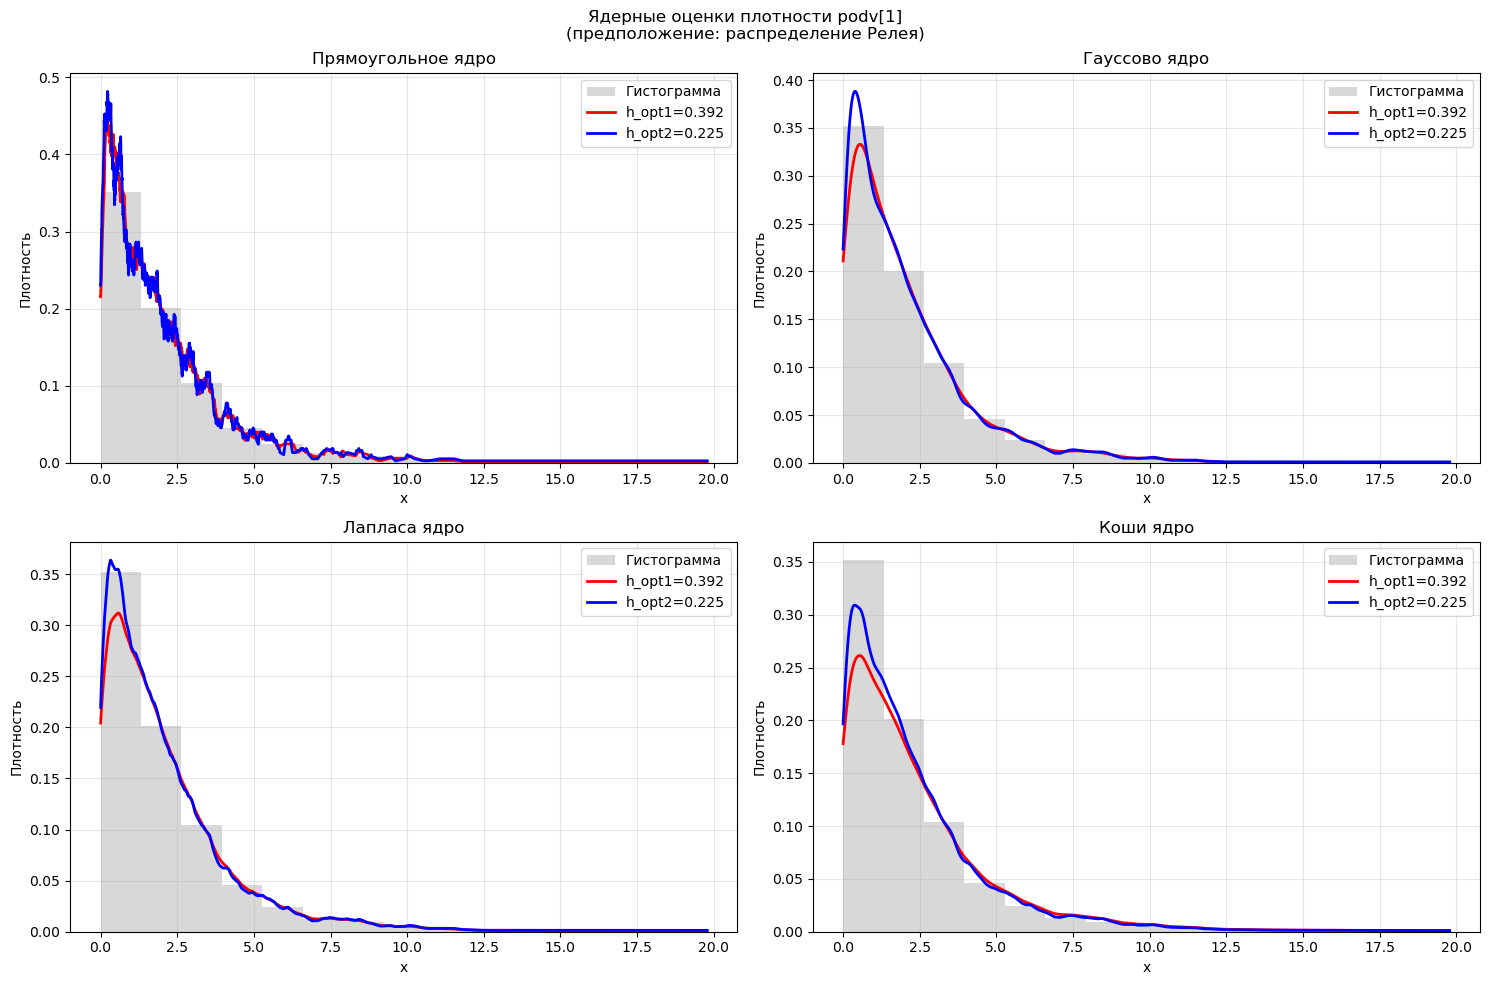


Подвыборка 2:


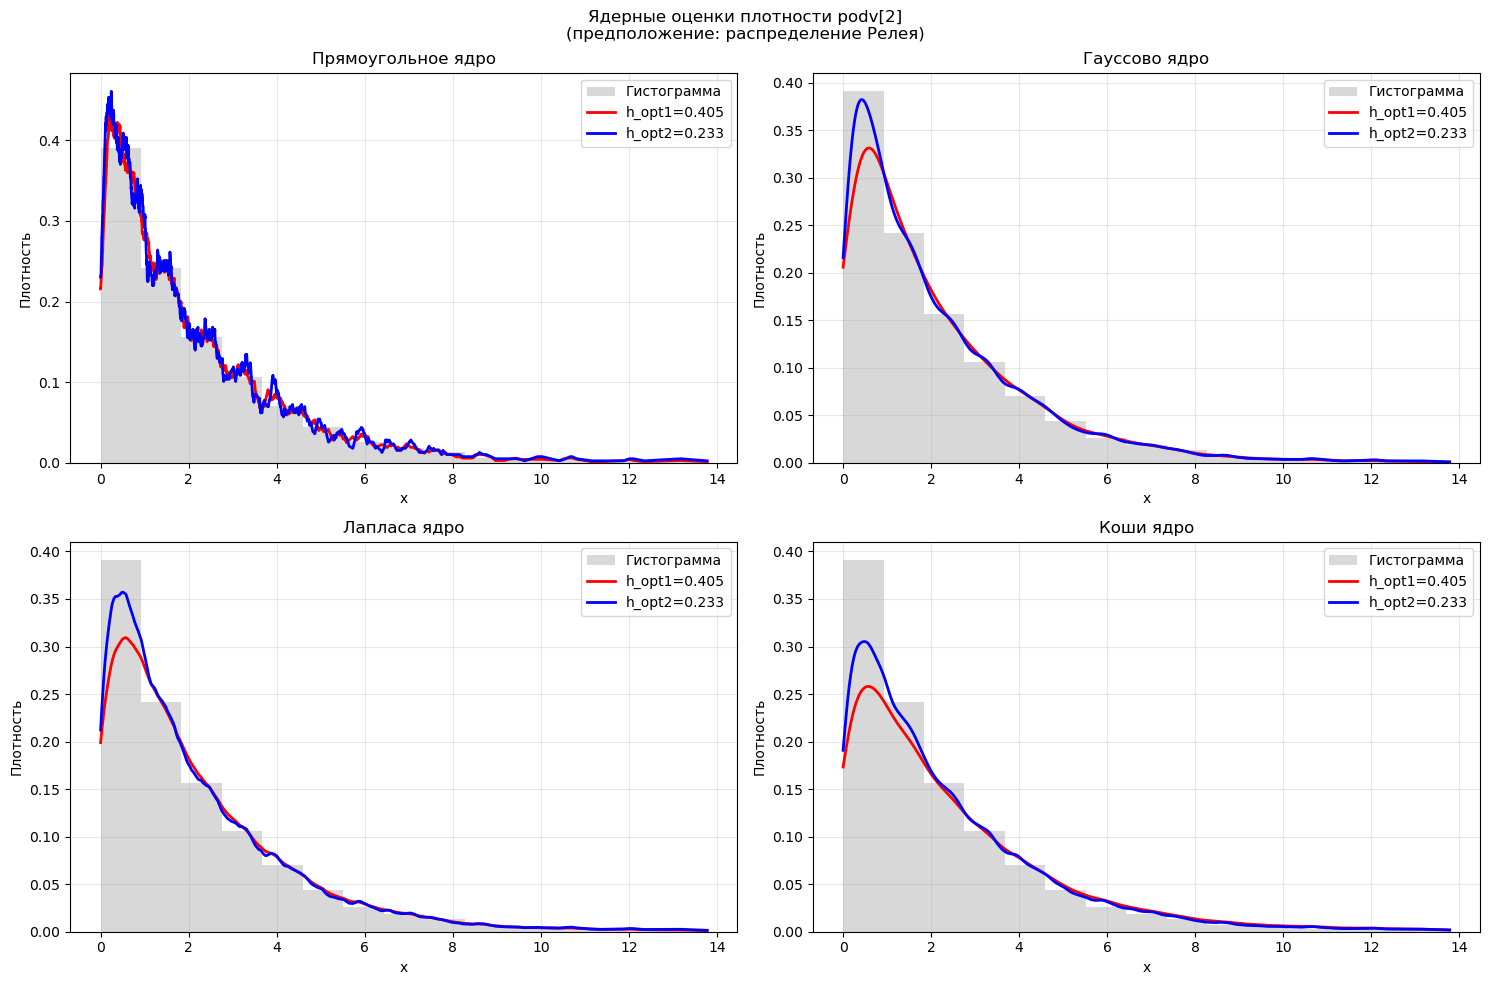


Подвыборка 3:


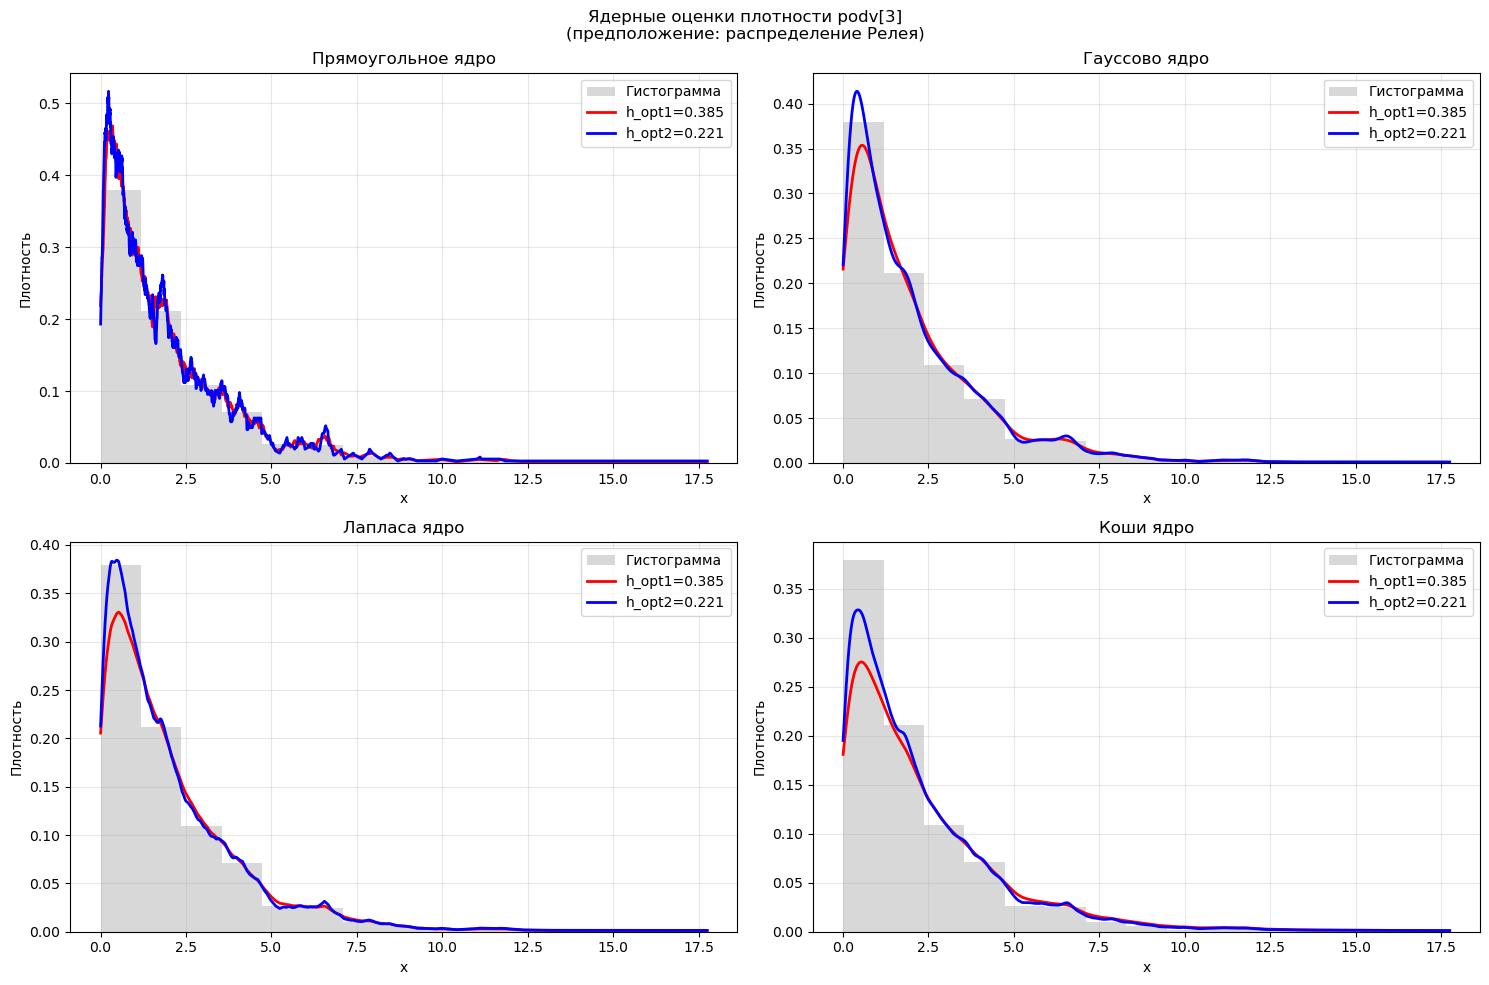


Подвыборка 4:


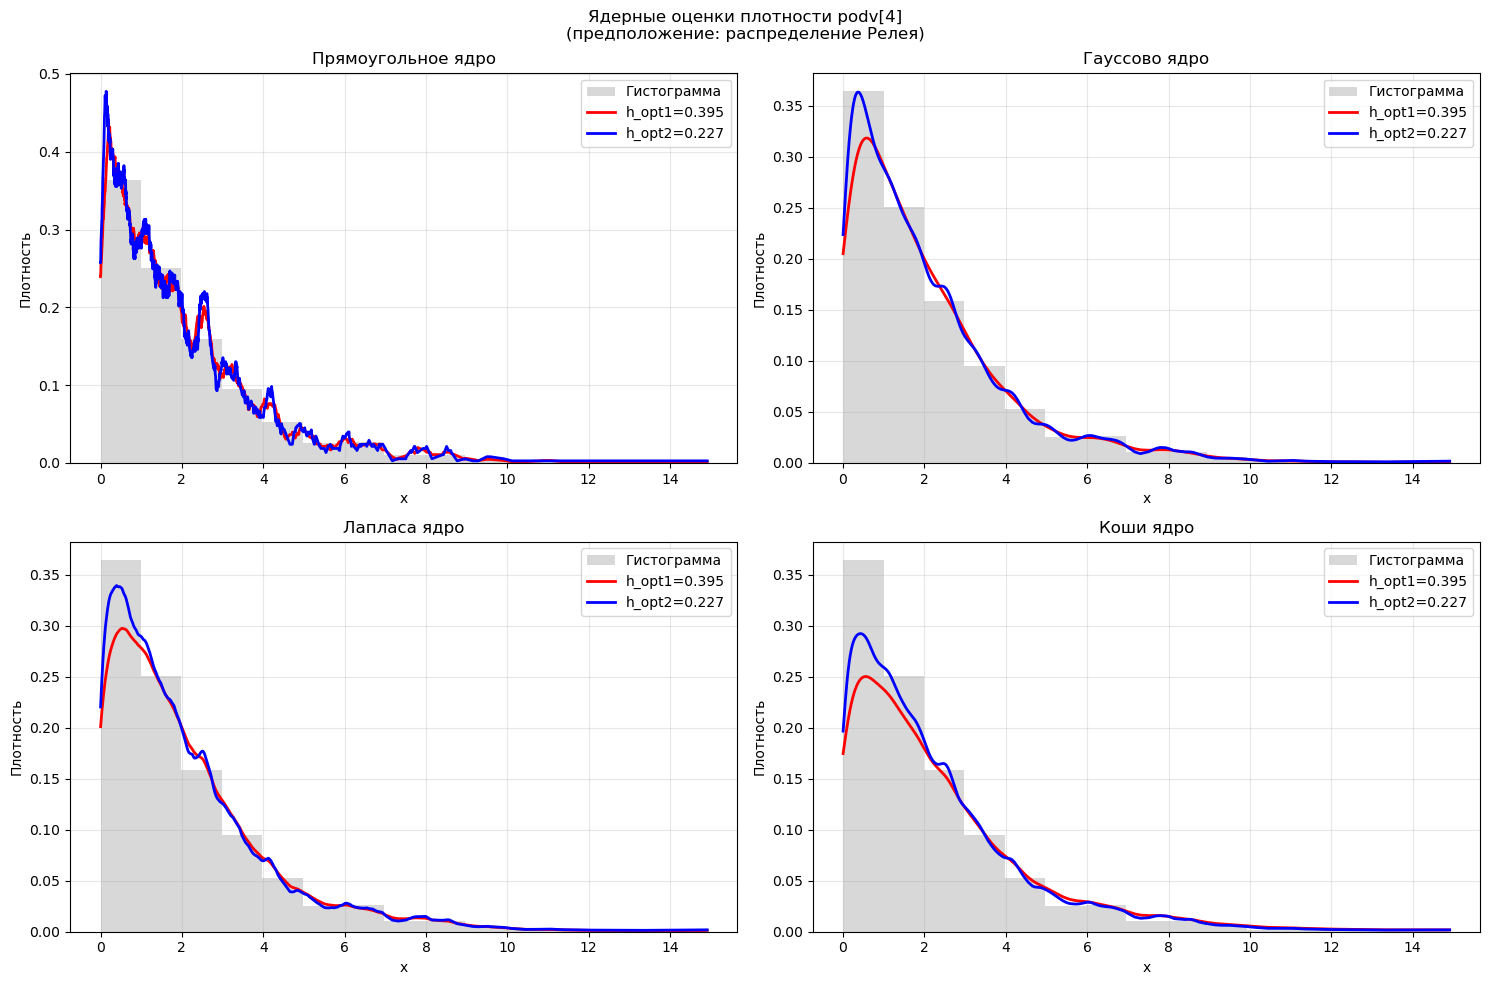


Подвыборка 5:


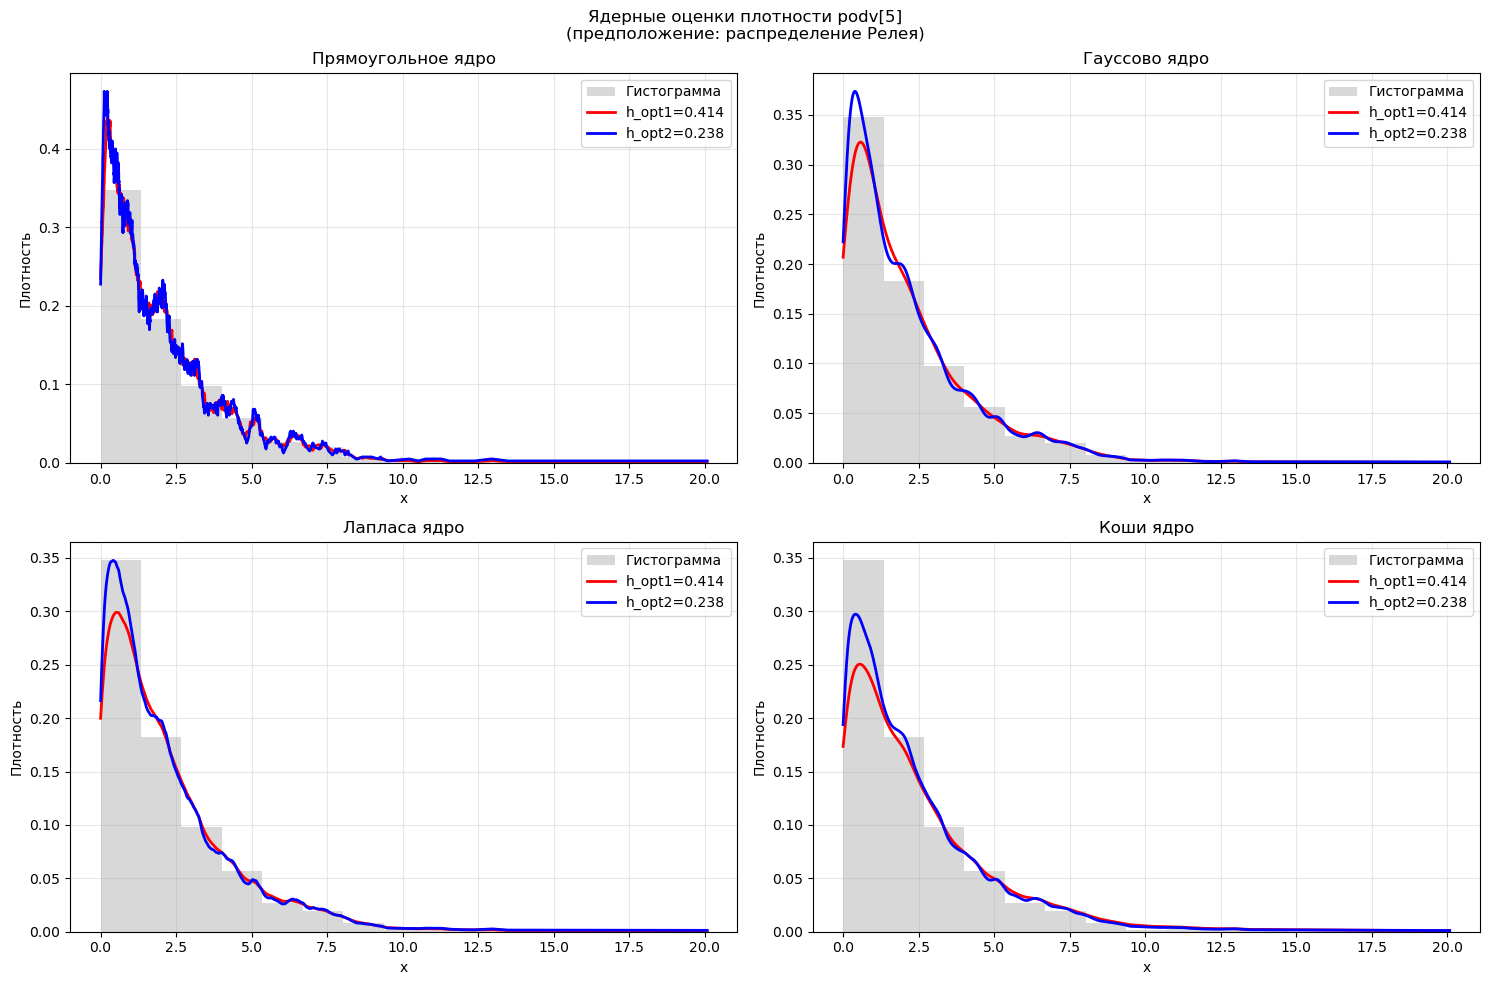


Подвыборка 6:


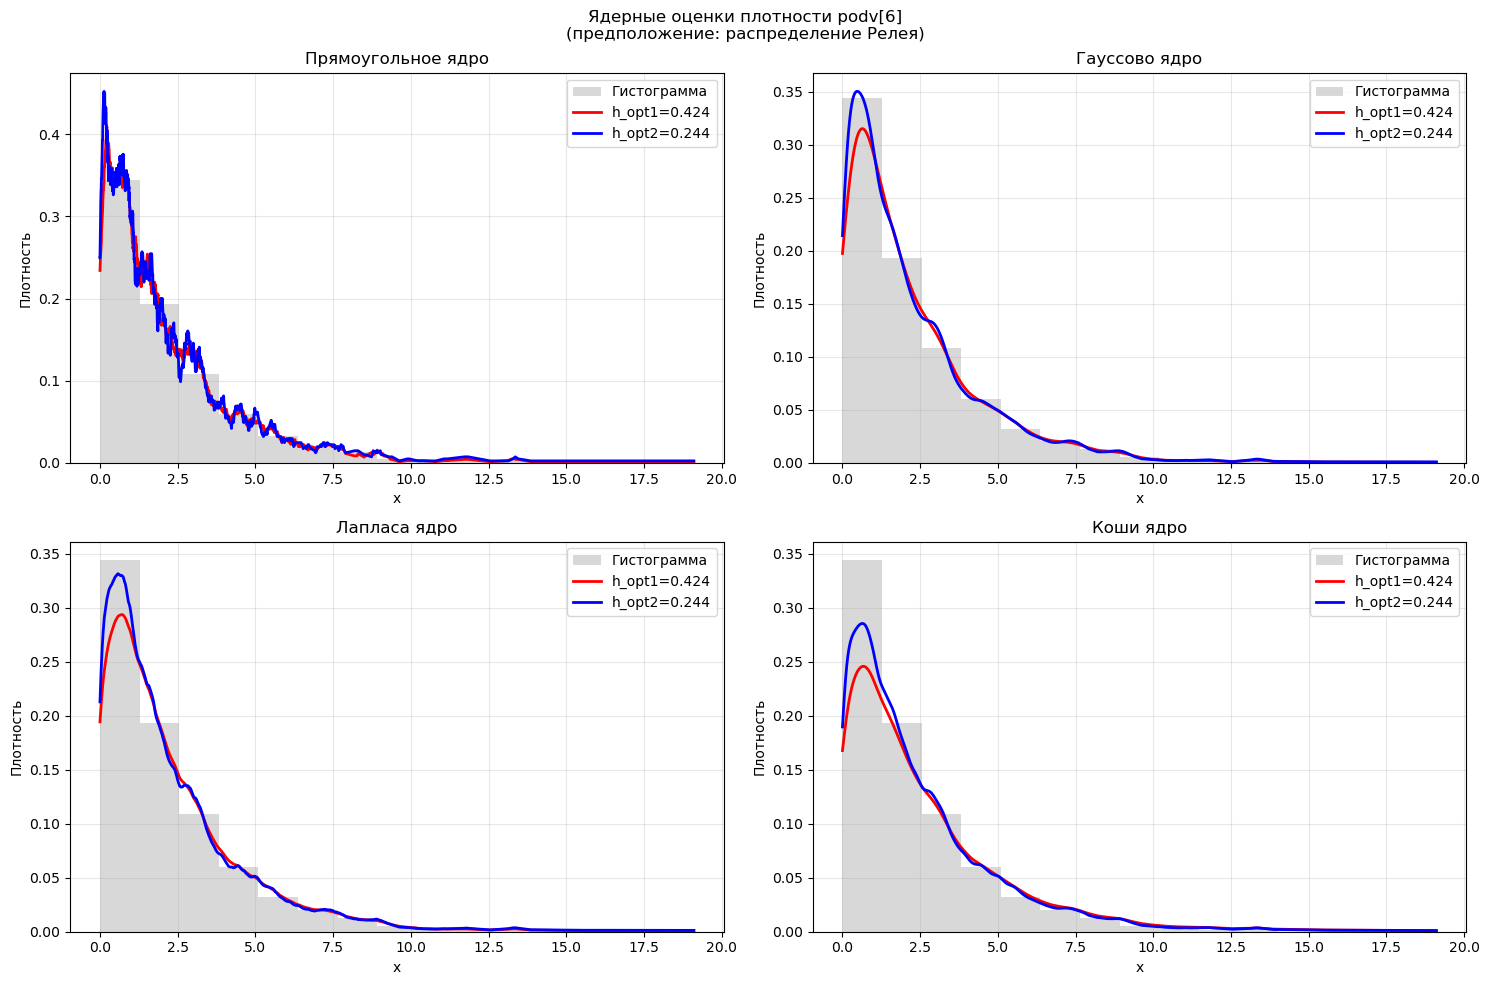


Подвыборка 7:


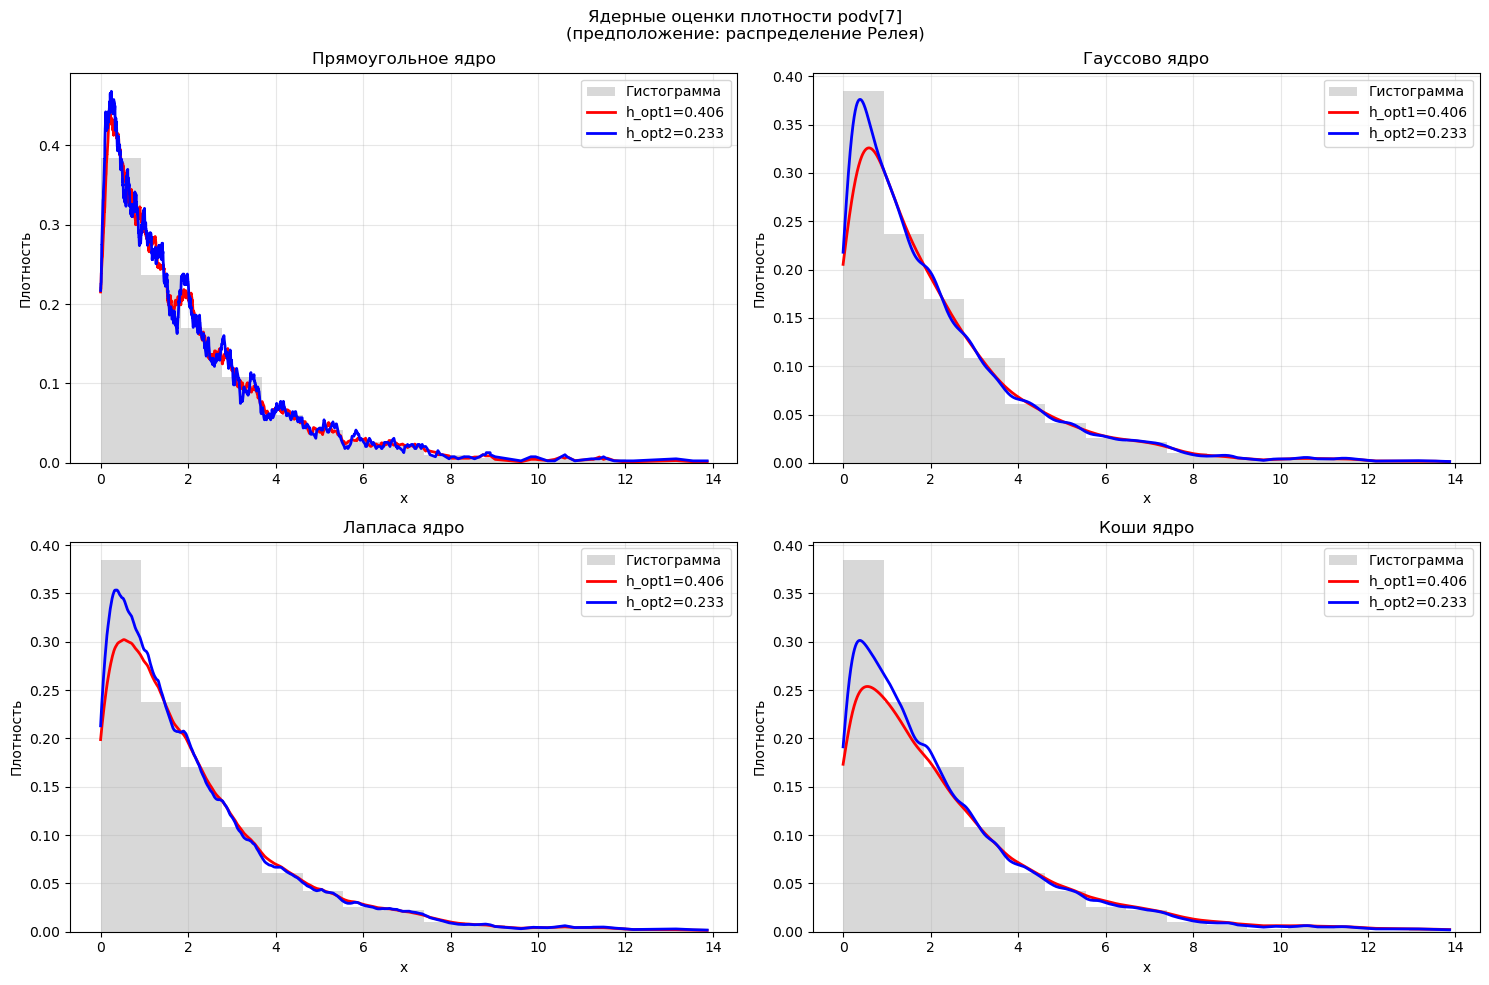


Подвыборка 8:


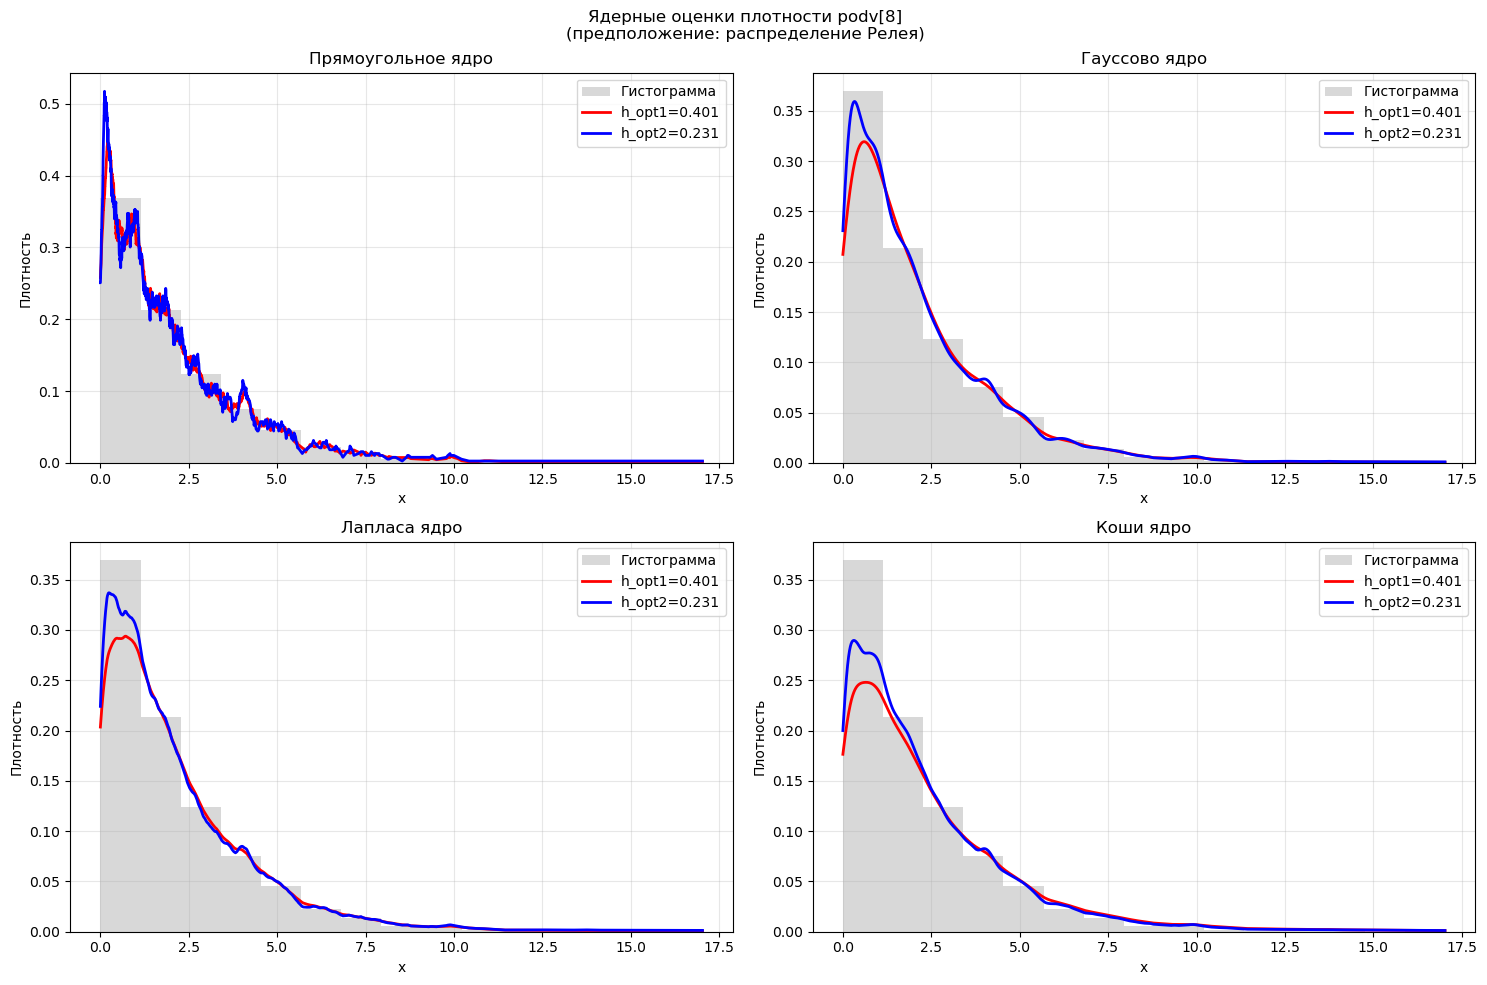


Подвыборка 9:


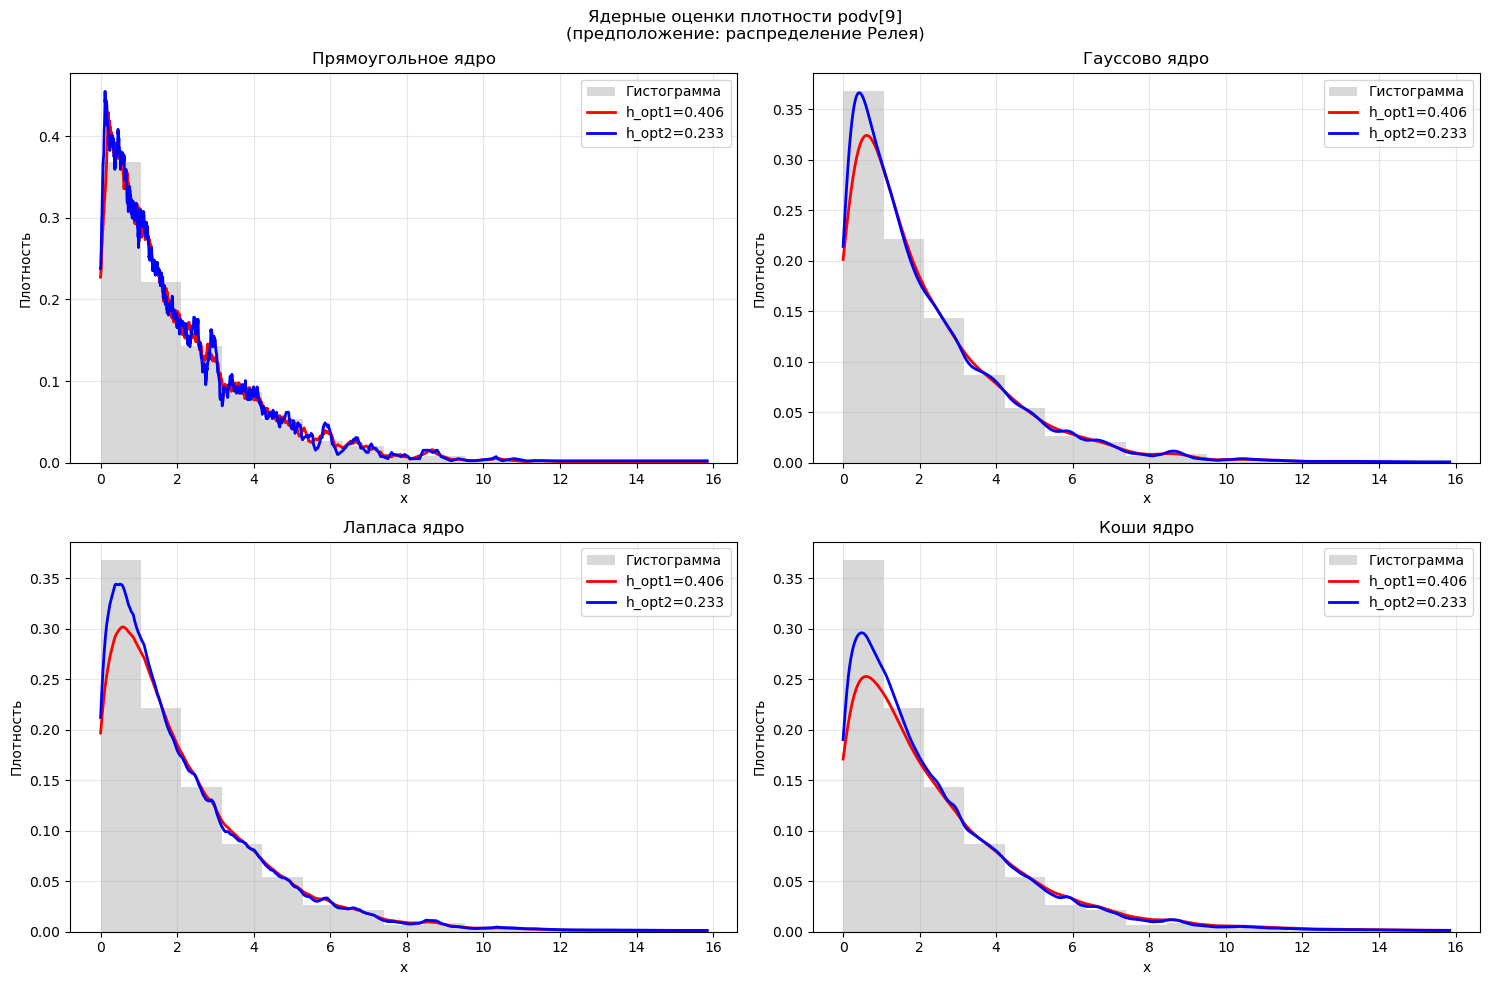


Подвыборка 10:


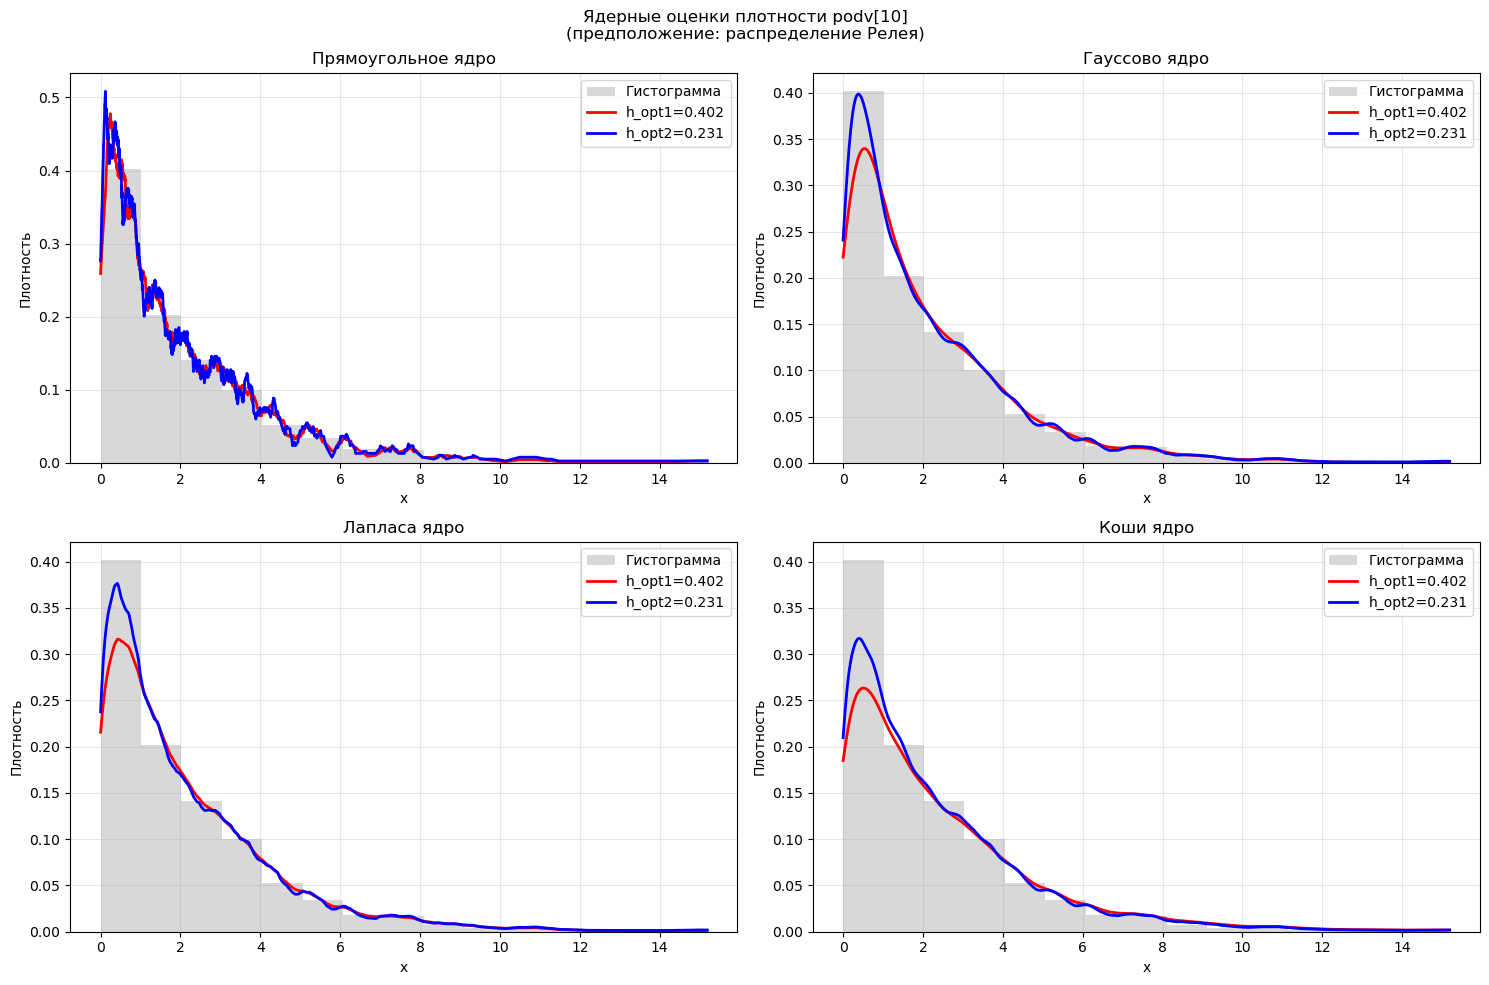

In [100]:
# Ядерная оценка плотности в точке x
def kernel_density(x, data, h, kernel_func):
    n = len(data)
    result = 0.0
    for xi in data:
        result += kernel_func((x - xi) / h)
    return result / (n * h)


# Параметрический выбор оптимального значения h (предположительно имеем дело с распределением Рэлея)
def optimal_h(data, kernel_type="gaussian"):
    N = len(data)
    mean = np.mean(data)
    var = np.var(data)

    sigma_rayleigh = mean / np.sqrt(np.pi / 2)

    Q1 = sigma_rayleigh * np.sqrt(-2 * np.log(0.75))
    Q3 = sigma_rayleigh * np.sqrt(-2 * np.log(0.25))
    IQR = Q3 - Q1

    h_opt1 = 1.06 * sigma_rayleigh * N ** (-0.2)

    A = min(sigma_rayleigh, IQR / 1.34)
    h_opt2 = 0.9 * A * N ** (-0.2)

    return h_opt1, h_opt2


# Построение ядерных оценок с оптимальными h
def plot_kde(data, title=""):

    kernels = [
        ("Прямоугольное", uniform_kernel),
        ("Гауссово", gaussian_kernel),
        ("Лапласа", laplas_kernel),
        ("Коши", koshi_kernel),
    ]

    h_opt1, h_opt2 = optimal_h(data)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for idx, (kernel_name, kernel_func) in enumerate(kernels):
        ax = axes[idx]

        ax.hist(
            data, bins=15, density=True, alpha=0.3, color="gray", label="Гистограмма"
        )

        density_opt1 = np.array(
            [kernel_density(x, data, h_opt1, kernel_func) for x in data]
        )
        density_opt2 = np.array(
            [kernel_density(x, data, h_opt2, kernel_func) for x in data]
        )

        ax.plot(data, density_opt1, "r-", linewidth=2, label=f"h_opt1={h_opt1:.3f}")
        ax.plot(data, density_opt2, "b-", linewidth=2, label=f"h_opt2={h_opt2:.3f}")

        ax.set_title(f"{kernel_name} ядро")
        ax.set_xlabel("x")
        ax.set_ylabel("Плотность")
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.suptitle(
        f"Ядерные оценки плотности {title}\n(предположение: распределение Релея)"
    )
    plt.tight_layout()
    plt.show()

    return h_opt1, h_opt2


for i, podv in enumerate(Xpodv_sorted):
    print(f"\nПодвыборка {i+1}:")
    plot_kde(podv, f"podv[{i+1}]")

## Определение точечных оценок
### Точечные оценки моментов (первого начального, центрального момента (2-гоб 3-го и 4-го порядков))

In [119]:
# Оценка Математического ожидания
mean = np.mean(Xperm)
median = np.median(Xperm)
min_max_mean = (np.min(Xperm) + np.max(Xperm)) / 2
counts, bin_edges = np.histogram(Xperm, bins="auto")
max_count_idx = np.argmax(counts)
mode_bin_center = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
mode_value = counts[max_count_idx]


mean_per_podv = np.mean(Xpodv, axis=1)
median_per_podv = np.median(Xpodv, axis=1)
min_per_podv = np.min(Xpodv, axis=1)
max_per_podv = np.max(Xpodv, axis=1)
min_max_mean_per_podv = (min_per_podv + max_per_podv) / 2

print("Оценка математического ожидания:")
print(
    f"All data: mean={mean:.4f}, median={median:.4f}, min_max_mean={min_max_mean:.4f}, mode={mode_value:.4f}"
)
for idx, (mean, median, min_max_mean) in enumerate(
    zip(mean_per_podv, median_per_podv, min_max_mean_per_podv)
):
    counts, bin_edges = np.histogram(Xpodv_sorted[idx], bins="auto")
    max_count_idx = np.argmax(counts)
    mode_bin_center = (bin_edges[max_count_idx] + bin_edges[max_count_idx + 1]) / 2
    mode_value = counts[max_count_idx]

    print(
        f"podv[{idx+1}]: mean={mean:.4f}, median={median:.4f}, min_max_mean={min_max_mean:.4f}, mode={mode_value:.4f}"
    )

print()
print(
    "Оценка Дисперсии, 3-го центрального момента, 4-го центрального момента, оценка асимметрии, эксцесса"
)
variance = np.var(Xperm, ddof=1)
moment_3 = scipy.stats.moment(Xperm, moment=3)
moment_4 = scipy.stats.moment(Xperm, moment=4)
skewness = scipy.stats.skew(Xperm)
kurtosis = scipy.stats.kurtosis(Xperm)

print(
    f"All data: var={variance:.4f}, moment_3={moment_3:.4f}, moment_4={moment_4:.4f}, skewness={skewness:.4f}, kurtosis={kurtosis:.4f}"
)

# Оценка Дисперсии (3-го центрального момента, 4-го центрального момента) + оценка асимметрии и эксцесса
for idx, data in enumerate(Xpodv_sorted):
    variance = np.var(data, ddof=1)  # Дисперсия несмещенная
    moment_3 = scipy.stats.moment(data, moment=3)
    moment_4 = scipy.stats.moment(data, moment=4)

    skewness = scipy.stats.skew(data)
    kurtosis = scipy.stats.kurtosis(data)

    print(
        f"podv[{idx+1}]: var={variance:.4f}, moment_3={moment_3:.4f}, moment_4={moment_4:.4f}, skewness={skewness:.4f}, kurtosis={kurtosis:.4f}"
    )

Оценка математического ожидания:
All data: mean=2.1000, median=1.4678, min_max_mean=10.0366, mode=1396.0000
podv[1]: mean=2.0406, median=1.4468, min_max_mean=9.8939, mode=285.0000
podv[2]: mean=2.1104, median=1.4708, min_max_mean=6.8892, mode=282.0000
podv[3]: mean=2.0079, median=1.3850, min_max_mean=8.8775, mode=283.0000
podv[4]: mean=2.0587, median=1.4918, min_max_mean=7.4563, mode=263.0000
podv[5]: mean=2.1580, median=1.5027, min_max_mean=10.0373, mode=292.0000
podv[6]: mean=2.2104, median=1.5386, min_max_mean=9.5533, mode=276.0000
podv[7]: mean=2.1134, median=1.4520, min_max_mean=6.9338, mode=286.0000
podv[8]: mean=2.0906, median=1.4922, min_max_mean=8.5124, mode=284.0000
podv[9]: mean=2.1145, median=1.4767, min_max_mean=7.9230, mode=272.0000
podv[10]: mean=2.0957, median=1.4292, min_max_mean=7.5939, mode=319.0000

Оценка Дисперсии, 3-го центрального момента, 4-го центрального момента, оценка асимметрии, эксцесса
All data: var=4.4112, moment_3=18.4789, moment_4=172.6759, skewness=1

### 1.3.3: Оценка границ интерквантильногро промежутка $J_P$ для $P = 0.95$ для полной выборки

In [116]:
alpha = 0.05
lower_quantile = alpha / 2
upper_quantile = 1 - alpha / 2

Q_lower = np.quantile(Xperm, lower_quantile)
Q_upper = np.quantile(Xperm, upper_quantile)

IQR_95 = Q_upper - Q_lower
print("95% ИНТЕРКВАНТИЛЬНЫЙ ПРОМЕЖУТОК:")
print("=" * 50)
print(f"2.5% квантиль (нижняя граница): {Q_lower:.6f}")
print(f"97.5% квантиль (верхняя граница): {Q_upper:.6f}")
print(f"95% интерквантильный промежуток: {IQR_95:.6f}")

95% ИНТЕРКВАНТИЛЬНЫЙ ПРОМЕЖУТОК:
2.5% квантиль (нижняя граница): 0.052691
97.5% квантиль (верхняя граница): 7.746544
95% интерквантильный промежуток: 7.693853


### 1.3.4: Таблица с результатами

In [123]:
columns = ["N", "X", "X_med", "X_cp", "s^2", "s", "m_3", "m_4", "As", "Ex"]
data = []

data.append(
    [
        "N",
        f"{2.1000:.4f}",  # X (mean)
        f"{1.4678:.4f}",  # X_med (median)
        f"{10.0366:.4f}",  # X_cp (min_max_mean)
        f"{4.4112:.4f}",  # s^2 (variance)
        f"{np.sqrt(4.4112):.4f}",  # s (std) - вычисляем из дисперсии
        f"{18.4789:.4f}",  # m_3
        f"{172.6759:.4f}",  # m_4
        f"{1.9947:.4f}",  # As (skewness)
        f"{5.8750:.4f}",  # Ex (kurtosis)
    ]
)

podv_data = [
    # [mean, median, min_max_mean, variance, moment_3, moment_4, skewness, kurtosis]
    [2.0406, 1.4468, 9.8939, 4.2773, 19.4859, 194.5792, 2.2047, 7.6482],
    [2.1104, 1.4708, 6.8892, 4.3424, 16.4573, 136.9053, 1.8203, 4.2691],
    [2.0079, 1.3850, 8.8775, 4.0998, 17.1131, 157.4974, 2.0633, 6.3813],
    [2.0587, 1.4918, 7.4563, 4.0236, 15.5439, 132.6265, 1.9277, 5.2021],
    [2.1580, 1.5027, 10.0373, 4.7204, 21.5172, 233.8324, 2.1000, 7.5070],
    [2.2104, 1.5386, 9.5533, 5.0642, 23.6760, 242.0329, 2.0794, 6.4489],
    [2.1134, 1.4520, 6.9338, 4.4847, 18.1664, 154.8535, 1.9145, 4.7086],
    [2.0906, 1.4922, 8.5124, 4.2669, 17.2754, 158.4375, 1.9618, 5.7128],
    [2.1145, 1.4767, 7.9230, 4.3199, 17.1712, 153.5677, 1.9142, 5.2389],
    [2.0957, 1.4292, 7.5939, 4.5070, 17.9551, 157.9800, 1.8783, 4.7868],
]

for i, podv in enumerate(podv_data, 1):
    data.append(
        [
            f"N/10_{i}",
            f"{podv[0]:.4f}",  # X (mean)
            f"{podv[1]:.4f}",  # X_med (median)
            f"{podv[2]:.4f}",  # X_cp (min_max_mean)
            f"{podv[3]:.4f}",  # s^2 (variance)
            f"{np.sqrt(podv[3]):.4f}",  # s (std) - вычисляем из дисперсии
            f"{podv[4]:.4f}",  # m_3
            f"{podv[5]:.4f}",  # m_4
            f"{podv[6]:.4f}",  # As (skewness)
            f"{podv[7]:.4f}",  # Ex (kurtosis)
        ]
    )

df = pd.DataFrame(data, columns=columns)

from IPython.display import display, Markdown

display(Markdown("### Результаты статистического анализа"))
display(Markdown(df.to_markdown(index=False)))

### Результаты статистического анализа

| N       |      X |   X_med |    X_cp |    s^2 |      s |     m_3 |     m_4 |     As |     Ex |
|:--------|-------:|--------:|--------:|-------:|-------:|--------:|--------:|-------:|-------:|
| N       | 2.1    |  1.4678 | 10.0366 | 4.4112 | 2.1003 | 18.4789 | 172.676 | 1.9947 | 5.875  |
| N/10_1  | 2.0406 |  1.4468 |  9.8939 | 4.2773 | 2.0682 | 19.4859 | 194.579 | 2.2047 | 7.6482 |
| N/10_2  | 2.1104 |  1.4708 |  6.8892 | 4.3424 | 2.0838 | 16.4573 | 136.905 | 1.8203 | 4.2691 |
| N/10_3  | 2.0079 |  1.385  |  8.8775 | 4.0998 | 2.0248 | 17.1131 | 157.497 | 2.0633 | 6.3813 |
| N/10_4  | 2.0587 |  1.4918 |  7.4563 | 4.0236 | 2.0059 | 15.5439 | 132.626 | 1.9277 | 5.2021 |
| N/10_5  | 2.158  |  1.5027 | 10.0373 | 4.7204 | 2.1726 | 21.5172 | 233.832 | 2.1    | 7.507  |
| N/10_6  | 2.2104 |  1.5386 |  9.5533 | 5.0642 | 2.2504 | 23.676  | 242.033 | 2.0794 | 6.4489 |
| N/10_7  | 2.1134 |  1.452  |  6.9338 | 4.4847 | 2.1177 | 18.1664 | 154.853 | 1.9145 | 4.7086 |
| N/10_8  | 2.0906 |  1.4922 |  8.5124 | 4.2669 | 2.0656 | 17.2754 | 158.438 | 1.9618 | 5.7128 |
| N/10_9  | 2.1145 |  1.4767 |  7.923  | 4.3199 | 2.0784 | 17.1712 | 153.568 | 1.9142 | 5.2389 |
| N/10_10 | 2.0957 |  1.4292 |  7.5939 | 4.507  | 2.123  | 17.9551 | 157.98  | 1.8783 | 4.7868 |

### 1.3.4: Представление результатов графически

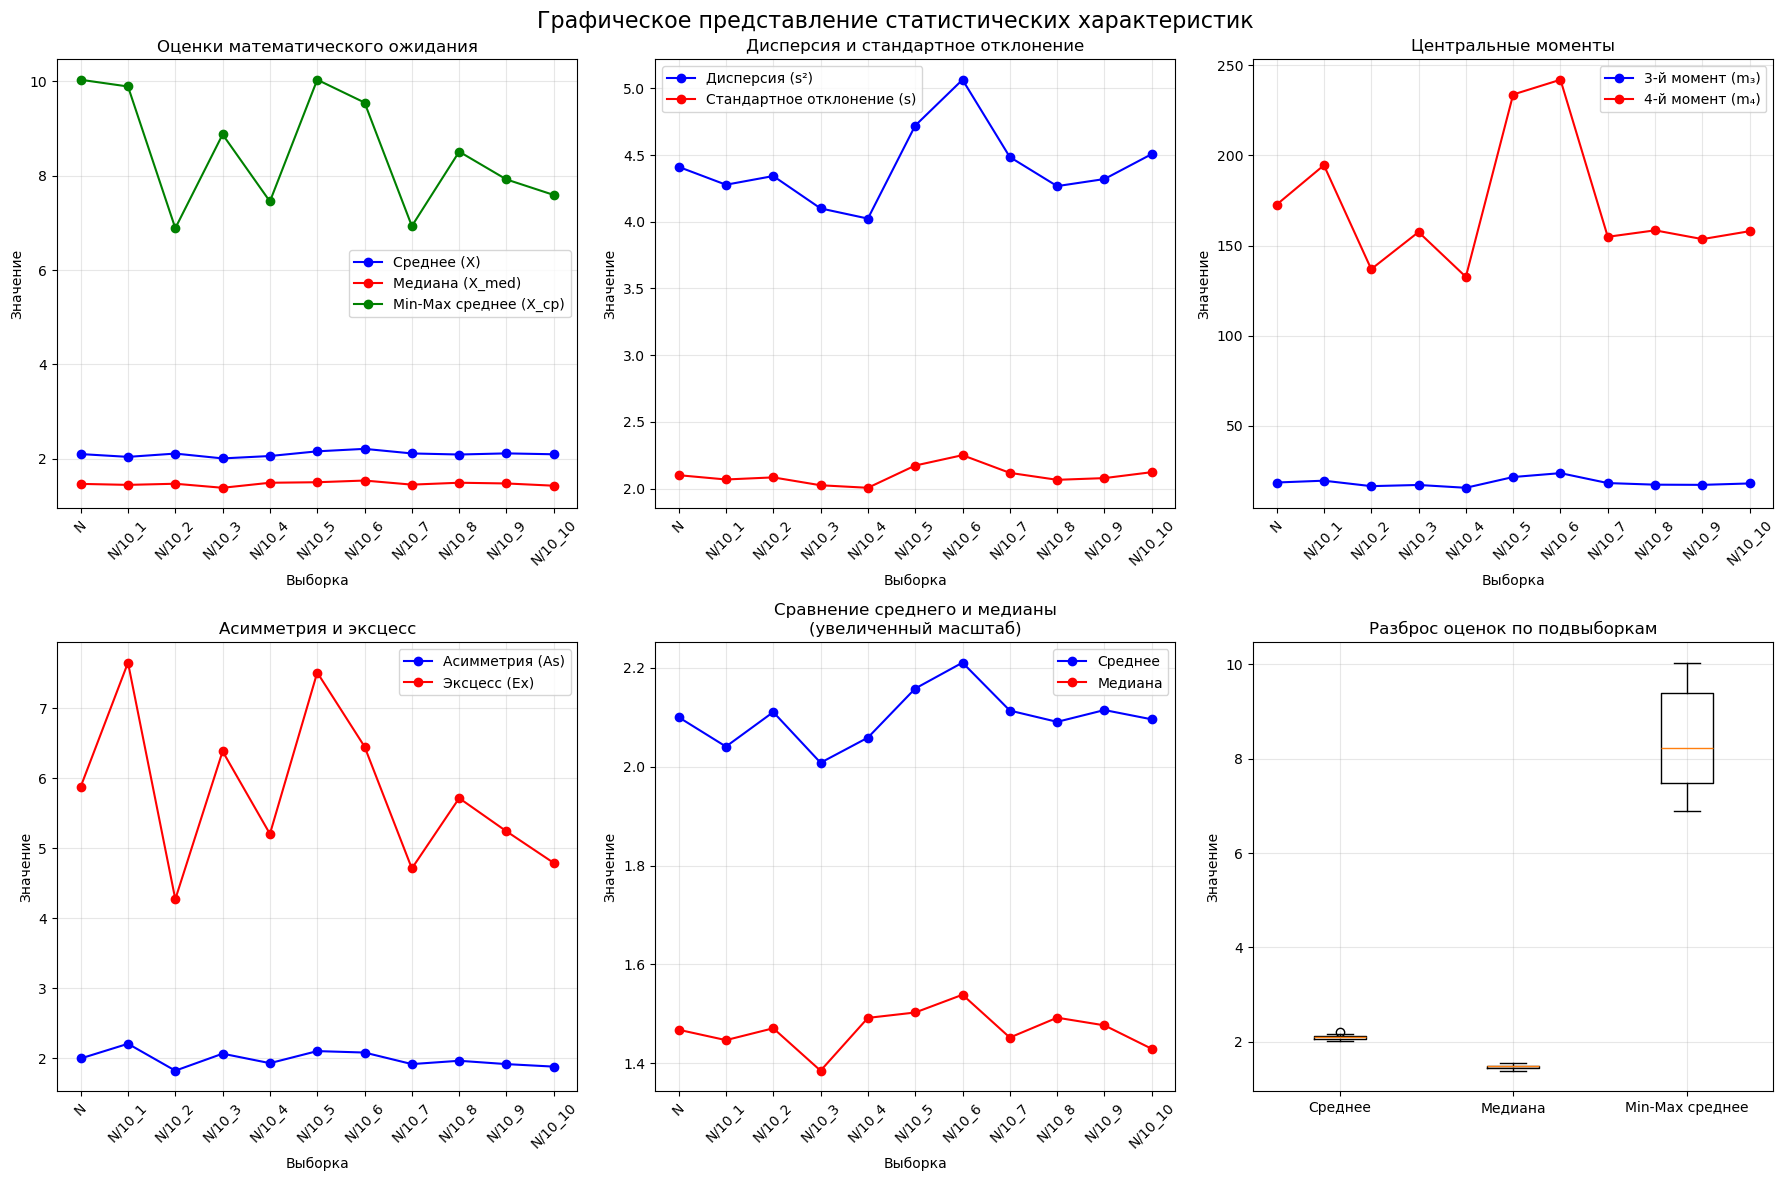

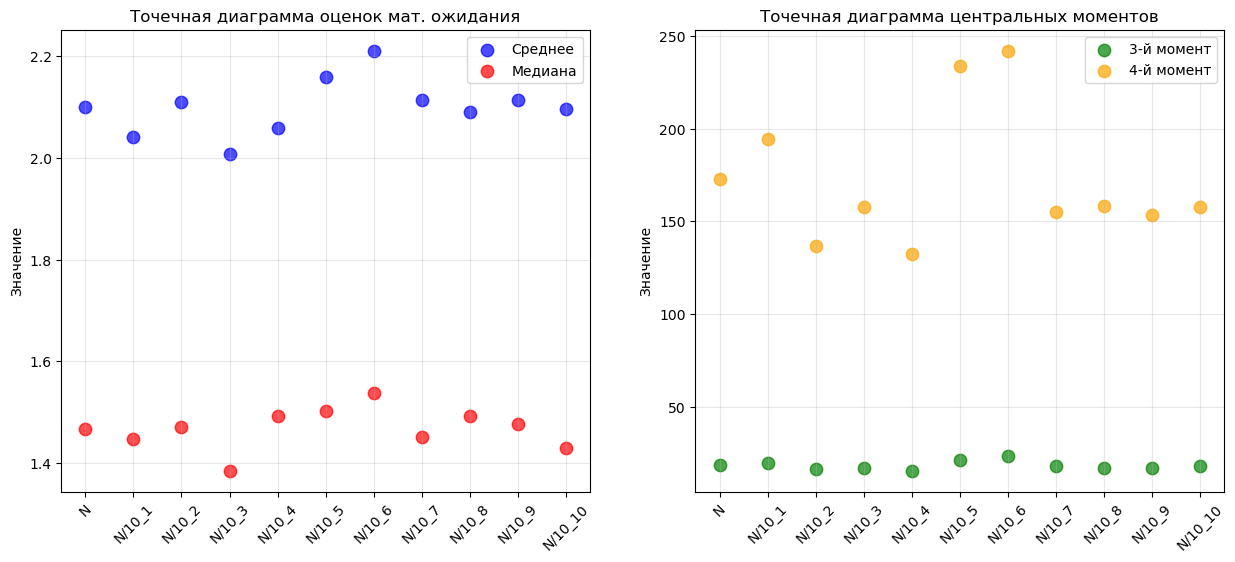

In [126]:
categories = ["N"] + [f"N/10_{i}" for i in range(1, 11)]

means = [
    2.1000,
    2.0406,
    2.1104,
    2.0079,
    2.0587,
    2.1580,
    2.2104,
    2.1134,
    2.0906,
    2.1145,
    2.0957,
]
medians = [
    1.4678,
    1.4468,
    1.4708,
    1.3850,
    1.4918,
    1.5027,
    1.5386,
    1.4520,
    1.4922,
    1.4767,
    1.4292,
]
min_max_means = [
    10.0366,
    9.8939,
    6.8892,
    8.8775,
    7.4563,
    10.0373,
    9.5533,
    6.9338,
    8.5124,
    7.9230,
    7.5939,
]

variances = [
    4.4112,
    4.2773,
    4.3424,
    4.0998,
    4.0236,
    4.7204,
    5.0642,
    4.4847,
    4.2669,
    4.3199,
    4.5070,
]
std_devs = [np.sqrt(v) for v in variances]
moments_3 = [
    18.4789,
    19.4859,
    16.4573,
    17.1131,
    15.5439,
    21.5172,
    23.6760,
    18.1664,
    17.2754,
    17.1712,
    17.9551,
]
moments_4 = [
    172.6759,
    194.5792,
    136.9053,
    157.4974,
    132.6265,
    233.8324,
    242.0329,
    154.8535,
    158.4375,
    153.5677,
    157.9800,
]
skewness = [
    1.9947,
    2.2047,
    1.8203,
    2.0633,
    1.9277,
    2.1000,
    2.0794,
    1.9145,
    1.9618,
    1.9142,
    1.8783,
]
kurtosis = [
    5.8750,
    7.6482,
    4.2691,
    6.3813,
    5.2021,
    7.5070,
    6.4489,
    4.7086,
    5.7128,
    5.2389,
    4.7868,
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Графическое представление статистических характеристик", fontsize=16)

# 1. Оценки математического ожидания
axes[0, 0].plot(categories, means, "bo-", label="Среднее (X)", markersize=6)
axes[0, 0].plot(categories, medians, "ro-", label="Медиана (X_med)", markersize=6)
axes[0, 0].plot(
    categories, min_max_means, "go-", label="Min-Max среднее (X_cp)", markersize=6
)
axes[0, 0].set_title("Оценки математического ожидания")
axes[0, 0].set_ylabel("Значение")
axes[0, 0].set_xlabel("Выборка")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis="x", rotation=45)

# 2. Дисперсия и стандартное отклонение
axes[0, 1].plot(categories, variances, "bo-", label="Дисперсия (s²)", markersize=6)
axes[0, 1].plot(
    categories, std_devs, "ro-", label="Стандартное отклонение (s)", markersize=6
)
axes[0, 1].set_title("Дисперсия и стандартное отклонение")
axes[0, 1].set_ylabel("Значение")
axes[0, 1].set_xlabel("Выборка")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis="x", rotation=45)

# 3. Центральные моменты
axes[0, 2].plot(categories, moments_3, "bo-", label="3-й момент (m₃)", markersize=6)
axes[0, 2].plot(categories, moments_4, "ro-", label="4-й момент (m₄)", markersize=6)
axes[0, 2].set_title("Центральные моменты")
axes[0, 2].set_ylabel("Значение")
axes[0, 2].set_xlabel("Выборка")
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis="x", rotation=45)

# 4. Асимметрия и эксцесс
axes[1, 0].plot(categories, skewness, "bo-", label="Асимметрия (As)", markersize=6)
axes[1, 0].plot(categories, kurtosis, "ro-", label="Эксцесс (Ex)", markersize=6)
axes[1, 0].set_title("Асимметрия и эксцесс")
axes[1, 0].set_ylabel("Значение")
axes[1, 0].set_xlabel("Выборка")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis="x", rotation=45)

# 5. Сравнение всех оценок мат. ожидания (увеличенный масштаб)
axes[1, 1].plot(categories, means, "bo-", label="Среднее", markersize=6)
axes[1, 1].plot(categories, medians, "ro-", label="Медиана", markersize=6)
axes[1, 1].set_title("Сравнение среднего и медианы\n(увеличенный масштаб)")
axes[1, 1].set_ylabel("Значение")
axes[1, 1].set_xlabel("Выборка")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis="x", rotation=45)

# 6. Box plot для визуализации разброса оценок
box_data = [means[1:], medians[1:], min_max_means[1:]]  # Исключаем полную выборку
axes[1, 2].boxplot(box_data, tick_labels=["Среднее", "Медиана", "Min-Max среднее"])
axes[1, 2].set_title("Разброс оценок по подвыборкам")
axes[1, 2].set_ylabel("Значение")
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))

# Точечная диаграмма для средних значений
x_pos = range(len(categories))
axes2[0].scatter(x_pos, means, c="blue", s=80, alpha=0.7, label="Среднее")
axes2[0].scatter(x_pos, medians, c="red", s=80, alpha=0.7, label="Медиана")
axes2[0].set_xticks(x_pos)
axes2[0].set_xticklabels(categories, rotation=45)
axes2[0].set_title("Точечная диаграмма оценок мат. ожидания")
axes2[0].set_ylabel("Значение")
axes2[0].legend()
axes2[0].grid(True, alpha=0.3)

# Точечная диаграмма для моментов
axes2[1].scatter(x_pos, moments_3, c="green", s=80, alpha=0.7, label="3-й момент")
axes2[1].scatter(x_pos, moments_4, c="orange", s=80, alpha=0.7, label="4-й момент")
axes2[1].set_xticks(x_pos)
axes2[1].set_xticklabels(categories, rotation=45)
axes2[1].set_title("Точечная диаграмма центральных моментов")
axes2[1].set_ylabel("Значение")
axes2[1].legend()
axes2[1].grid(True, alpha=0.3)

## 1.4: Определение интервальных оценок с доверительной вероятностью $Q = 0.8$ интерквантильного промежутка $J_P$ для $P = 0.95$

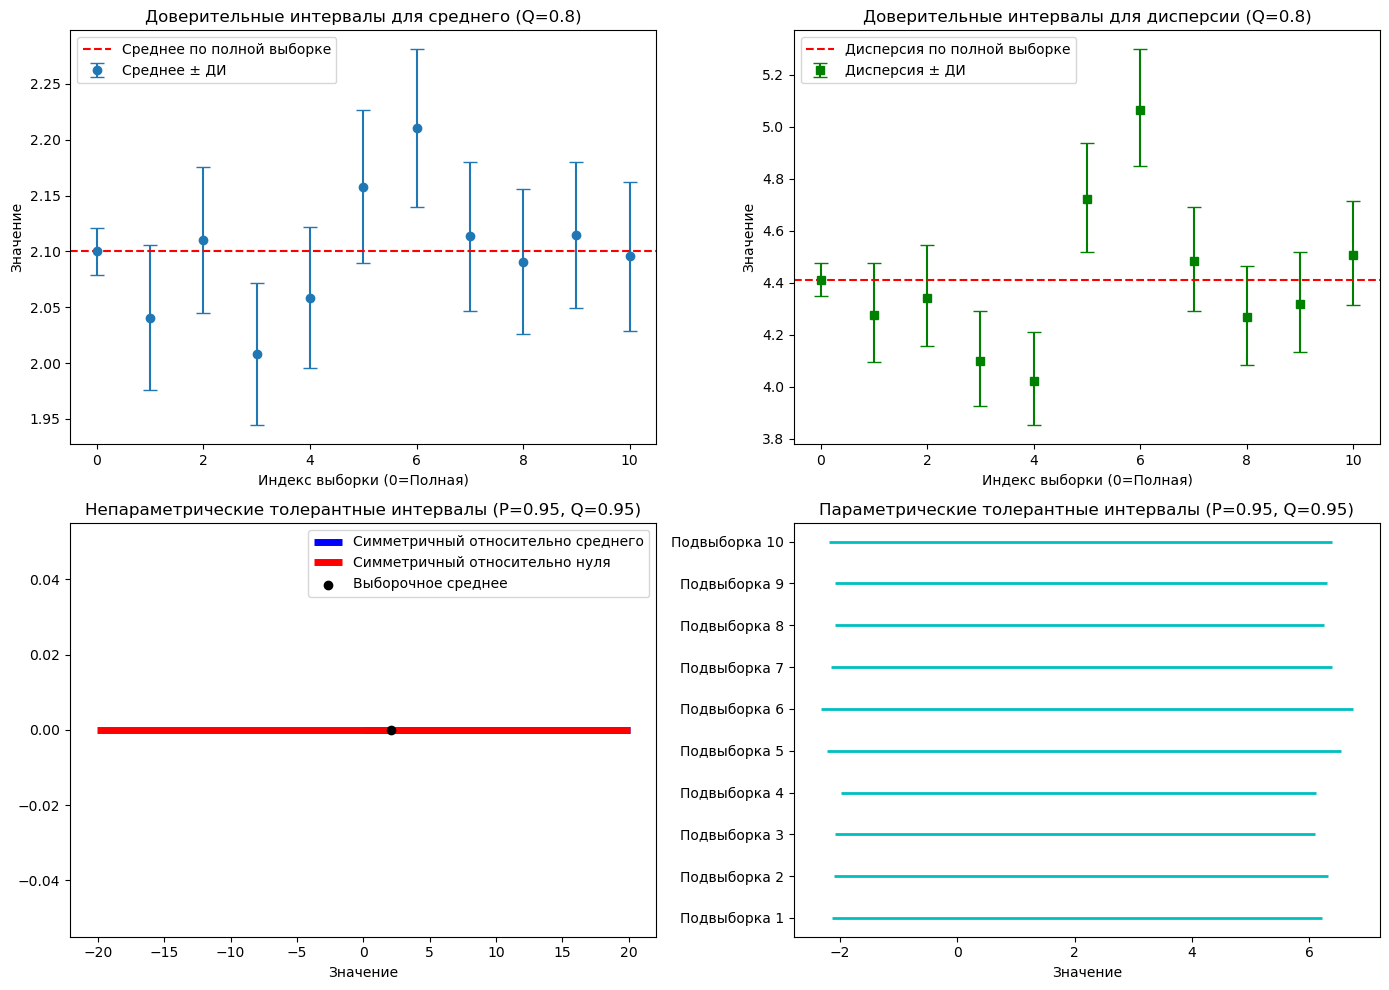

Сравнение ширины интервалов:
Ширина ДИ для среднего (полная выборка): 0.0418
Средняя ширина ДИ для среднего (подвыборки): 0.1321
Ширина непараметрического толерантного интервала (симм. относит. среднего): 20.0731
Ширина непараметрического толерантного интервала (симм. относит. нуля): 40.1464
Средняя ширина параметрического толерантного интервала: 8.4731


In [ ]:
# Параметры для расчетов
Q_confidence = 0.8  # Доверительная вероятность для интервалов моментов (Q=0.8)
P_coverage = (
    0.95  # Доля значений, которую должен охватывать толерантный интервал (P=0.95)
)
Q_tolerance = 0.95  # Доверительная вероятность для толерантных пределов (Q=0.95)

# ========================
# 1. Доверительные интервалы для моментов (Q=0.8)
# ========================


def calculate_moment_intervals(sample, Q):
    """Рассчитывает доверительные интервалы для первого (среднего) и второго (дисперсии) центральных моментов."""
    n = len(sample)  # Объем выборки
    alpha = 1 - Q  # Уровень значимости
    mean = np.mean(sample)  # Выборочное среднее
    std = np.std(
        sample, ddof=1
    )  # Выборочное стандартное отклонение (с поправкой Бесселя)

    # Доверительный интервал для среднего арифметического (используется распределение Стьюдента)
    t_val = scipy.stats.t.ppf(1 - alpha / 2, df=n - 1)  # Квантиль t-распределения
    margin_mean = t_val * std / np.sqrt(n)  # Погрешность для среднего
    ci_mean = (mean - margin_mean, mean + margin_mean)  # Интервал для среднего

    # Доверительный интервал для дисперсии (используется распределение Хи-квадрат)
    chi2_lower = scipy.stats.chi2.ppf(alpha / 2, df=n - 1)  # Нижняя квантиль хи-квадрат
    chi2_upper = scipy.stats.chi2.ppf(
        1 - alpha / 2, df=n - 1
    )  # Верхняя квантиль хи-квадрат
    var = std**2  # Выборочная дисперсия
    # Интервал для дисперсии: [(n-1)*s^2 / chi2_upper, (n-1)*s^2 / chi2_lower]
    ci_var = ((n - 1) * var / chi2_upper, (n - 1) * var / chi2_lower)

    return (
        ci_mean,
        ci_var,
    )  # Возвращает пару интервалов: (интервал_среднего, интервал_дисперсии)


# Рассчитываем интервалы для полной выборки Xperm
full_ci_mean, full_ci_var = calculate_moment_intervals(Xperm, Q_confidence)

# Рассчитываем интервалы для каждой из 10 подвыборок
subsample_ci_means = []  # Список для хранения доверительных интервалов среднего
subsample_ci_vars = []  # Список для хранения доверительных интервалов дисперсии
for podv in Xpodv:
    ci_mean, ci_var = calculate_moment_intervals(podv, Q_confidence)
    subsample_ci_means.append(ci_mean)
    subsample_ci_vars.append(ci_var)

# ========================
# 2. Непараметрические толерантные пределы (для полной выборки Xperm)
# ========================


def find_k(N, P, Q_conf):
    """Находит минимальное число k, при котором выполняется неравенство для определения толерантных пределов.
    Используется биномиальное распределение."""
    k = 0
    while True:
        total = 0
        # Суммируем вероятности для всех m от (N-k) до N
        for m in range(N - k, N + 1):
            total += scipy.stats.binom.pmf(m, N, P)  # P(X >= N-k)
        # Если сумма <= 1-Q, то условие выполнено
        if total <= 1 - Q_conf:
            break
        k += 1
    return k


# Расчет толерантных интервалов для полной выборки
N_full = len(Xperm)  # Объем полной выборки
Xperm_sorted = np.sort(Xperm)  # Сортируем выборку по возрастанию
k = find_k(N_full, P_coverage, Q_tolerance)  # Находим k

# Гарантируем, что k >= 1, чтобы избежать ошибки индексации
k = max(1, k)

# Толерантный интервал, симметричный относительно среднего арифметического
if k % 2 == 0:
    # Для четного k: исключаем k/2 элементов слева и k/2 справа
    lower_1based = k // 2  # Номер нижнего порядкового статистика (1-based)
    upper_1based = N_full - k // 2  # Номер верхнего порядкового статистика (1-based)
else:
    # Для нечетного k: исключаем (k-1)/2 элементов слева и справа
    lower_1based = (k - 1) // 2
    upper_1based = N_full - (k - 1) // 2

# Преобразуем 1-based индексы в 0-based и ограничиваем их допустимым диапазоном [0, N_full-1]
lower_idx = max(0, min(N_full - 1, lower_1based - 1))
upper_idx = max(0, min(N_full - 1, upper_1based - 1))
tol_interval_sym_mean = (Xperm_sorted[lower_idx], Xperm_sorted[upper_idx])

# Толерантный интервал, симметричный относительно нуля
Xabs = np.abs(Xperm)  # Берем абсолютные значения всех элементов
Xabs_sorted = np.sort(Xabs)  # Сортируем по возрастанию
idx = N_full - k  # Индекс k-го по величине элемента (0-based)
# Интервал: [-|X|_(k), |X|_(k)]
tol_interval_sym_zero = (-Xabs_sorted[idx], Xabs_sorted[idx])

# ========================
# 3. Параметрические толерантные пределы (для частичных выборок Xpodv)
# ========================


def parametric_tolerance_interval(sample, P, Q):
    """Рассчитывает параметрический толерантный интервал, предполагая нормальное распределение.
    Возвращает интервал [mean - k*std, mean + k*std]."""
    n = len(sample)  # Объем подвыборки
    mean = np.mean(sample)  # Выборочное среднее
    std = np.std(sample, ddof=1)  # Выборочное стандартное отклонение

    # Рассчитываем коэффициент k для толерантного интервала
    z_P = scipy.stats.norm.ppf(
        (1 + P) / 2
    )  # Квантиль стандартного нормального распределения для доли P
    chi2_val = scipy.stats.chi2.ppf(
        1 - Q, df=n - 1
    )  # Квантиль хи-квадрат распределения для доверительной вероятности Q
    # Формула для коэффициента k
    k = z_P * np.sqrt((n - 1) / chi2_val * (1 + 1 / n))

    # Возвращаем интервал
    return (mean - k * std, mean + k * std)


# Рассчитываем параметрические толерантные интервалы для каждой из 10 подвыборок
parametric_intervals = [
    parametric_tolerance_interval(podv, P_coverage, Q_tolerance) for podv in Xpodv
]

# ========================
# 4. Визуализация результатов
# ========================

plt.figure(figsize=(14, 10))  # Создаем фигуру размером 14x10 дюймов

# График 1: Доверительные интервалы для среднего
plt.subplot(2, 2, 1)  # Первый подграфик в сетке 2x2
# Отображаем точки (средние) и погрешности (доверительные интервалы)
plt.errorbar(
    range(11),  # Ось X: индексы (0 - полная выборка, 1-10 - подвыборки)
    [np.mean(Xperm)] + [np.mean(p) for p in Xpodv],  # Значения средних
    yerr=[
        [np.mean(Xperm) - full_ci_mean[0]]
        + [
            np.mean(p) - ci[0] for ci, p in zip(subsample_ci_means, Xpodv)
        ],  # Нижние погрешности
        [full_ci_mean[1] - np.mean(Xperm)]
        + [ci[1] - np.mean(p) for ci, p in zip(subsample_ci_means, Xpodv)],
    ],  # Верхние погрешности
    fmt="o",
    capsize=5,
    label="Среднее ± ДИ",
)  # Стиль: точки, "шапочки" погрешностей, легенда
plt.axhline(
    np.mean(Xperm), color="r", linestyle="--", label="Среднее по полной выборке"
)  # Горизонтальная линия - среднее по полной выборке
plt.title("Доверительные интервалы для среднего (Q=0.8)")
plt.xlabel("Индекс выборки (0=Полная)")
plt.ylabel("Значение")
plt.legend()  # Показываем легенду

# График 2: Доверительные интервалы для дисперсии
plt.subplot(2, 2, 2)  # Второй подграфик
# Аналогично, но для дисперсии
plt.errorbar(
    range(11),
    [np.var(Xperm, ddof=1)] + [np.var(p, ddof=1) for p in Xpodv],
    yerr=[
        [np.var(Xperm, ddof=1) - full_ci_var[0]]
        + [np.var(p, ddof=1) - ci[0] for ci, p in zip(subsample_ci_vars, Xpodv)],
        [full_ci_var[1] - np.var(Xperm, ddof=1)]
        + [ci[1] - np.var(p, ddof=1) for ci, p in zip(subsample_ci_vars, Xpodv)],
    ],
    fmt="s",
    capsize=5,
    color="g",
    label="Дисперсия ± ДИ",
)
plt.axhline(
    np.var(Xperm, ddof=1),
    color="r",
    linestyle="--",
    label="Дисперсия по полной выборке",
)
plt.title("Доверительные интервалы для дисперсии (Q=0.8)")
plt.xlabel("Индекс выборки (0=Полная)")
plt.ylabel("Значение")
plt.legend()

# График 3: Непараметрические толерантные интервалы (для полной выборки)
plt.subplot(2, 2, 3)  # Третий подграфик
# Отображаем интервал, симметричный относительно среднего (синяя линия)
plt.hlines(
    0,
    tol_interval_sym_mean[0],
    tol_interval_sym_mean[1],
    colors="b",
    linewidth=5,
    label="Симметричный относительно среднего",
)
# Отображаем интервал, симметричный относительно нуля (красная линия)
plt.hlines(
    0,
    tol_interval_sym_zero[0],
    tol_interval_sym_zero[1],
    colors="r",
    linewidth=5,
    label="Симметричный относительно нуля",
)
# Отмечаем положение выборочного среднего (черная точка)
plt.scatter([np.mean(Xperm)], [0], color="k", zorder=5, label="Выборочное среднее")
plt.title("Непараметрические толерантные интервалы (P=0.95, Q=0.95)")
plt.xlabel("Значение")
plt.legend()

# График 4: Параметрические толерантные интервалы (для подвыборок)
plt.subplot(2, 2, 4)
for i, (podv, interval) in enumerate(zip(Xpodv, parametric_intervals)):
    plt.hlines(i, interval[0], interval[1], colors="c", linewidth=2)
plt.title("Параметрические толерантные интервалы (P=0.95, Q=0.95)")
plt.xlabel("Значение")
plt.yticks(range(10), [f"Подвыборка {i+1}" for i in range(10)])


# ========================
# 5. Сравнение ширин интервалов
# ========================

print("Сравнение ширины интервалов:")
print(
    f"Ширина ДИ для среднего (полная выборка): {full_ci_mean[1] - full_ci_mean[0]:.4f}"
)
print(
    f"Средняя ширина ДИ для среднего (подвыборки): {np.mean([ci[1]-ci[0] for ci in subsample_ci_means]):.4f}"
)
print(
    f"Ширина непараметрического толерантного интервала (симм. относит. среднего): {tol_interval_sym_mean[1] - tol_interval_sym_mean[0]:.4f}"
)
print(
    f"Ширина непараметрического толерантного интервала (симм. относит. нуля): {tol_interval_sym_zero[1] - tol_interval_sym_zero[0]:.4f}"
)
print(
    f"Средняя ширина параметрического толерантного интервала: {np.mean([ci[1]-ci[0] for ci in parametric_intervals]):.4f}"
)

### Вывод
Анализ полученных результатов показывает принципиальные различия в свойствах доверительных и толерантных интервалов, а также в эффективности параметрических и непараметрических методов. Во-первых, ширина доверительного интервала для среднего по полной выборке (0.0418) значительно меньше, чем средняя ширина таких же интервалов по подвыборкам (0.1321). Это логично, поскольку доверительный интервал оценивает точность оценки параметра (среднего), и его точность напрямую зависит от объема выборки: больший объем (полная выборка) дает более узкий и надежный интервал. Во-вторых, толерантные интервалы, которые предназначены для охвата определенной доли значений генеральной совокупности, существенно шире доверительных интервалов. Ширина непараметрического толерантного интервала, симметричного относительно среднего (20.0731), в несколько раз превышает ширину доверительных интервалов, что объясняется их фундаментально иной задачей — не оценкой параметра, а покрытием части распределения. Интервал, симметричный относительно нуля (40.1464), оказался еще шире, что свидетельствует о том, что распределение данных не центрировано в нуле, и для обеспечения того же охвата P=0.95 при симметрии относительно нуля требуется гораздо больший диапазон. В-третьих, параметрические толерантные интервалы, рассчитанные для подвыборок, имеют среднюю ширину 8.4731, что значительно меньше, чем у непараметрических аналогов. Это является следствием использования дополнительной информации о предполагаемом нормальном распределении данных: параметрический метод более эффективен и дает более узкие интервалы, но его корректность полностью зависит от правильности предположения о законе распределения. Таким образом, можно сделать вывод, что выбор метода расчета интервала должен основываться на конкретной задаче: если нужно оценить точность параметра — используются доверительные интервалы, причем с большими выборками; если нужно гарантировать охват определенной доли значений — применяются толерантные интервалы; и при наличии уверенности в виде распределения — предпочтение отдается более эффективным параметрическим методам, в противном случае — более универсальным, но менее точным непараметрическим.

## 2: Идентификация закона распределения

**Предположительный вид распределения:** Экспоненциальное, Рэлея, Гамма.

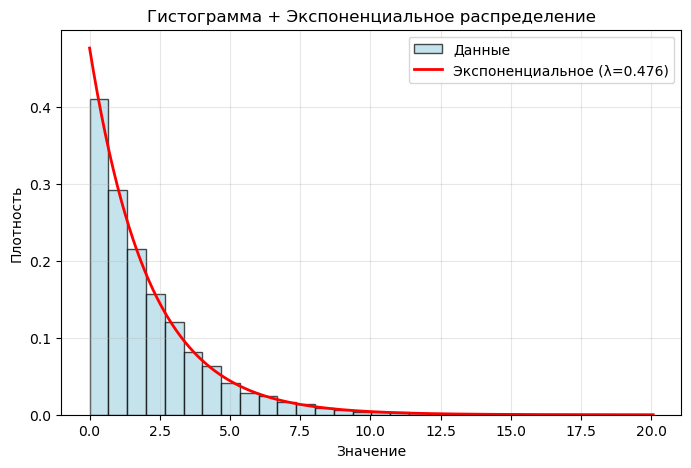

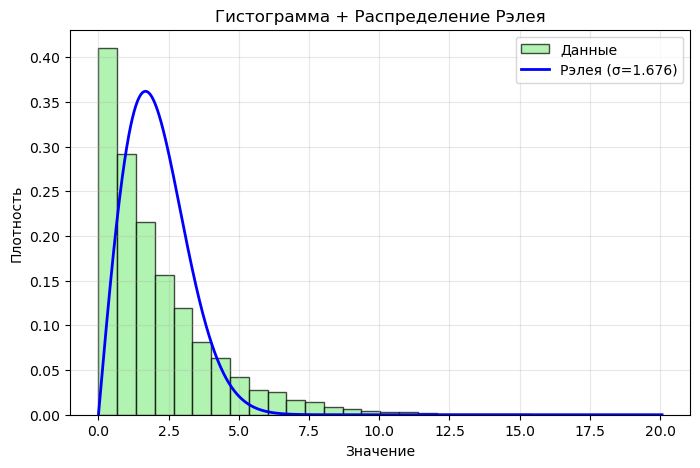

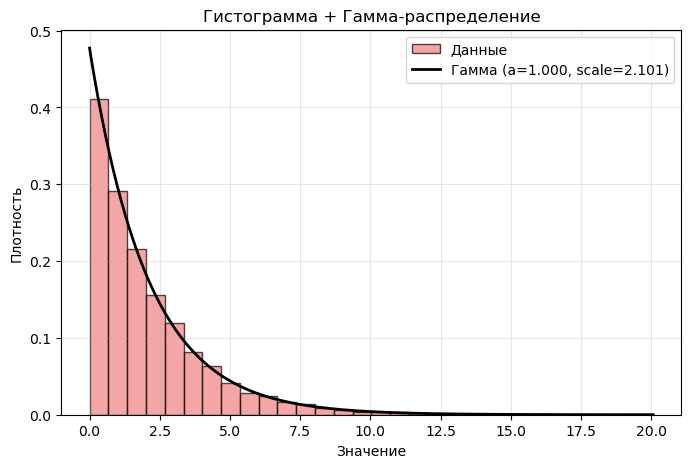

In [17]:
# Проверим, есть ли отрицательные значения — для экспоненциального и Рэлея это критично
if np.min(Xperm) < 0:
    print("Предупреждение: данные содержат отрицательные значения.")
    print("   Экспоненциальное и распределение Рэлея определены только для x ≥ 0.")
    print("   Для визуализации сдвинем данные в положительную область.\n")
    X_plot = Xperm - np.min(Xperm) + 1e-10  # Сдвигаем, чтобы все были >0
else:
    X_plot = Xperm.copy()  # Данные уже подходят

# Определяем диапазон для построения PDF
x_min, x_max = np.min(X_plot), np.max(X_plot)
x = np.linspace(x_min, x_max, 1000)

# ========================
# График 1: Экспоненциальное распределение
# ========================
plt.figure(figsize=(8, 5))
plt.hist(
    X_plot,
    bins=30,
    density=True,
    alpha=0.7,
    color="lightblue",
    edgecolor="black",
    label="Данные",
)
# Подбираем масштаб (lambda = 1/среднее)
scale_exp = np.mean(X_plot)
pdf_exp = scipy.stats.expon.pdf(x, scale=scale_exp)
plt.plot(x, pdf_exp, "r-", linewidth=2, label=f"Экспоненциальное (λ={1/scale_exp:.3f})")
plt.title("Гистограмма + Экспоненциальное распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ========================
# График 2: Распределение Рэлея
# ========================
plt.figure(figsize=(8, 5))
plt.hist(
    X_plot,
    bins=30,
    density=True,
    alpha=0.7,
    color="lightgreen",
    edgecolor="black",
    label="Данные",
)
# Подбираем параметр sigma (sigma = sqrt(дисперсия / 2) или через среднее)
# Для Рэлея: mean = sigma * sqrt(pi/2) => sigma = mean / sqrt(pi/2)
sigma_ray = np.mean(X_plot) / np.sqrt(np.pi / 2)
pdf_ray = scipy.stats.rayleigh.pdf(x, scale=sigma_ray)
plt.plot(x, pdf_ray, "b-", linewidth=2, label=f"Рэлея (σ={sigma_ray:.3f})")
plt.title("Гистограмма + Распределение Рэлея")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ========================
# График 3: Гамма-распределение
# ========================
plt.figure(figsize=(8, 5))
plt.hist(
    X_plot,
    bins=30,
    density=True,
    alpha=0.7,
    color="lightcoral",
    edgecolor="black",
    label="Данные",
)
# Подбираем параметры формы (a) и масштаба (scale) через метод моментов
mean_val = np.mean(X_plot)
var_val = np.var(X_plot, ddof=1)
# Для гамма: mean = a * scale, var = a * scale^2 => a = mean^2 / var, scale = var / mean
a_gamma = mean_val**2 / var_val
scale_gamma = var_val / mean_val
pdf_gamma = scipy.stats.gamma.pdf(x, a=a_gamma, scale=scale_gamma)
plt.plot(
    x,
    pdf_gamma,
    "k-",
    linewidth=2,
    label=f"Гамма (a={a_gamma:.3f}, scale={scale_gamma:.3f})",
)
plt.title("Гистограмма + Гамма-распределение")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## 2.2: Определение теоритических распределений


Анализ подвыборки 1 (размер: 1660 элементов)
Мин: 0.0001, Макс: 19.7877, Среднее: 2.0406

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.0406
Метод максимального правдоподобия (ММП):
  scale = 2.0406


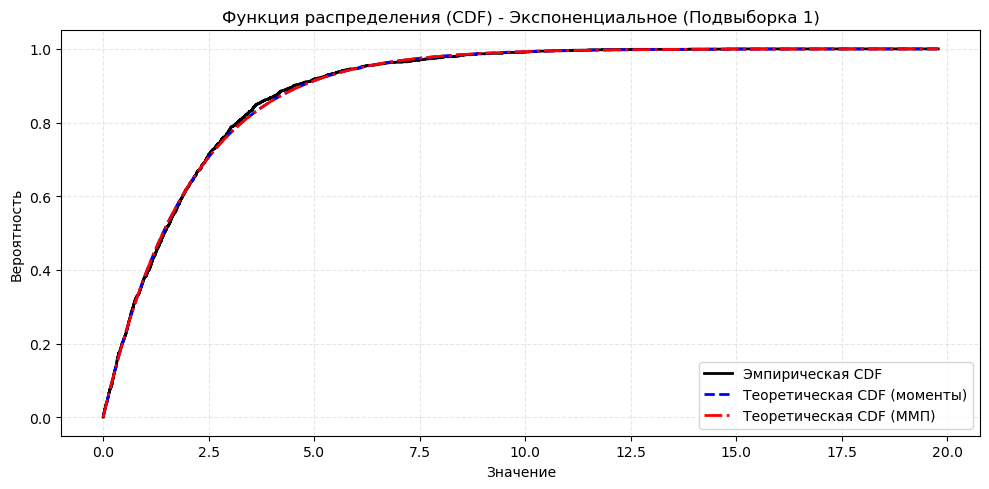

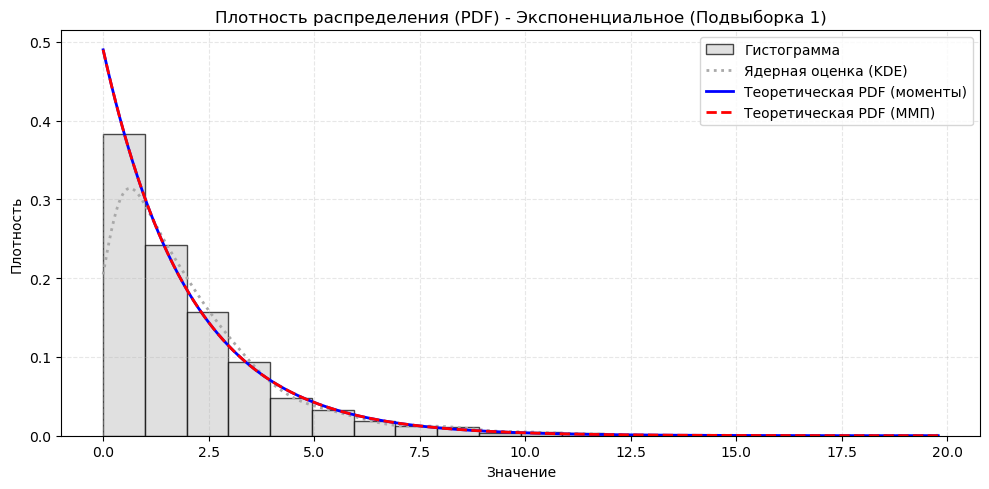


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6281
Метод максимального правдоподобия (ММП):
  sigma = 2.0541


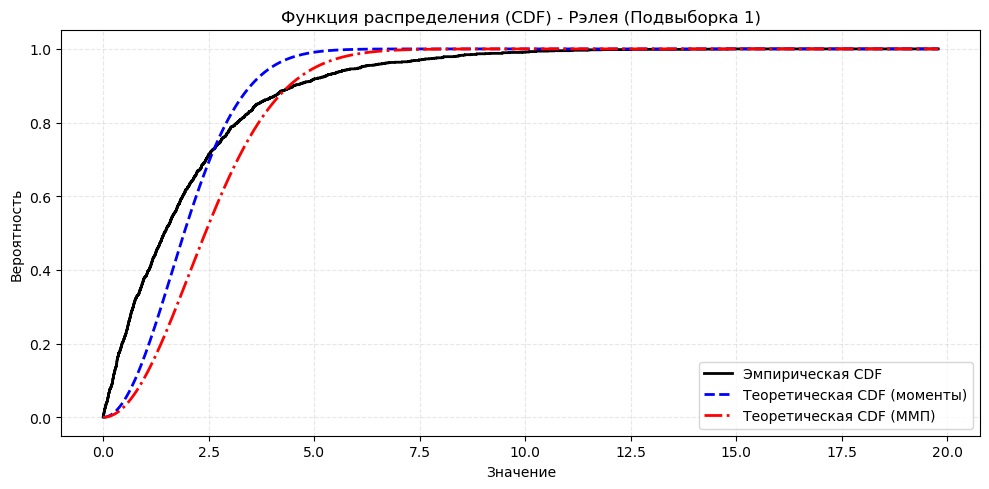

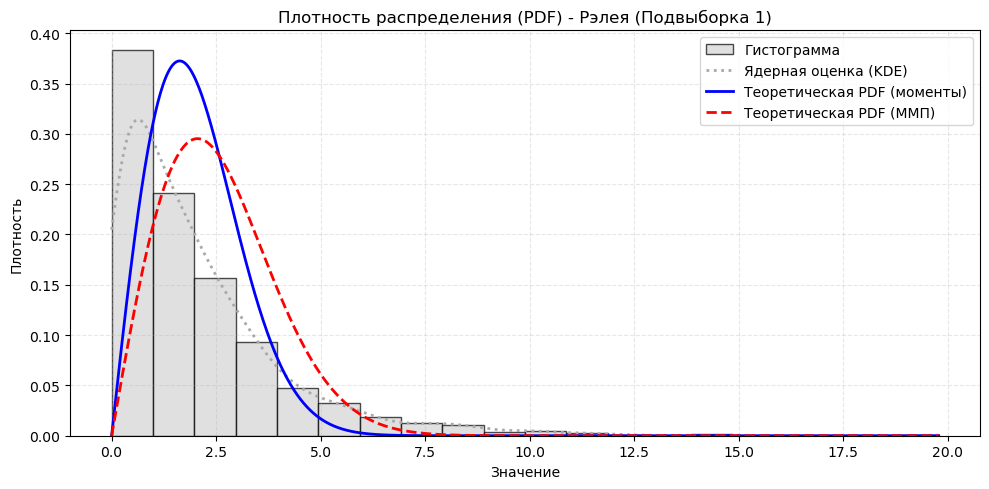


Разница между методами: 0.4260
Относительная разница: 26.16%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 0.9735
  scale = 2.0961
Метод максимального правдоподобия (ММП):
  a = 0.9941
  scale = 2.0527


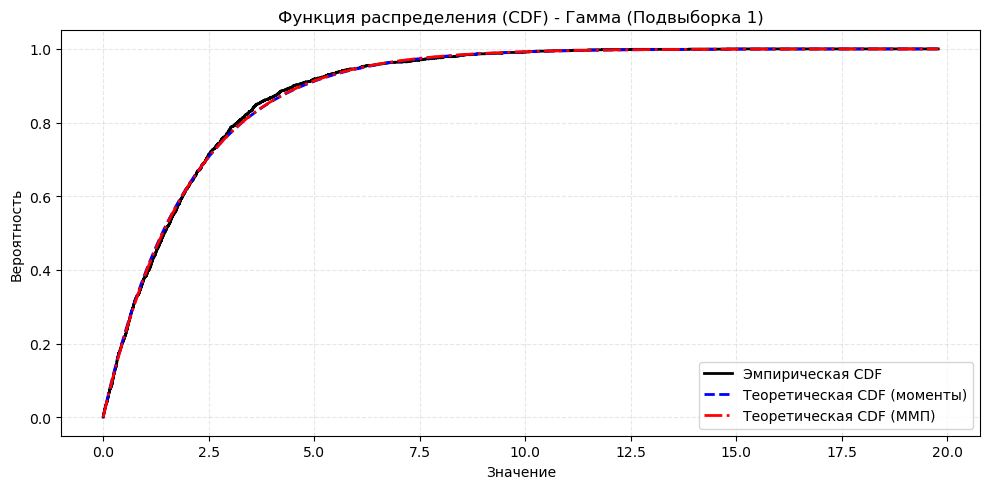

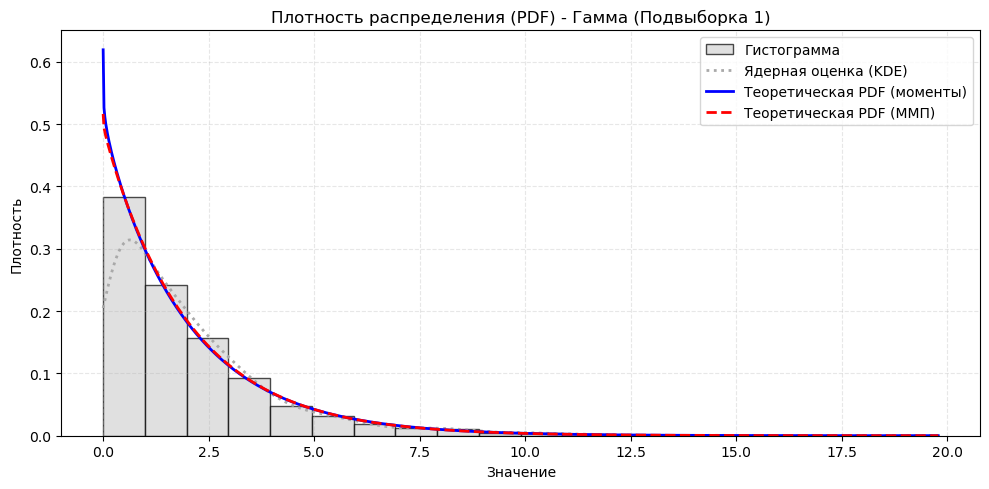


Анализ подвыборки 2 (размер: 1660 элементов)
Мин: 0.0001, Макс: 13.7783, Среднее: 2.1104

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.1104
Метод максимального правдоподобия (ММП):
  scale = 2.1104


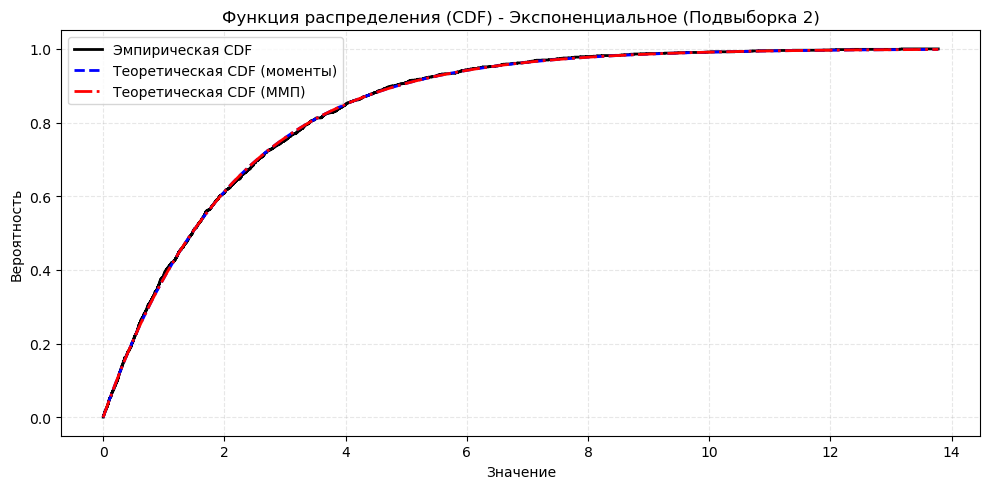

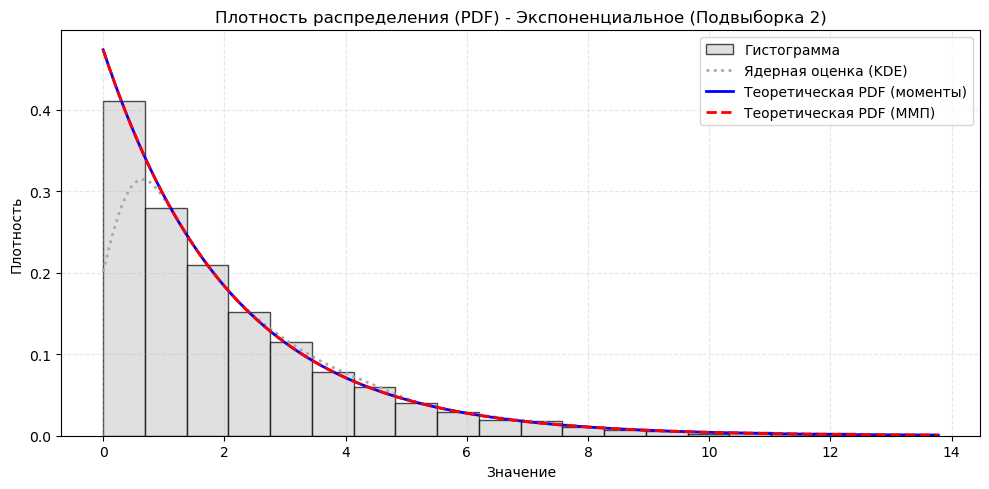


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6838
Метод максимального правдоподобия (ММП):
  sigma = 2.0968


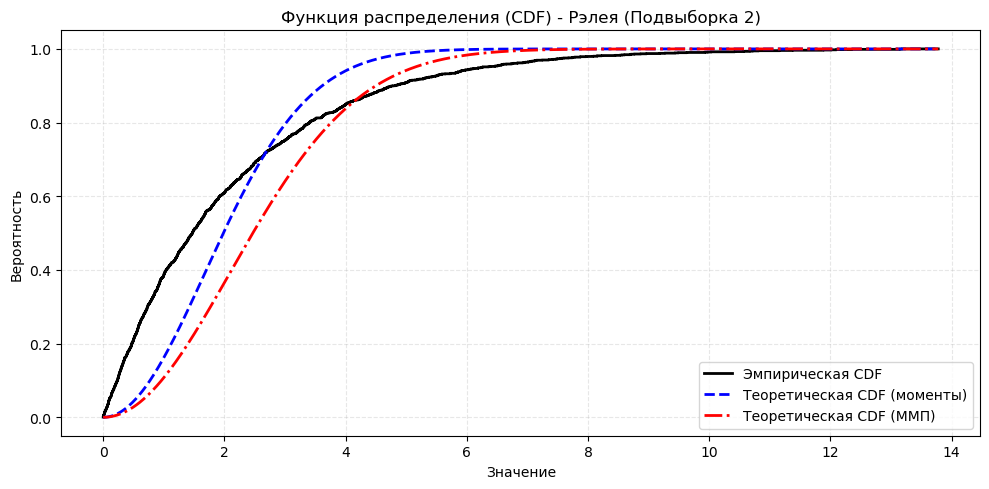

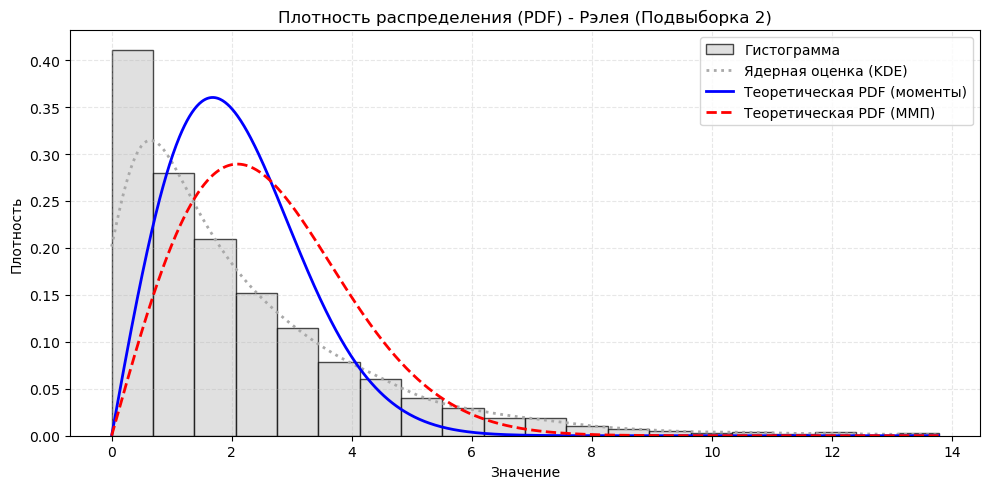


Разница между методами: 0.4130
Относительная разница: 24.53%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 1.0256
  scale = 2.0577
Метод максимального правдоподобия (ММП):
  a = 0.9952
  scale = 2.1206


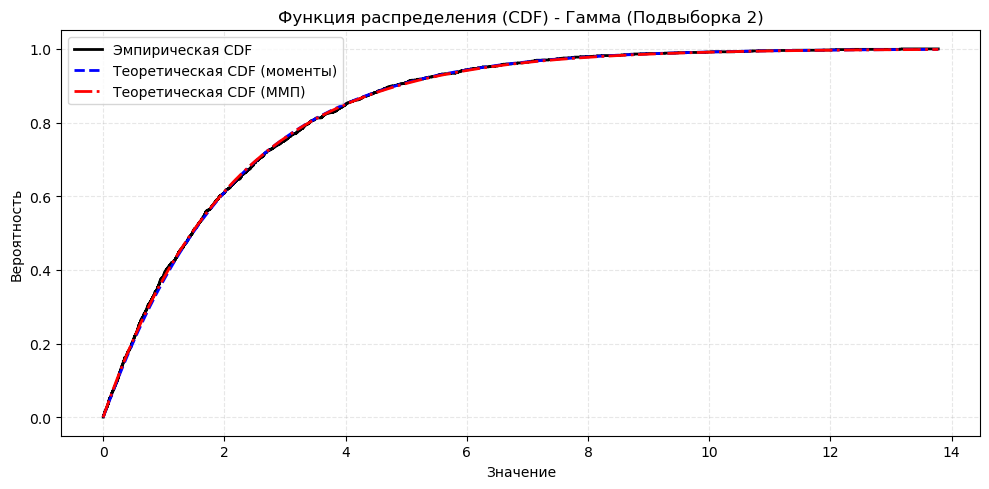

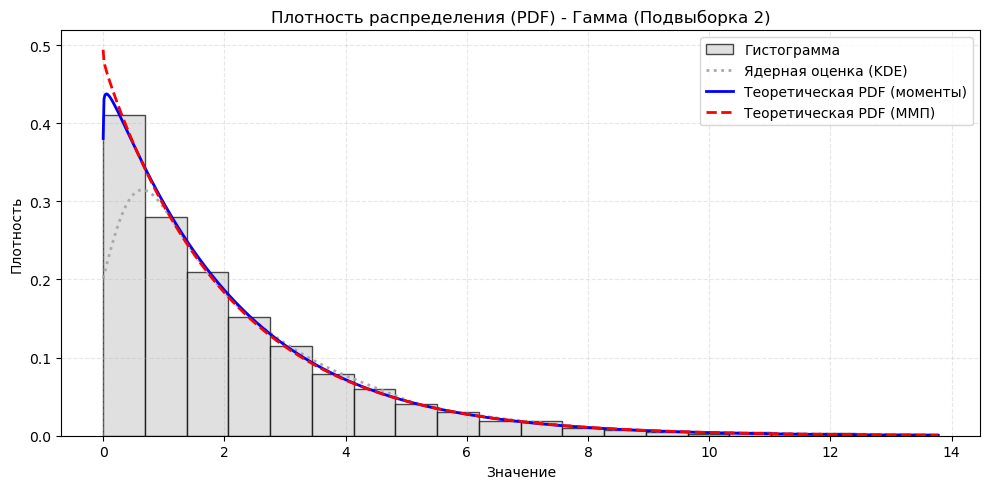


Анализ подвыборки 3 (размер: 1660 элементов)
Мин: 0.0014, Макс: 17.7536, Среднее: 2.0079

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.0079
Метод максимального правдоподобия (ММП):
  scale = 2.0079


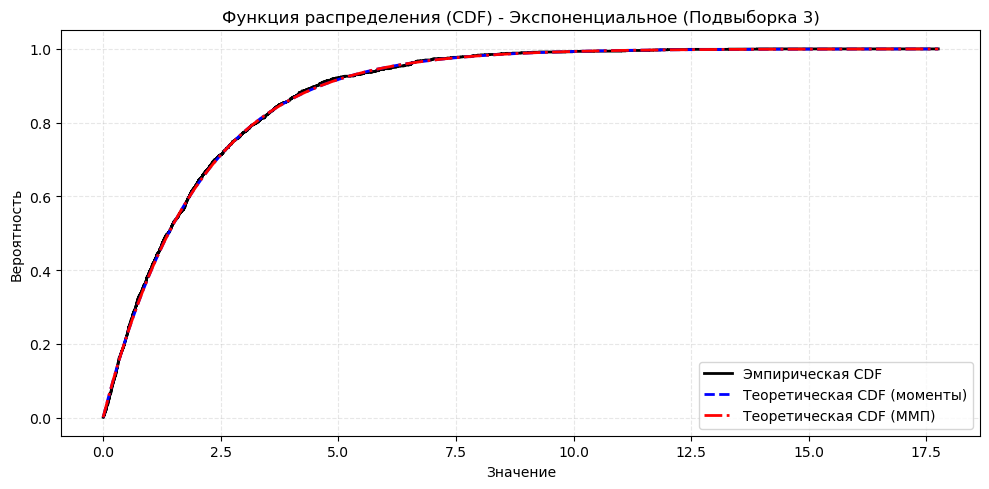

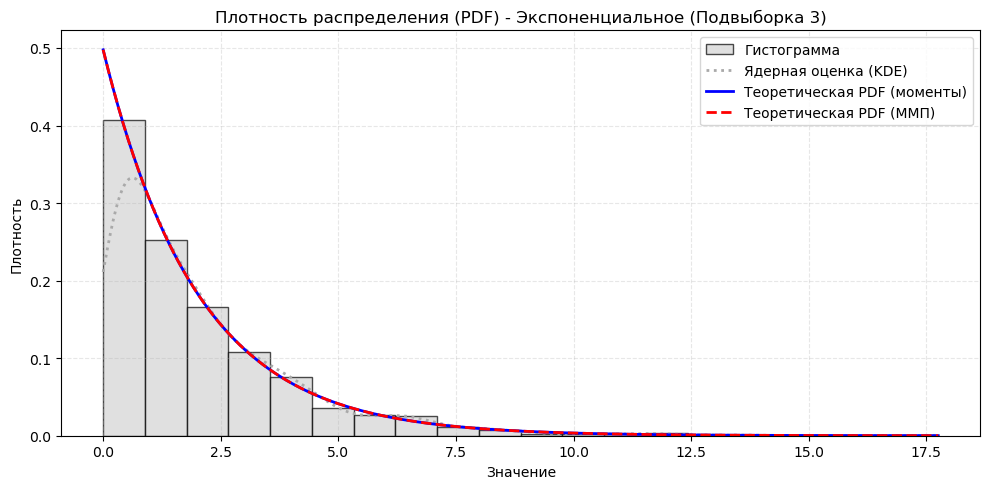


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6021
Метод максимального правдоподобия (ММП):
  sigma = 2.0161


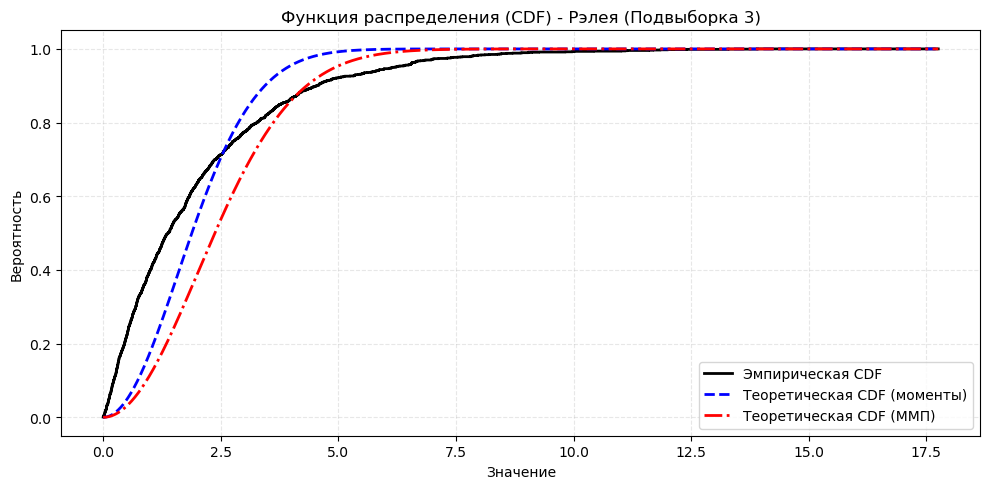

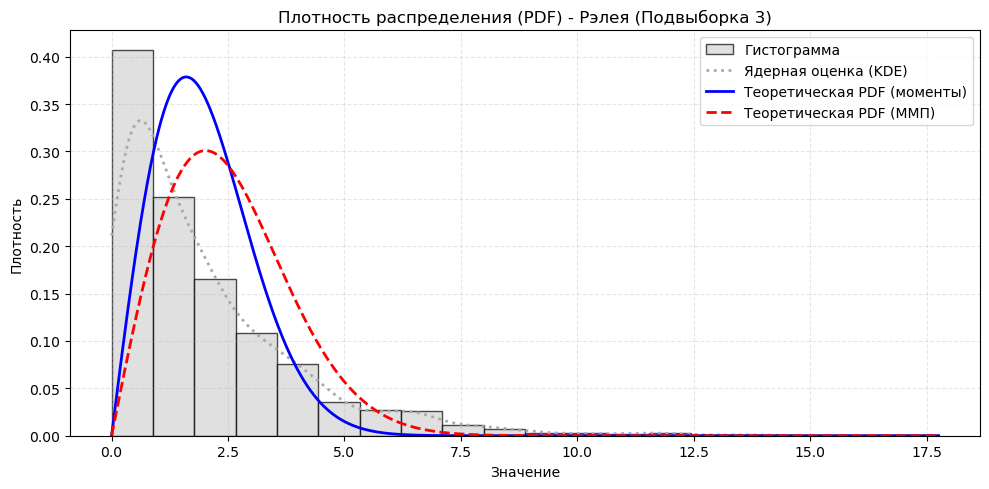


Разница между методами: 0.4140
Относительная разница: 25.84%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 0.9834
  scale = 2.0418
Метод максимального правдоподобия (ММП):
  a = 1.0369
  scale = 1.9364


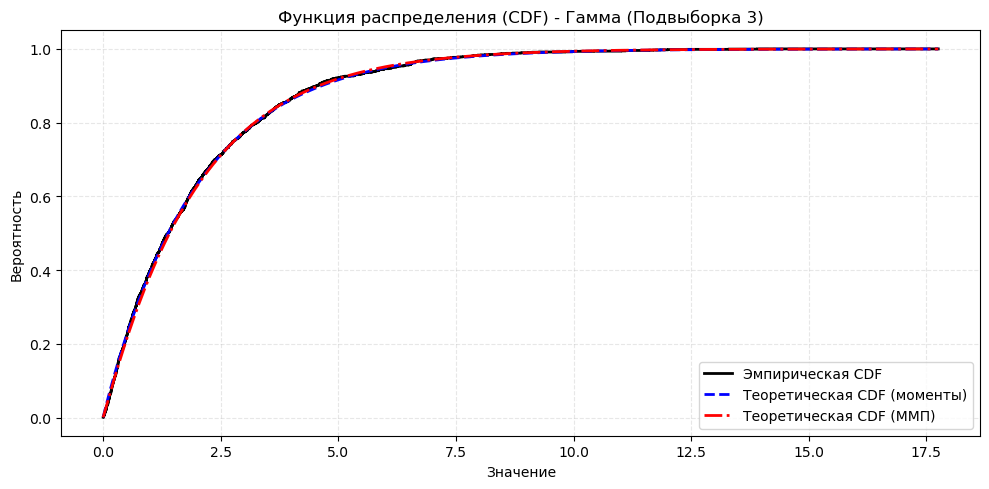

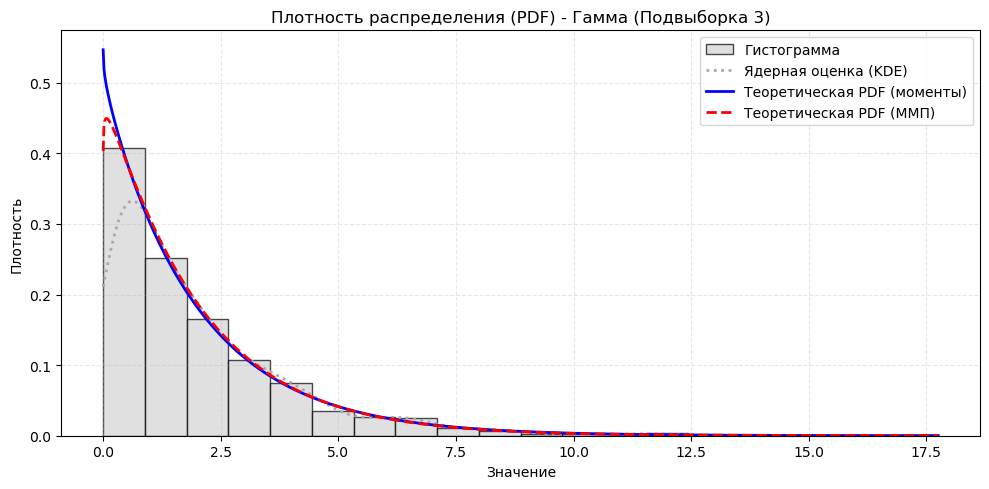


Анализ подвыборки 4 (размер: 1660 элементов)
Мин: 0.0025, Макс: 14.9101, Среднее: 2.0587

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.0587
Метод максимального правдоподобия (ММП):
  scale = 2.0587


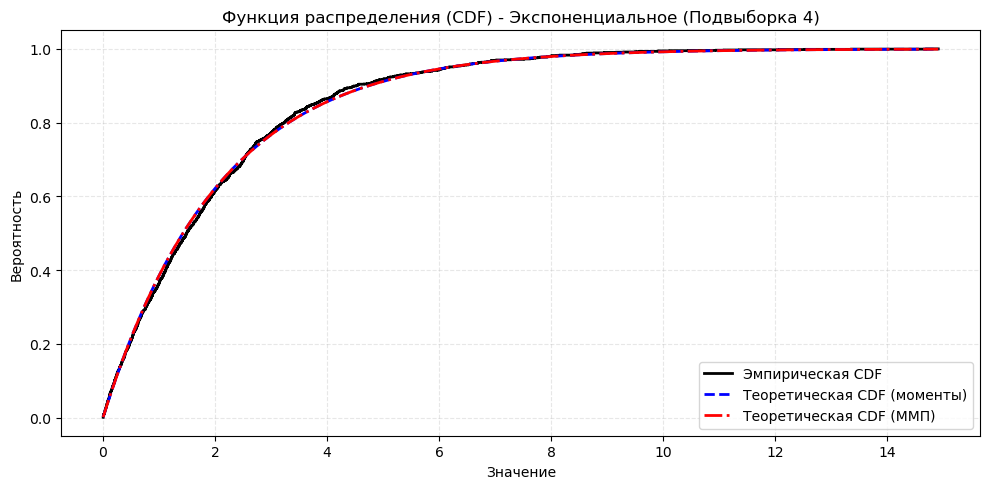

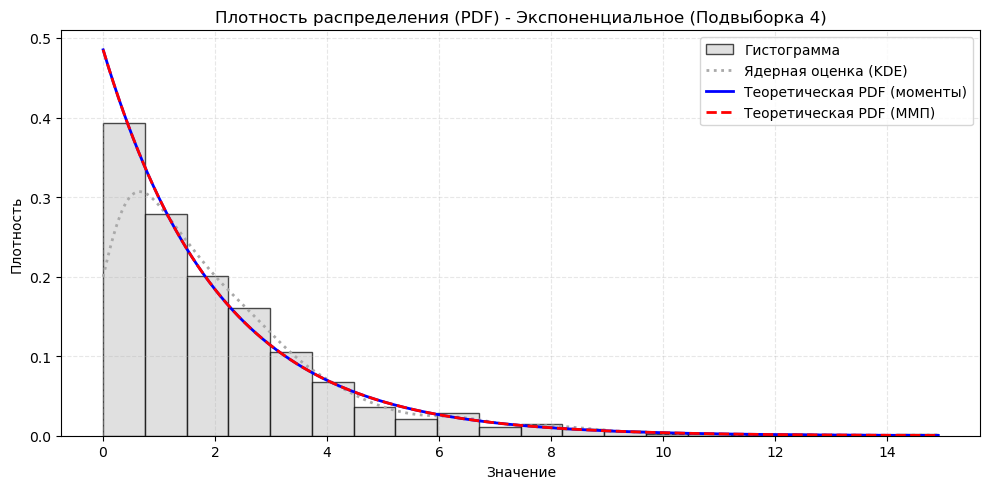


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6426
Метод максимального правдоподобия (ММП):
  sigma = 2.0322


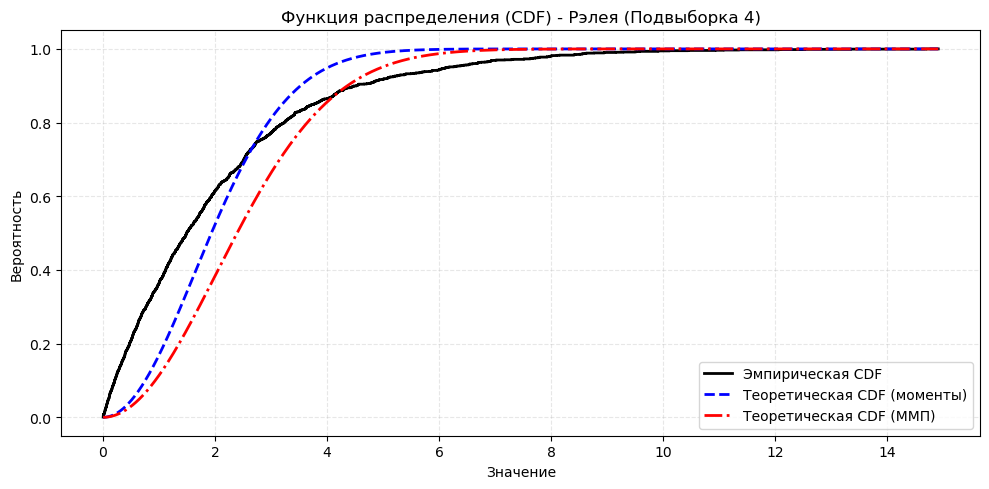

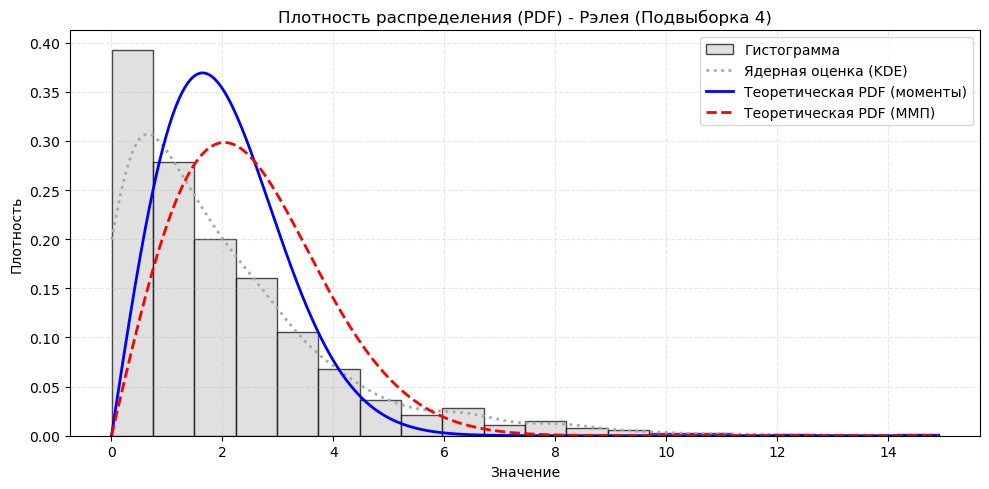


Разница между методами: 0.3896
Относительная разница: 23.72%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 1.0534
  scale = 1.9544
Метод максимального правдоподобия (ММП):
  a = 1.0191
  scale = 2.0202


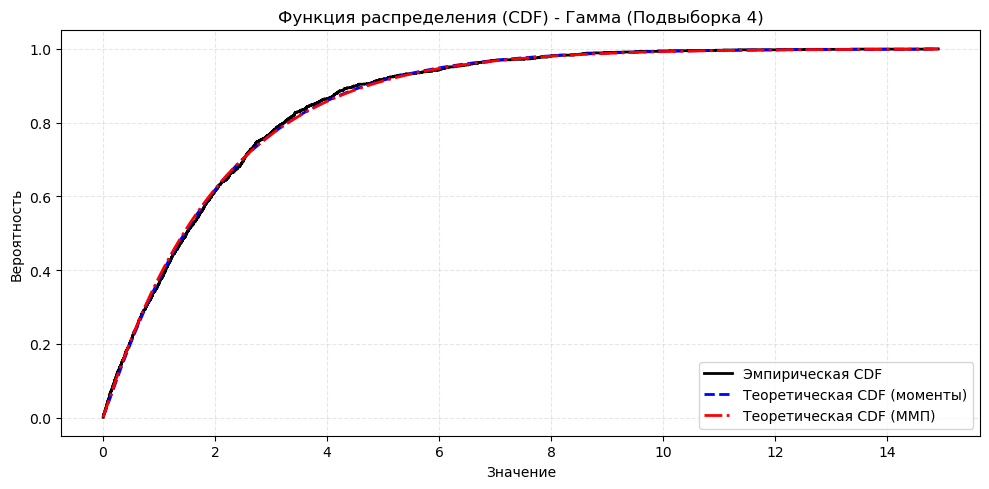

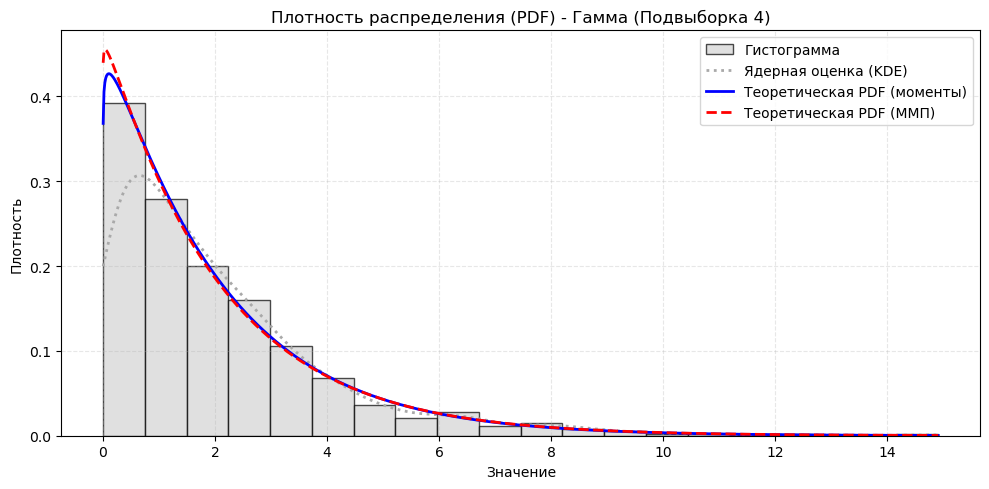


Анализ подвыборки 5 (размер: 1660 элементов)
Мин: 0.0015, Макс: 20.0732, Среднее: 2.1580

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.1580
Метод максимального правдоподобия (ММП):
  scale = 2.1580


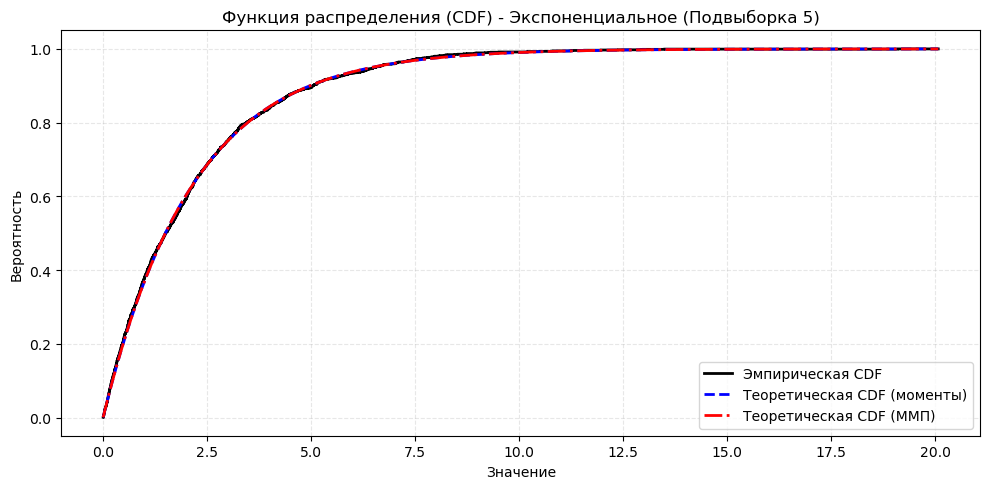

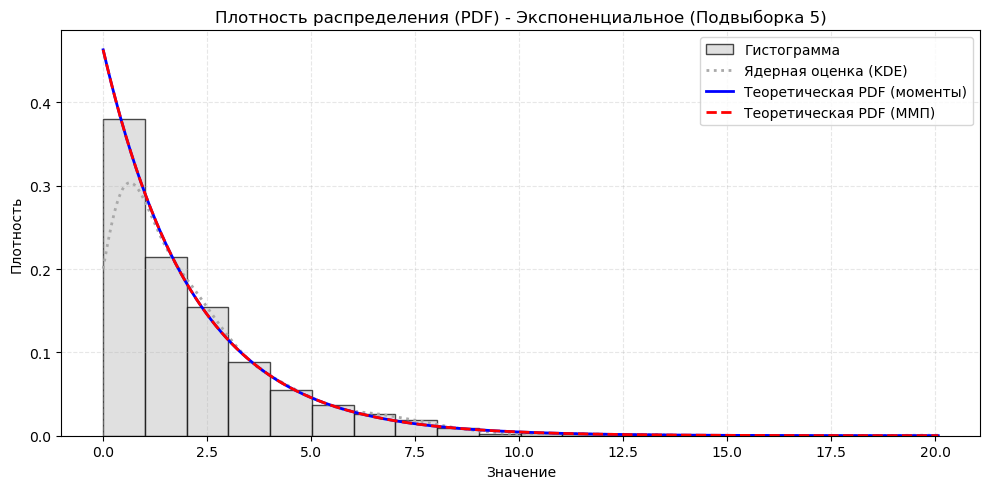


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.7218
Метод максимального правдоподобия (ММП):
  sigma = 2.1650


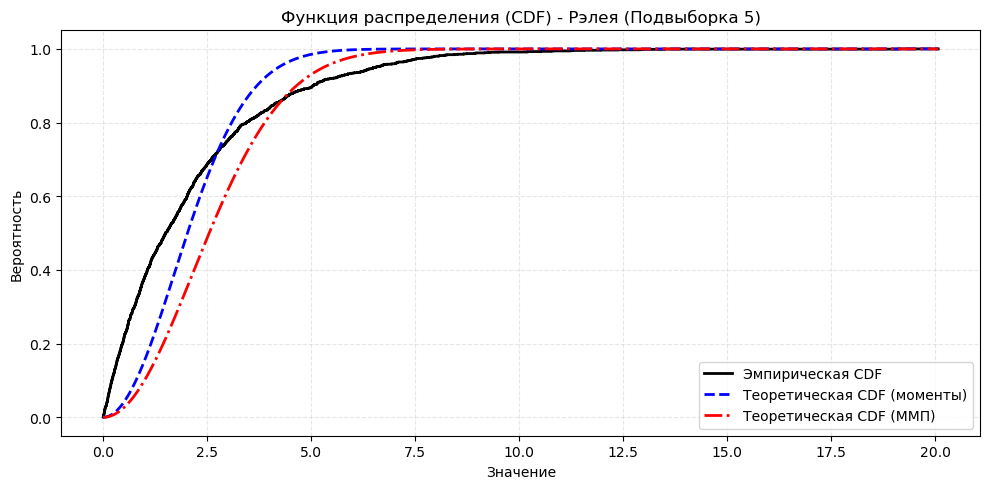

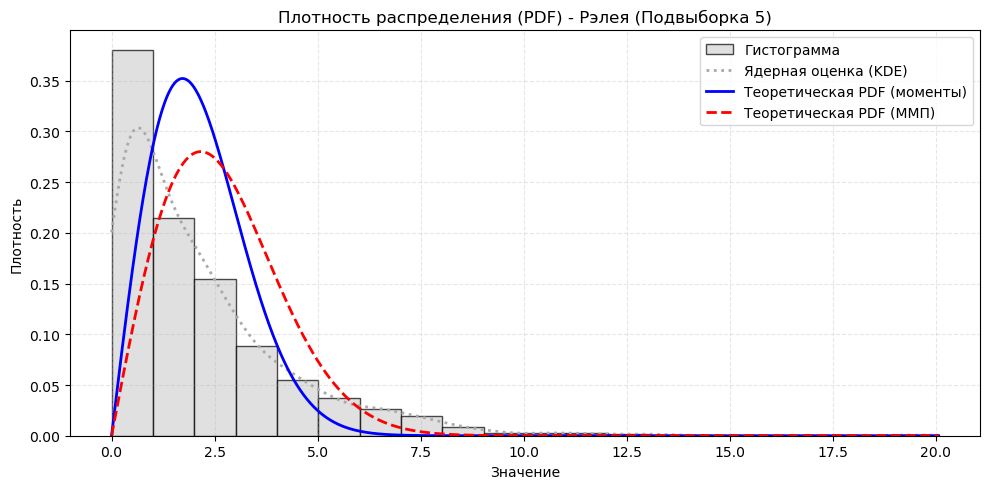


Разница между методами: 0.4432
Относительная разница: 25.74%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 0.9865
  scale = 2.1874
Метод максимального правдоподобия (ММП):
  a = 0.9894
  scale = 2.1811


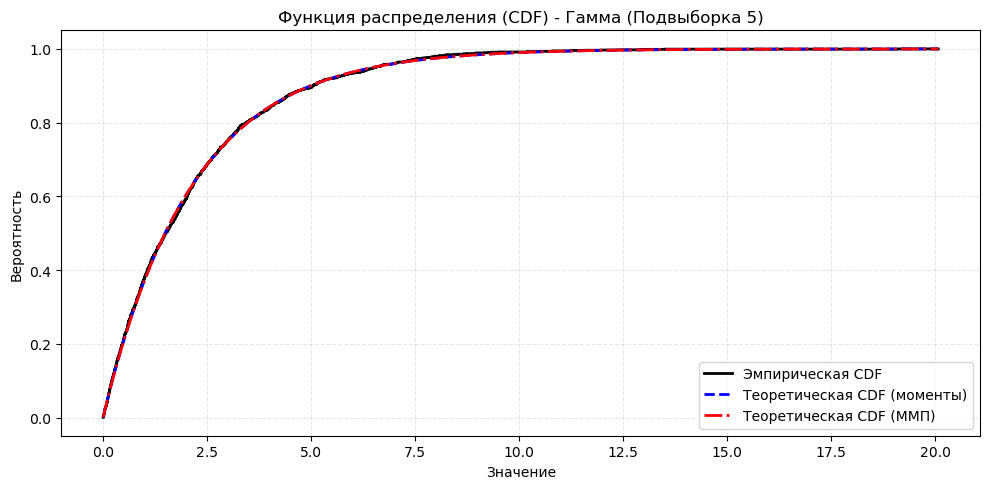

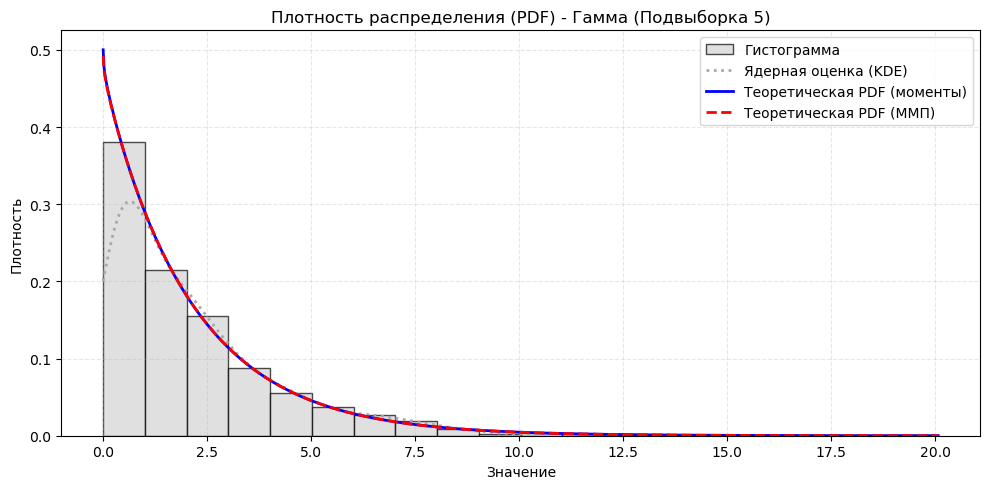


Анализ подвыборки 6 (размер: 1660 элементов)
Мин: 0.0001, Макс: 19.1065, Среднее: 2.2104

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.2104
Метод максимального правдоподобия (ММП):
  scale = 2.2104


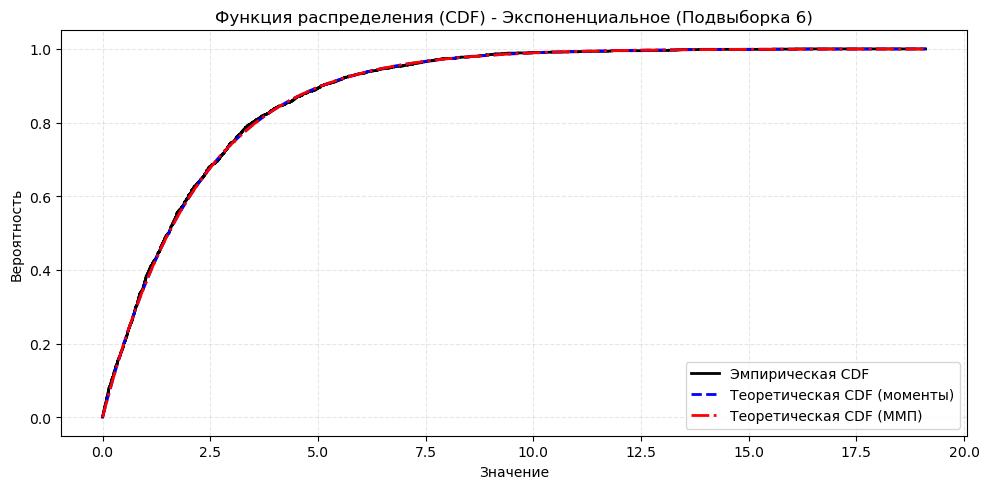

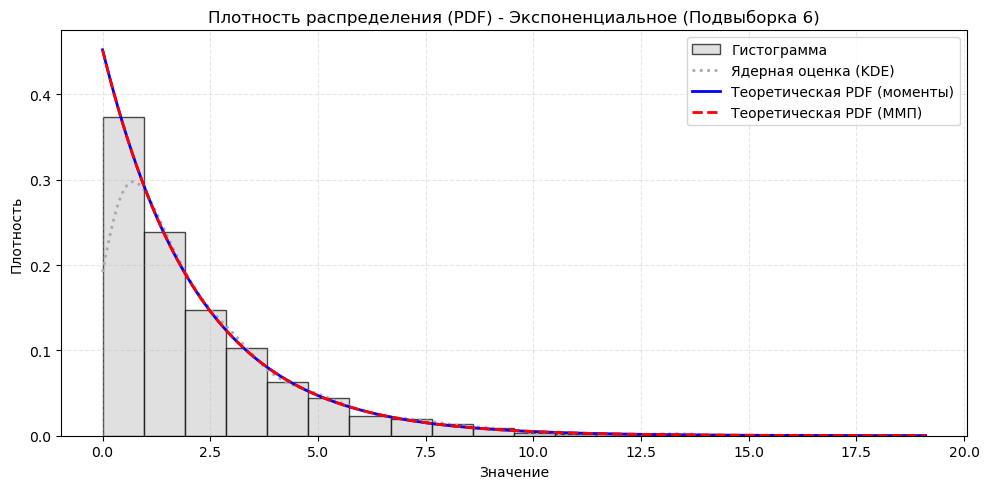


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.7636
Метод максимального правдоподобия (ММП):
  sigma = 2.2301


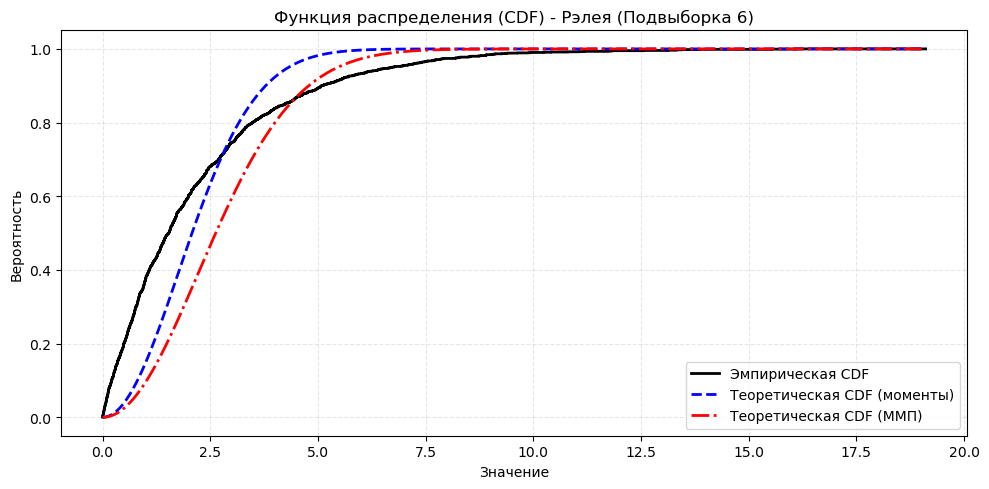

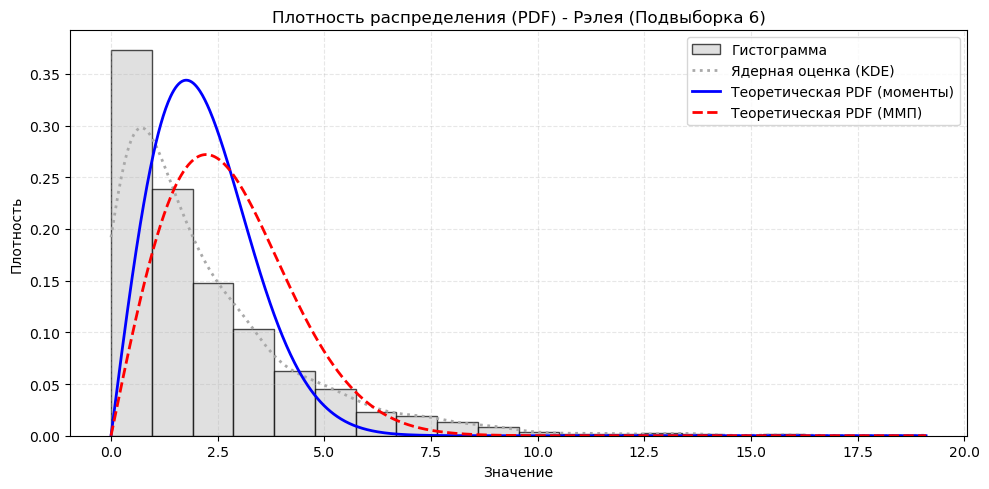


Разница между методами: 0.4665
Относительная разница: 26.45%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 0.9648
  scale = 2.2911
Метод максимального правдоподобия (ММП):
  a = 0.9668
  scale = 2.2862


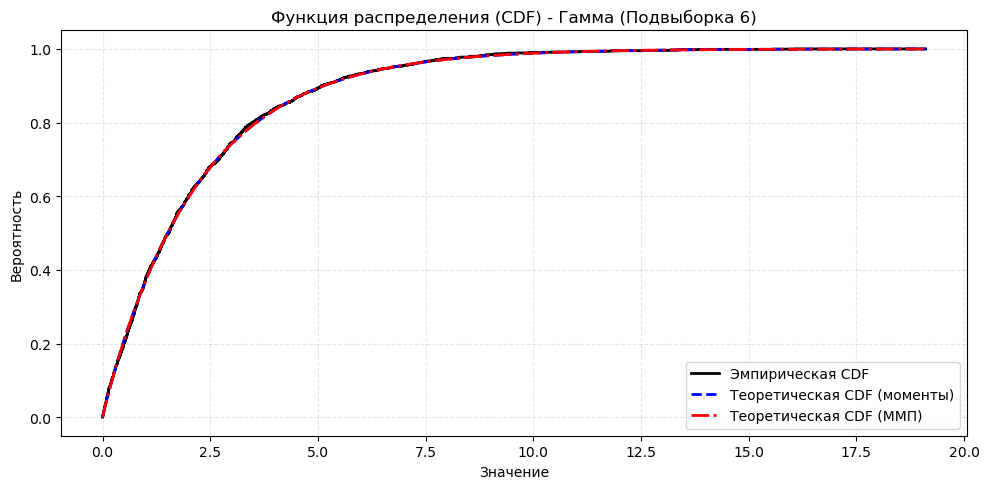

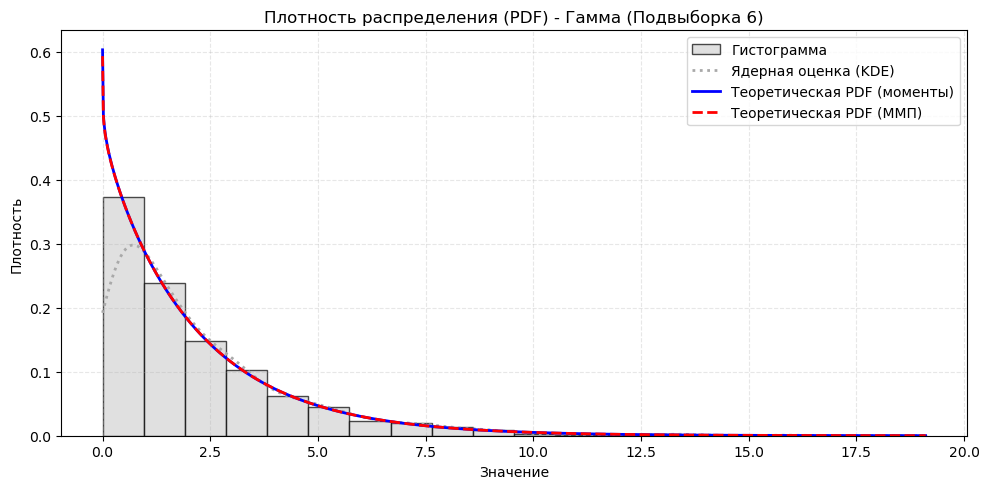


Анализ подвыборки 7 (размер: 1660 элементов)
Мин: 0.0001, Макс: 13.8674, Среднее: 2.1134

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.1134
Метод максимального правдоподобия (ММП):
  scale = 2.1134


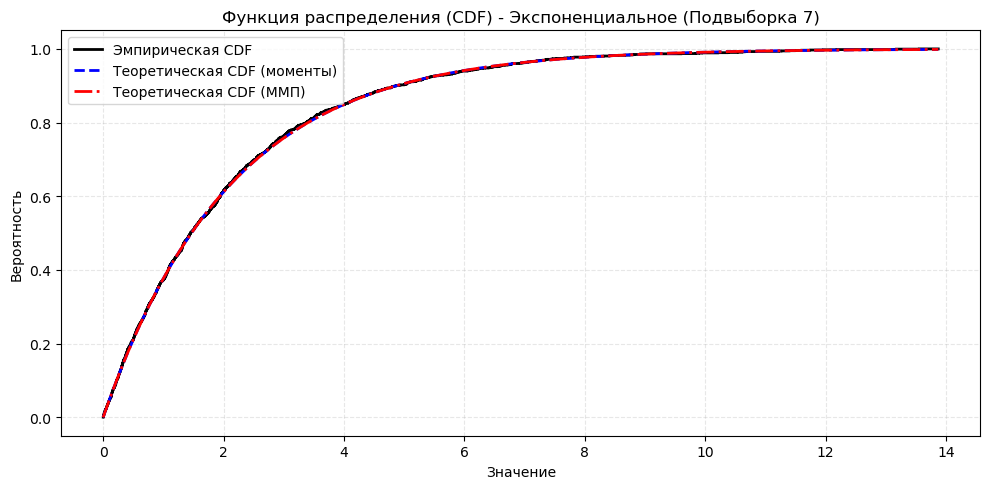

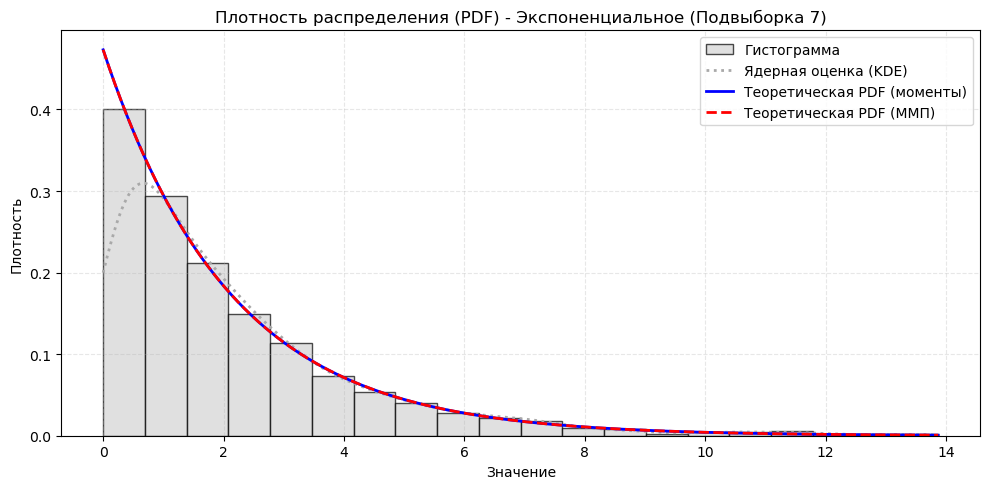


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6863
Метод максимального правдоподобия (ММП):
  sigma = 2.1153


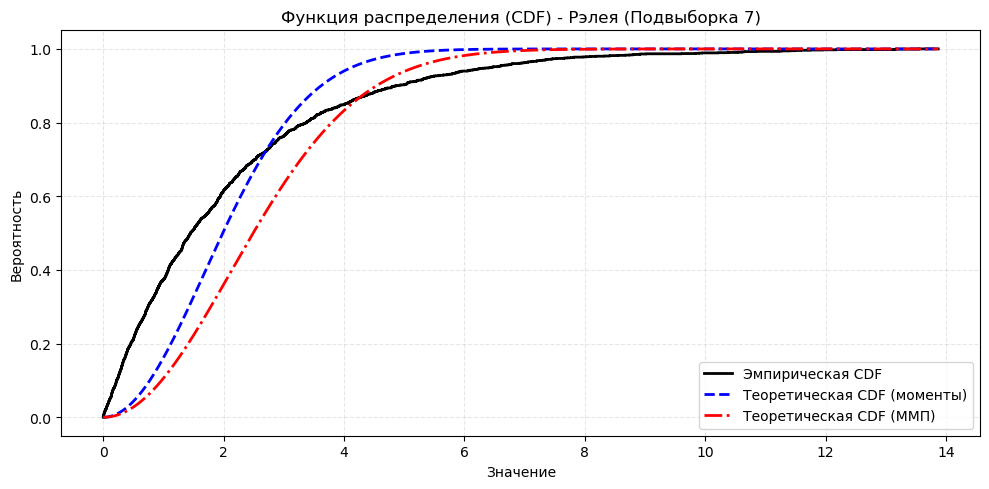

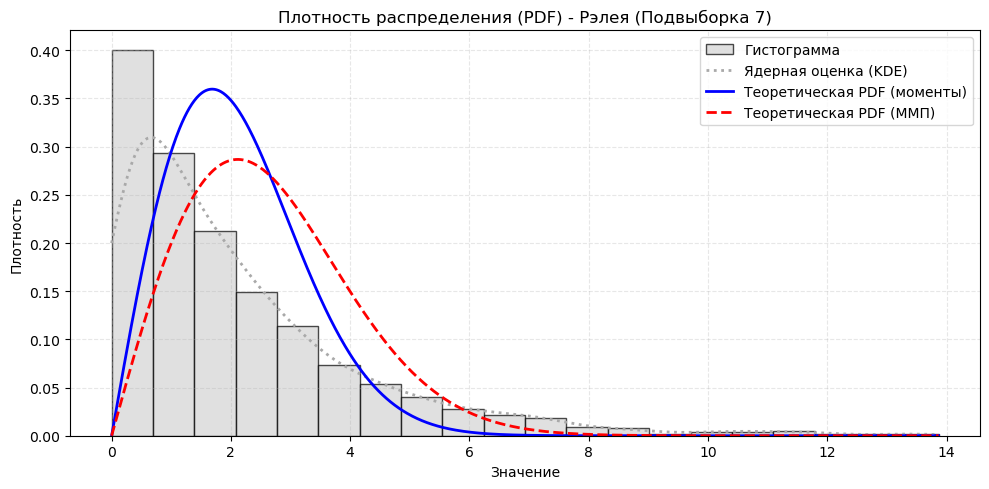


Разница между методами: 0.4290
Относительная разница: 25.44%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 0.9960
  scale = 2.1220
Метод максимального правдоподобия (ММП):
  a = 0.9955
  scale = 2.1231


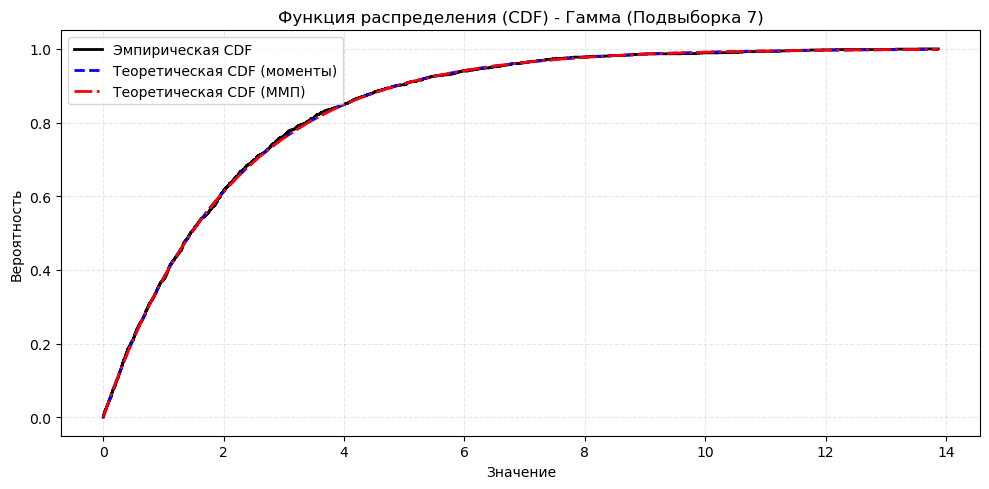

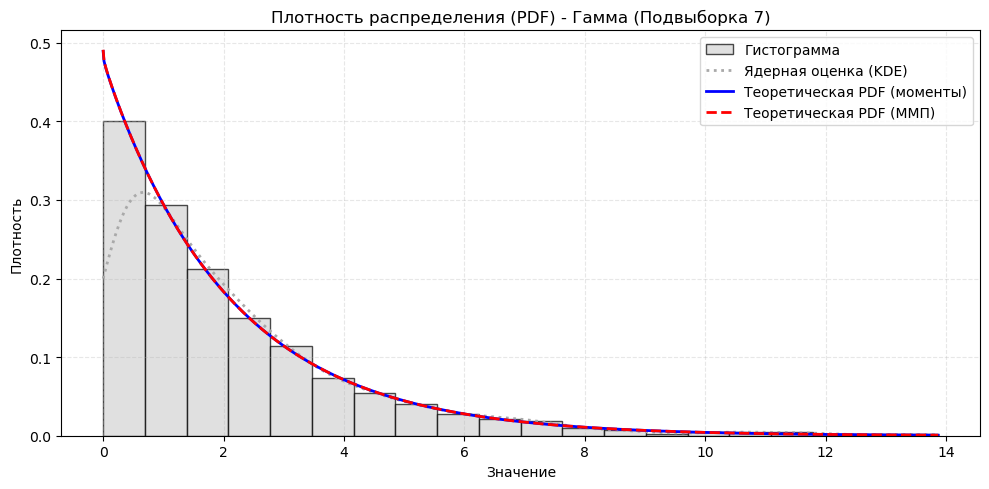


Анализ подвыборки 8 (размер: 1660 элементов)
Мин: 0.0004, Макс: 17.0243, Среднее: 2.0906

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.0906
Метод максимального правдоподобия (ММП):
  scale = 2.0906


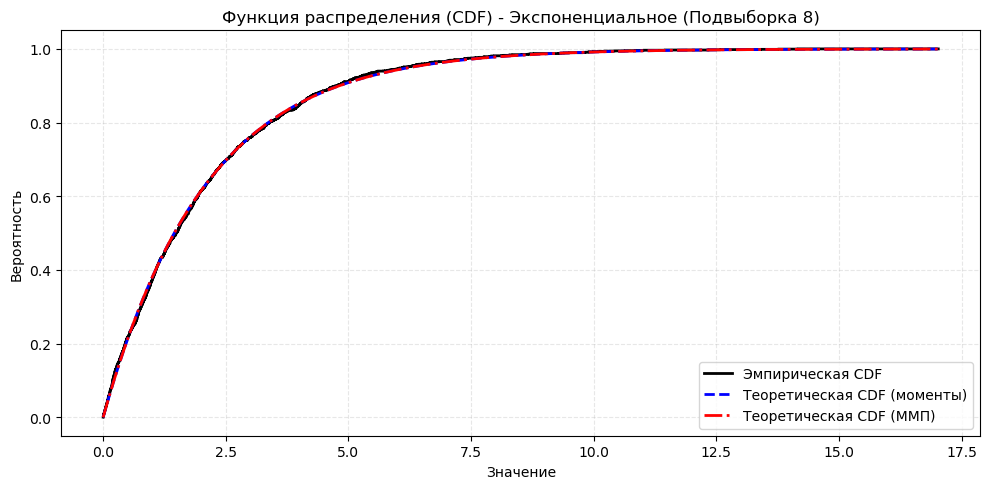

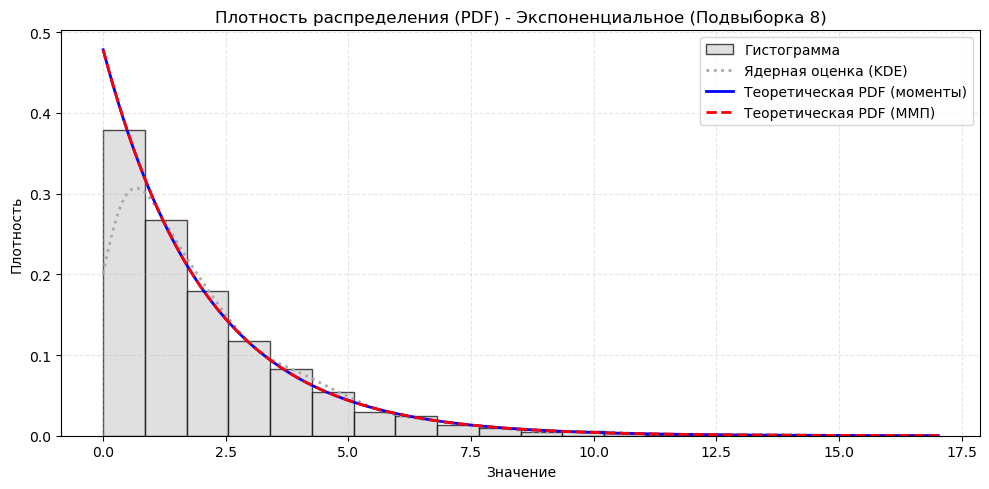


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6681
Метод максимального правдоподобия (ММП):
  sigma = 2.0779


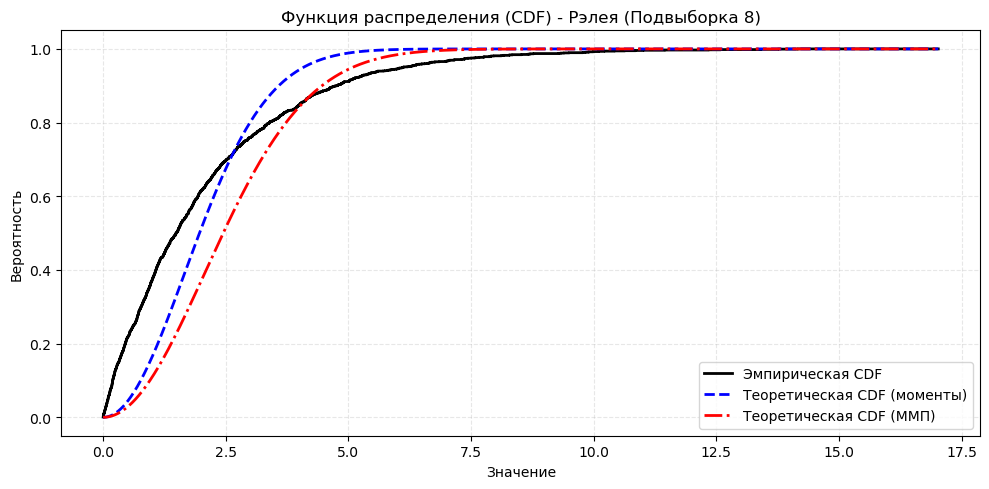

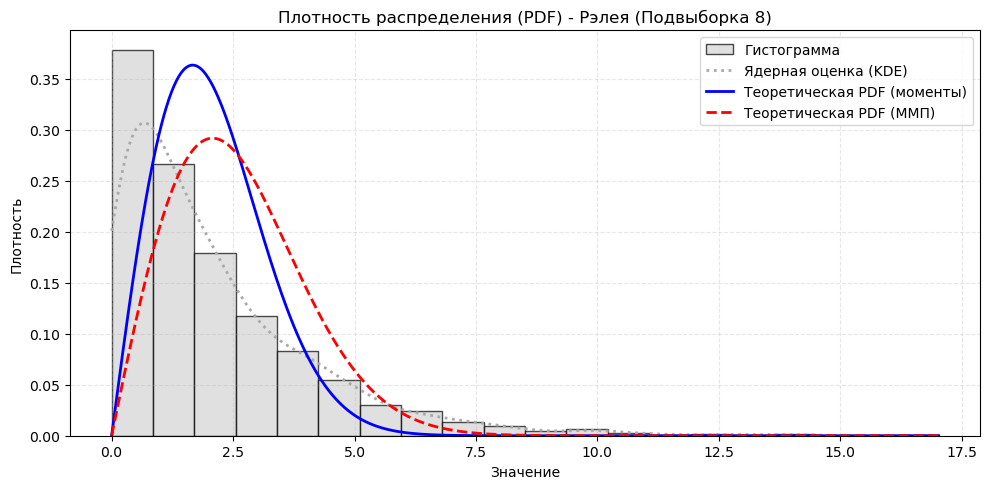


Разница между методами: 0.4098
Относительная разница: 24.57%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 1.0243
  scale = 2.0410
Метод максимального правдоподобия (ММП):
  a = 0.9868
  scale = 2.1185


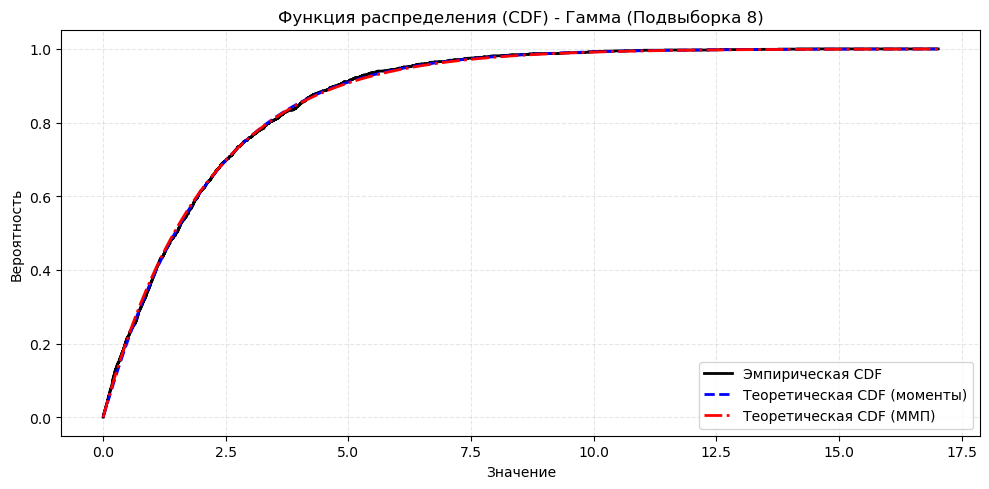

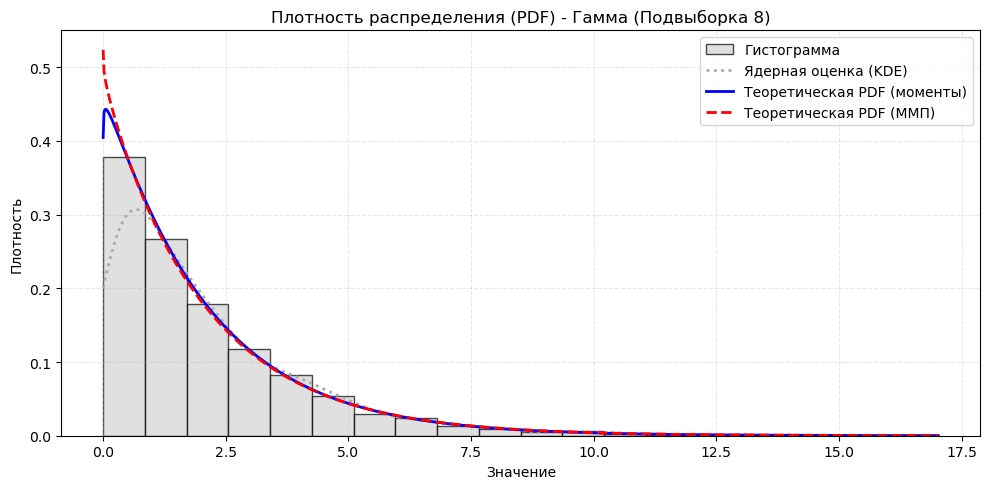


Анализ подвыборки 9 (размер: 1660 элементов)
Мин: 0.0004, Макс: 15.8456, Среднее: 2.1145

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.1145
Метод максимального правдоподобия (ММП):
  scale = 2.1145


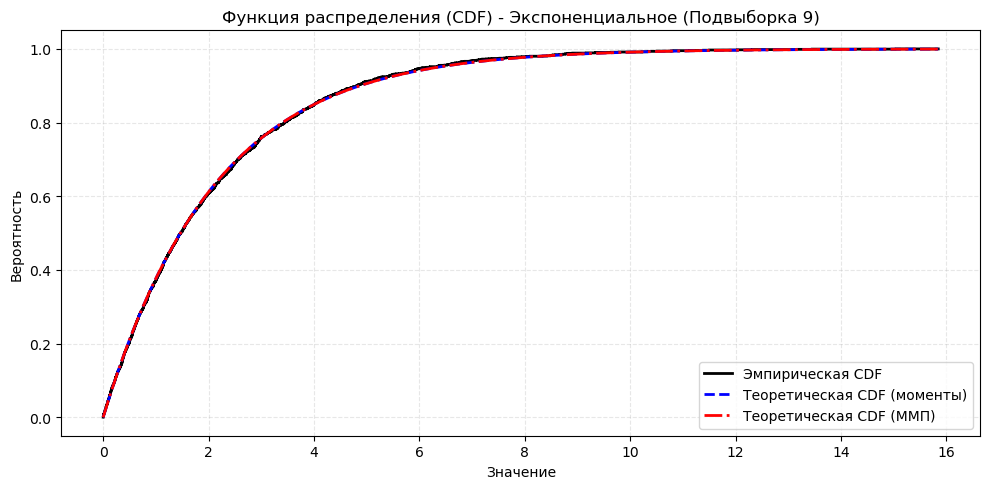

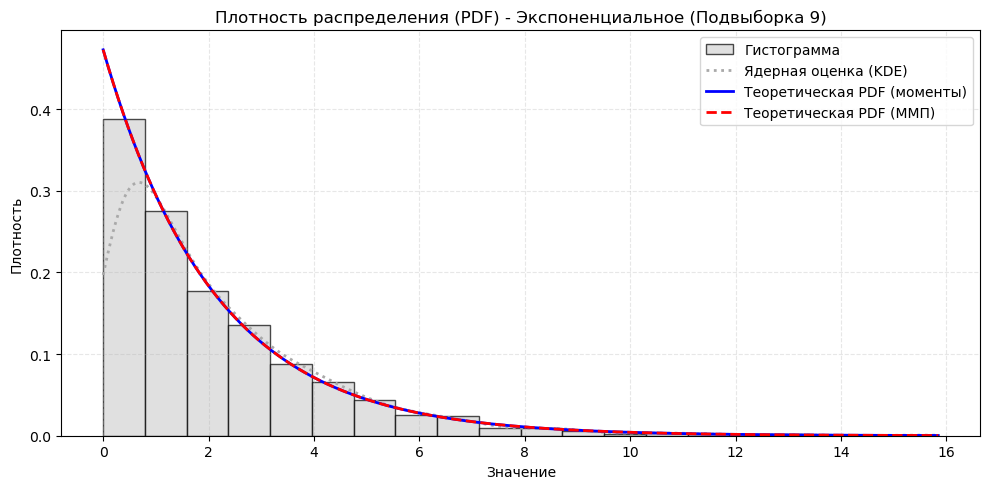


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6871
Метод максимального правдоподобия (ММП):
  sigma = 2.0963


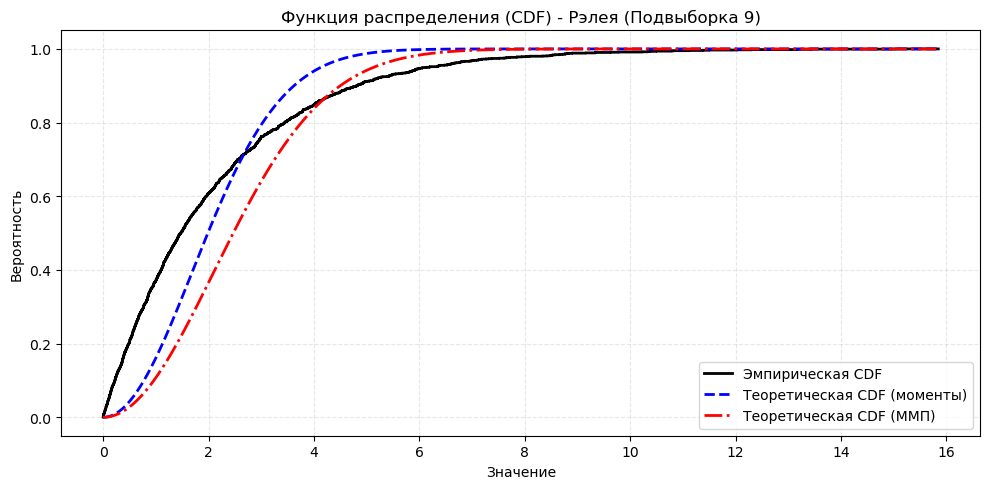

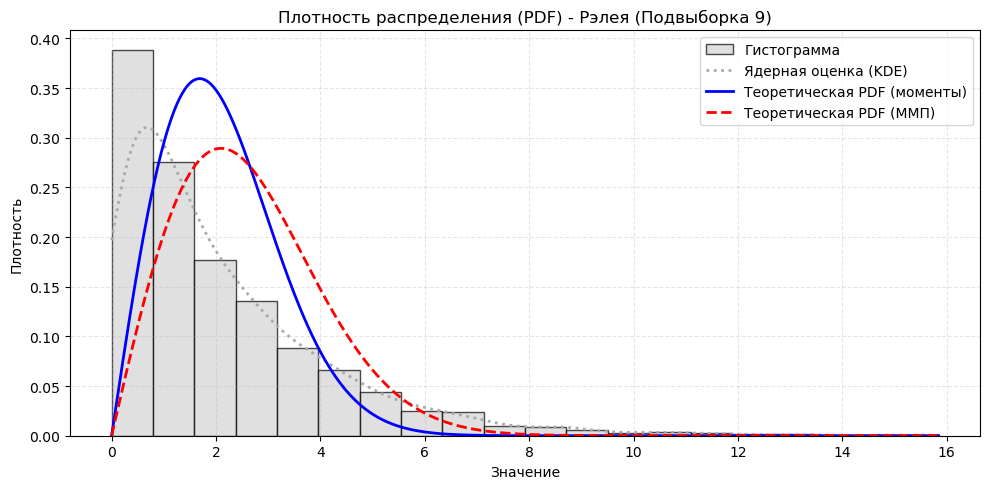


Разница между методами: 0.4091
Относительная разница: 24.25%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 1.0350
  scale = 2.0430
Метод максимального правдоподобия (ММП):
  a = 1.0016
  scale = 2.1112


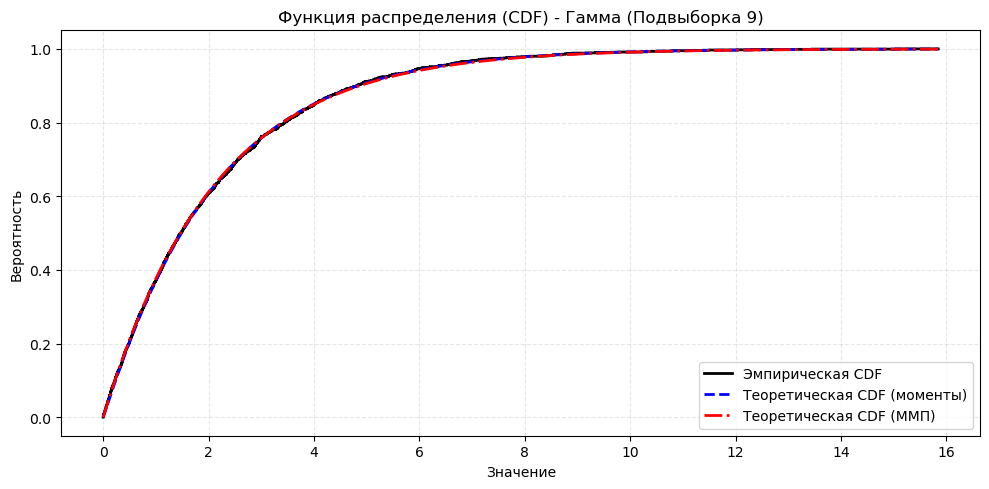

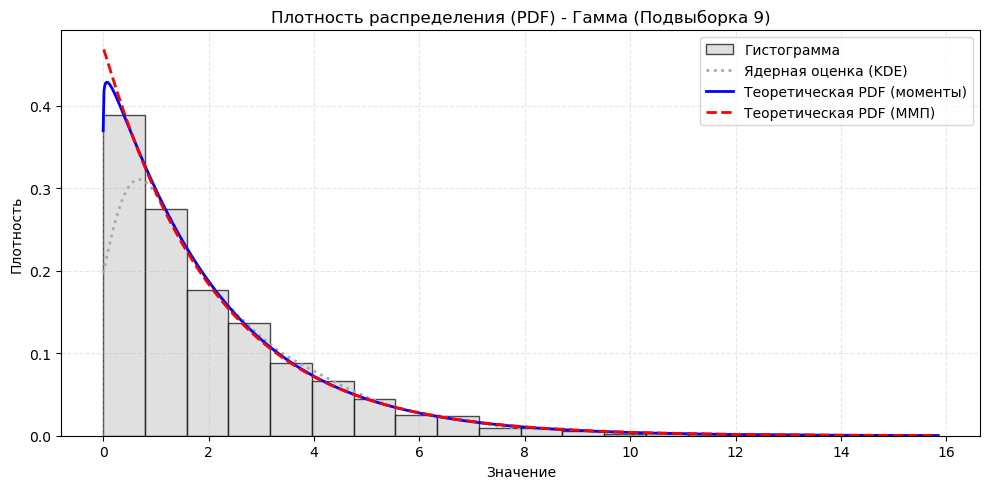


Анализ подвыборки 10 (размер: 1660 элементов)
Мин: 0.0008, Макс: 15.1871, Среднее: 2.0957

--------------------------------------------------
Распределение: Экспоненциальное
--------------------------------------------------
Метод моментов:
  scale = 2.0957
Метод максимального правдоподобия (ММП):
  scale = 2.0957


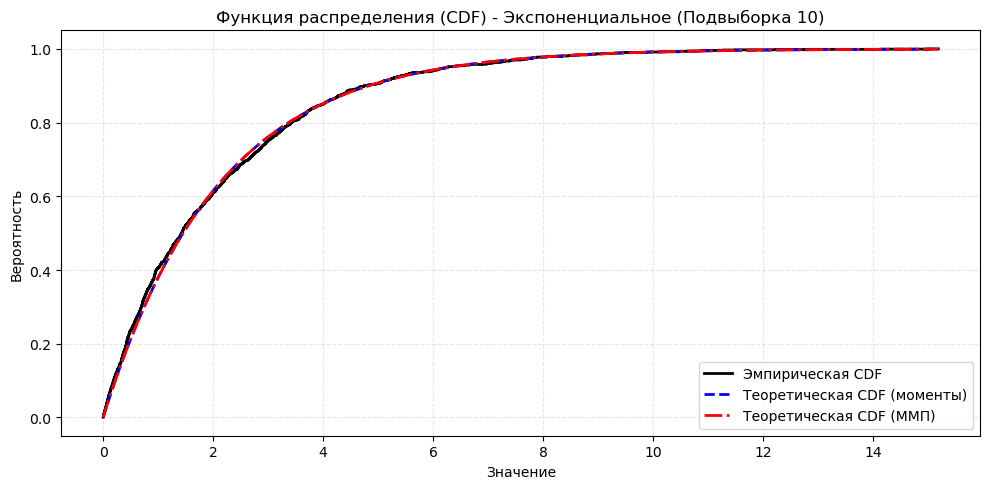

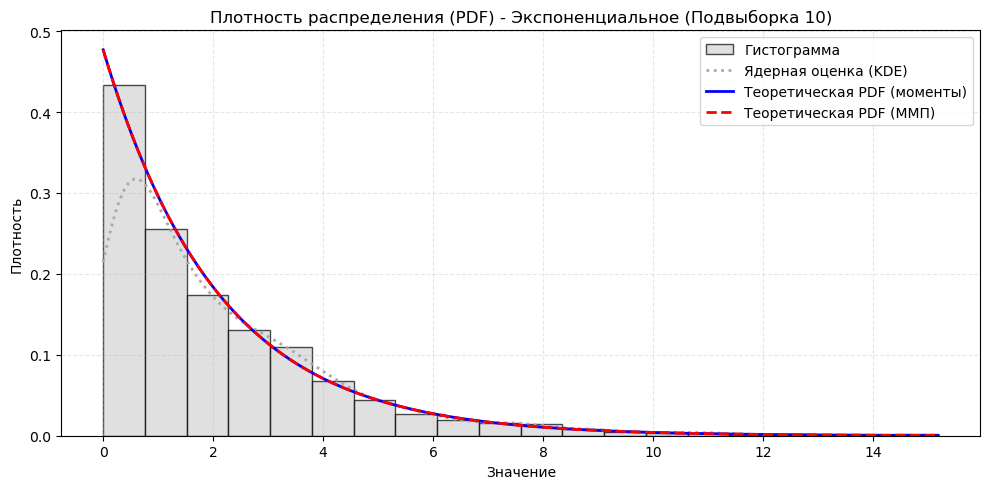


Разница между методами: 0.0000
Относительная разница: 0.00%

--------------------------------------------------
Распределение: Рэлея
--------------------------------------------------
Метод моментов:
  sigma = 1.6721
Метод максимального правдоподобия (ММП):
  sigma = 2.1090


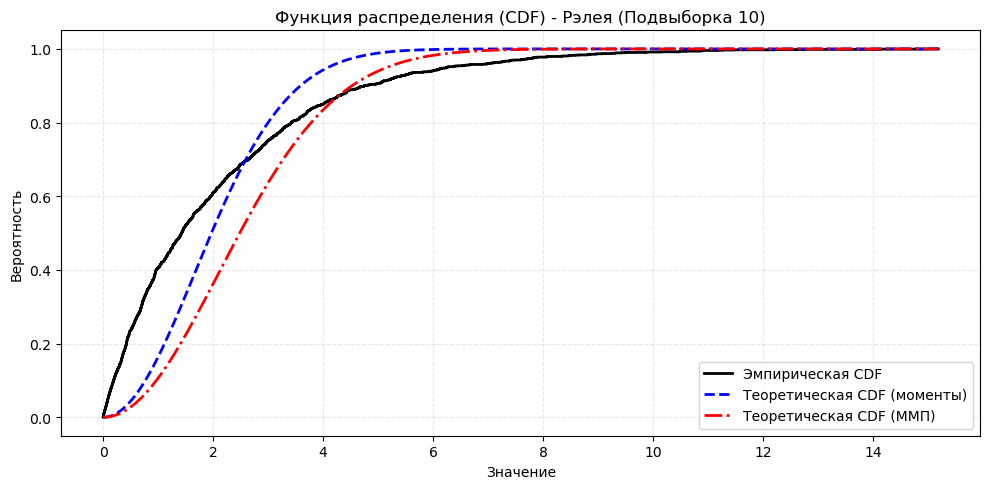

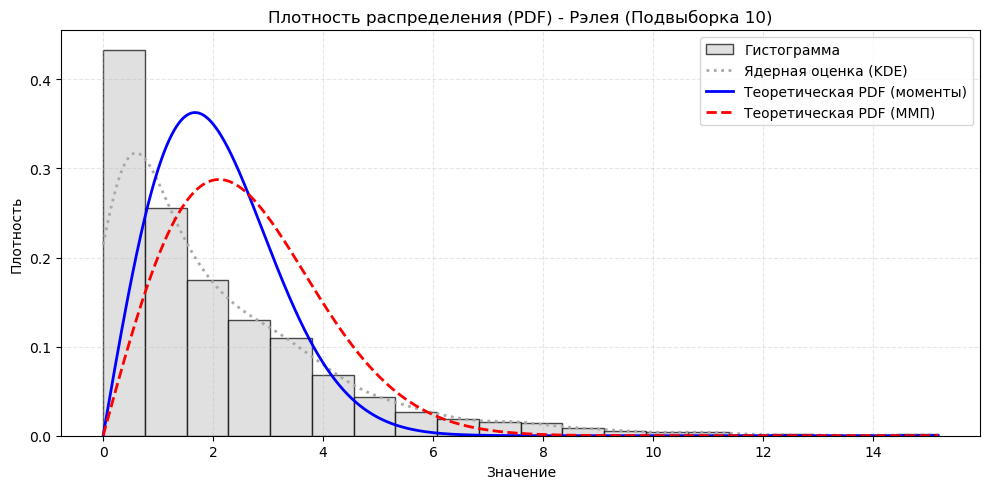


Разница между методами: 0.4369
Относительная разница: 26.13%

--------------------------------------------------
Распределение: Гамма
--------------------------------------------------
Метод моментов:
  a = 0.9744
  scale = 2.1506
Метод максимального правдоподобия (ММП):
  a = 0.9399
  scale = 2.2296


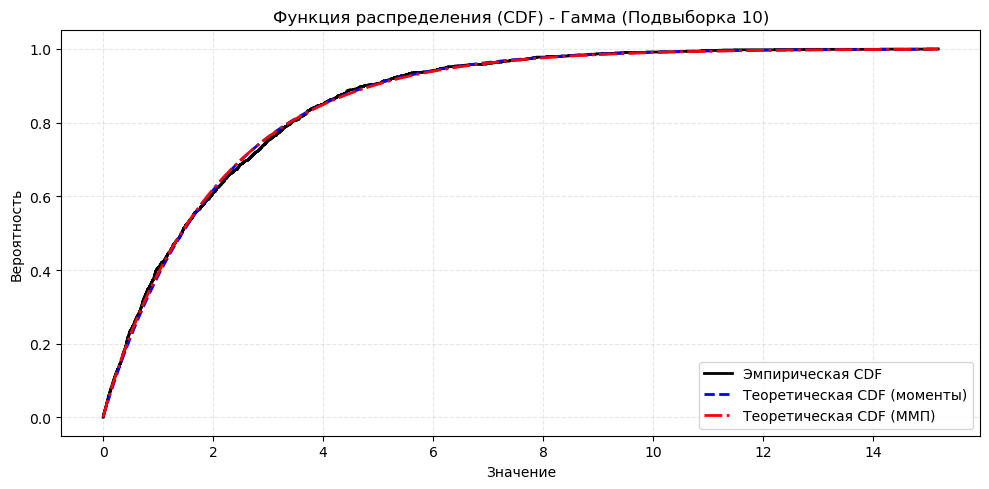

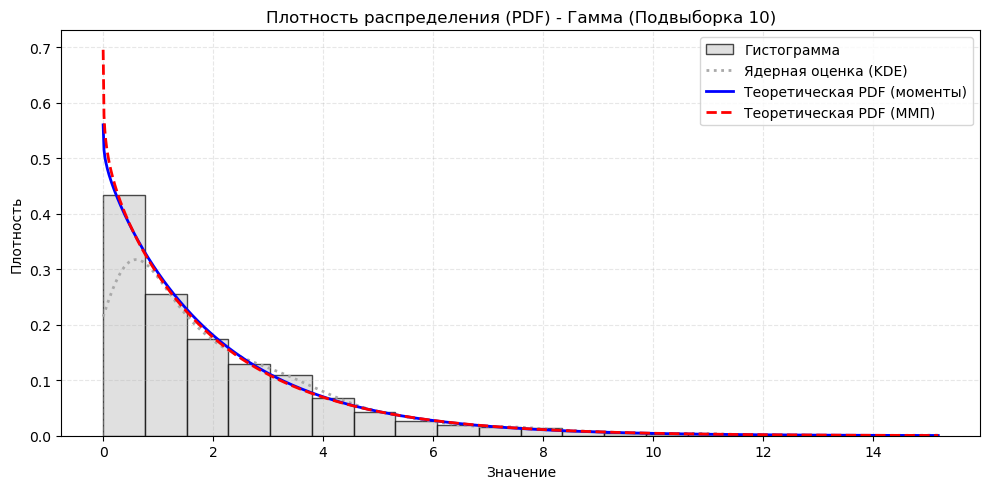

In [ ]:
from scipy.stats import gaussian_kde

# ========================
# Функции для расчета параметров
# ========================


def calculate_moments(data, dist_name):
    """Рассчитывает параметры методом моментов"""
    if dist_name == "Экспоненциальное":
        scale = np.mean(data)
        return {"scale": scale}

    elif dist_name == "Рэлея":
        mean = np.mean(data)
        sigma = mean / np.sqrt(np.pi / 2)
        return {"sigma": sigma}

    elif dist_name == "Гамма":
        mean = np.mean(data)
        var = np.var(data, ddof=1)
        a = mean**2 / var
        scale = var / mean
        return {"a": a, "scale": scale}


def calculate_mle(data, dist_name):
    """Рассчитывает параметры методом максимального правдоподобия"""
    if dist_name == "Экспоненциальное":
        params = stats.expon.fit(data, floc=0)
        return {"scale": params[1]}

    elif dist_name == "Рэлея":
        params = stats.rayleigh.fit(data, floc=0)
        return {"sigma": params[1]}

    elif dist_name == "Гамма":
        params = stats.gamma.fit(data, floc=0)
        return {"a": params[0], "scale": params[2]}


# ========================
# Основной цикл по подвыборкам
# ========================

for idx, podv in enumerate(Xpodv):
    data = podv.copy()

    # Проверка на отрицательные значения
    if np.min(data) < 0:
        data_shifted = data - np.min(data) + 1e-10
        shifted = True
    else:
        data_shifted = data
        shifted = False

    # ========================
    # Вывод информации о подвыборке
    # ========================
    print(f"\n{'='*60}")
    print(f"Анализ подвыборки {idx+1} (размер: {len(data_shifted)} элементов)")
    print(
        f"Мин: {np.min(data):.4f}, Макс: {np.max(data):.4f}, Среднее: {np.mean(data):.4f}"
    )
    if shifted:
        print("Предупреждение: данные сдвинуты в положительную область для анализа")
    print(f"{'='*60}")

    # ========================
    # Анализ для каждого распределения
    # ========================
    for dist_name in ["Экспоненциальное", "Рэлея", "Гамма"]:
        print(f"\n{'-'*50}")
        print(f"Распределение: {dist_name}")
        print(f"{'-'*50}")

        # Рассчитываем параметры
        params_mm = calculate_moments(data_shifted, dist_name)
        params_mle = calculate_mle(data_shifted, dist_name)

        # Выводим параметры в консоль
        print("Метод моментов:")
        for param, value in params_mm.items():
            print(f"  {param} = {value:.4f}")

        print("Метод максимального правдоподобия (ММП):")
        for param, value in params_mle.items():
            print(f"  {param} = {value:.4f}")

        # ========================
        # Построение графиков
        # ========================

        # Подготовка данных для графиков
        x = np.sort(data_shifted)
        y_empirical = np.arange(1, len(x) + 1) / len(x)
        x_plot = np.linspace(min(data_shifted), max(data_shifted), 1000)

        # Определение функций PDF и CDF для текущего распределения
        if dist_name == "Экспоненциальное":
            pdf_mm = stats.expon.pdf(x_plot, scale=params_mm["scale"])
            cdf_mm = stats.expon.cdf(x_plot, scale=params_mm["scale"])
            pdf_mle = stats.expon.pdf(x_plot, scale=params_mle["scale"])
            cdf_mle = stats.expon.cdf(x_plot, scale=params_mle["scale"])

        elif dist_name == "Рэлея":
            pdf_mm = stats.rayleigh.pdf(x_plot, scale=params_mm["sigma"])
            cdf_mm = stats.rayleigh.cdf(x_plot, scale=params_mm["sigma"])
            pdf_mle = stats.rayleigh.pdf(x_plot, scale=params_mle["sigma"])
            cdf_mle = stats.rayleigh.cdf(x_plot, scale=params_mle["sigma"])

        elif dist_name == "Гамма":
            pdf_mm = stats.gamma.pdf(x_plot, a=params_mm["a"], scale=params_mm["scale"])
            cdf_mm = stats.gamma.cdf(x_plot, a=params_mm["a"], scale=params_mm["scale"])
            pdf_mle = stats.gamma.pdf(
                x_plot, a=params_mle["a"], scale=params_mle["scale"]
            )
            cdf_mle = stats.gamma.cdf(
                x_plot, a=params_mle["a"], scale=params_mle["scale"]
            )

        # ========================
        # График 1: Функция распределения (CDF)
        # ========================
        plt.figure(figsize=(10, 5))

        # Эмпирическая CDF
        plt.step(x, y_empirical, label="Эмпирическая CDF", linewidth=2, color="black")

        # Теоретическая CDF (метод моментов)
        plt.plot(
            x_plot,
            cdf_mm,
            label=f"Теоретическая CDF (моменты)",
            linestyle="--",
            linewidth=2,
            color="blue",
        )

        # Теоретическая CDF (ММП)
        plt.plot(
            x_plot,
            cdf_mle,
            label=f"Теоретическая CDF (ММП)",
            linestyle="-.",
            linewidth=2,
            color="red",
        )

        plt.title(f"Функция распределения (CDF) - {dist_name} (Подвыборка {idx+1})")
        plt.xlabel("Значение")
        plt.ylabel("Вероятность")
        plt.legend()
        plt.grid(True, alpha=0.3, linestyle="--")
        plt.tight_layout()
        plt.show()

        # ========================
        # График 2: Плотность распределения (PDF)
        # ========================
        plt.figure(figsize=(10, 5))

        # Гистограмма
        plt.hist(
            data_shifted,
            bins=20,
            density=True,
            alpha=0.7,
            color="lightgray",
            edgecolor="black",
            label="Гистограмма",
        )

        # Ядерная оценка плотности (KDE) - через scipy
        kde = gaussian_kde(data_shifted)
        kde_x = np.linspace(min(data_shifted), max(data_shifted), 1000)
        kde_y = kde(kde_x)
        plt.plot(
            kde_x,
            kde_y,
            color="darkgray",
            linestyle=":",
            linewidth=2,
            label="Ядерная оценка (KDE)",
        )

        # Теоретическая PDF (метод моментов)
        plt.plot(
            x_plot,
            pdf_mm,
            label=f"Теоретическая PDF (моменты)",
            linewidth=2,
            color="blue",
        )

        # Теоретическая PDF (ММП)
        plt.plot(
            x_plot,
            pdf_mle,
            label=f"Теоретическая PDF (ММП)",
            linewidth=2,
            color="red",
            linestyle="--",
        )

        plt.title(f"Плотность распределения (PDF) - {dist_name} (Подвыборка {idx+1})")
        plt.xlabel("Значение")
        plt.ylabel("Плотность")
        plt.legend()
        plt.grid(True, alpha=0.3, linestyle="--")
        plt.tight_layout()
        plt.show()

        # Сравнение методов
        if dist_name in ["Экспоненциальное", "Рэлея"]:
            diff = abs(
                params_mm[list(params_mm.keys())[0]]
                - params_mle[list(params_mle.keys())[0]]
            )
            print(f"\nРазница между методами: {diff:.4f}")
            print(
                f"Относительная разница: {diff / params_mm[list(params_mm.keys())[0]] * 100:.2f}%"
            )

### 2.3: Проверка гипотез ("хи-квадрат", Колмогорова-Смирнова, "омега-квадрат")

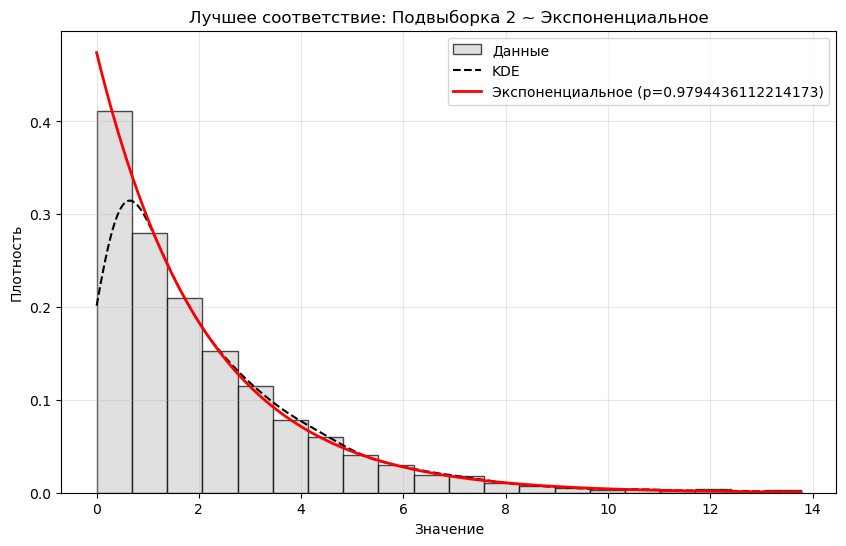

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# ========================
# 1. Оптимизированная функция хи-квадрат
# ========================


def chi2_test(data, dist_config, params):
    """Оптимизированный расчет критерия хи-квадрат с векторизованными операциями"""
    n = len(data)

    # Оптимальное количество интервалов (улучшенная формула)
    k = max(5, min(20, int(1 + 3.322 * np.log10(n))))

    # Автоматическая корректировка интервалов
    bins = np.linspace(min(data), max(data), k + 1)
    observed, _ = np.histogram(data, bins=bins)

    # Векторизованный расчет ожидаемых частот
    cdf_vals = dist_config["cdf_func"](bins, params)
    expected = n * np.diff(cdf_vals)

    # Быстрая фильтрация интервалов с малыми частотами
    valid_mask = expected >= 5
    if not np.all(valid_mask):
        # Если есть малые частоты, уменьшаем количество интервалов
        k = max(5, k - 2)
        bins = np.linspace(min(data), max(data), k + 1)
        observed, _ = np.histogram(data, bins=bins)
        cdf_vals = dist_config["cdf_func"](bins, params)
        expected = n * np.diff(cdf_vals)
        valid_mask = expected >= 5

    # Фильтрация нулевых интервалов
    valid_mask = valid_mask & (expected > 0)
    observed = observed[valid_mask]
    expected = expected[valid_mask]

    # Векторизованный расчет статистики
    chi2_stat = np.sum((observed - expected) ** 2 / expected)
    df = len(observed) - 1 - len(params)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, df, p_value


# ========================
# 2. Конфигурация распределений (убираем дублирование)
# ========================

DISTRIBUTIONS = {
    "Экспоненциальное": {
        "fit_func": lambda data: {"scale": stats.expon.fit(data, floc=0)[1]},
        "ks_func": lambda data, params: stats.kstest(
            data, "expon", args=(0, params["scale"])
        ),
        "cvm_func": lambda data, params: stats.cramervonmises(
            data, "expon", args=(0, params["scale"])
        ),
        "cdf_func": lambda bins, params: stats.expon.cdf(bins, scale=params["scale"]),
        "pdf_func": lambda x, params: stats.expon.pdf(x, scale=params["scale"]),
    },
    "Рэлея": {
        "fit_func": lambda data: {"sigma": stats.rayleigh.fit(data, floc=0)[1]},
        "ks_func": lambda data, params: stats.kstest(
            data, "rayleigh", args=(0, params["sigma"])
        ),
        "cvm_func": lambda data, params: stats.cramervonmises(
            data, "rayleigh", args=(0, params["sigma"])
        ),
        "cdf_func": lambda bins, params: stats.rayleigh.cdf(
            bins, scale=params["sigma"]
        ),
        "pdf_func": lambda x, params: stats.rayleigh.pdf(x, scale=params["sigma"]),
    },
    "Гамма": {
        "fit_func": lambda data: {
            "a": stats.gamma.fit(data, floc=0)[0],
            "scale": stats.gamma.fit(data, floc=0)[2],
        },
        "ks_func": lambda data, params: stats.kstest(
            data, "gamma", args=(params["a"], 0, params["scale"])
        ),
        "cvm_func": lambda data, params: stats.cramervonmises(
            data, "gamma", args=(params["a"], 0, params["scale"])
        ),
        "cdf_func": lambda bins, params: stats.gamma.cdf(
            bins, a=params["a"], scale=params["scale"]
        ),
        "pdf_func": lambda x, params: stats.gamma.pdf(
            x, a=params["a"], scale=params["scale"]
        ),
    },
}

# ========================
# 3. Основной цикл (оптимизирован)
# ========================


# Определение сдвига данных
def prepare_data(data):
    if np.min(data) < 0:
        return data - np.min(data) + 1e-10, "Да"
    return data, "Нет"


results = []
for idx, podv in enumerate(Xpodv):
    data, shifted = prepare_data(podv)

    for dist_name, dist_config in DISTRIBUTIONS.items():
        # 1. Расчет параметров
        params = dist_config["fit_func"](data)

        # 2. Тесты
        ks_stat, ks_p = dist_config["ks_func"](data, params)
        cvm_result = dist_config["cvm_func"](data, params)
        chi2_stat, df, chi2_p = chi2_test(data, dist_config, params)

        # 3. Сохранение результатов
        results.append(
            {
                "Подвыборка": idx + 1,
                "Распределение": dist_name,
                "Сдвиг данных": shifted,
                "Параметры": params,
                "KS статистика": ks_stat,
                "KS p-значение": ks_p,
                "CVM статистика": cvm_result.statistic,
                "CVM p-значение": cvm_result.pvalue,
                "Хи-квадрат": chi2_stat,
                "Степени свободы": df,
                "Хи-квадрат p-значение": chi2_p,
            }
        )

# ========================
# 4. Формирование и отображение результатов
# ========================

# Создаем DataFrame без форматирования для удобства расчетов
df_results = pd.DataFrame(results)
df_results = df_results[
    [
        "Подвыборка",
        "Распределение",
        "Сдвиг данных",
        "Параметры",
        "KS статистика",
        "KS p-значение",
        "CVM статистика",
        "CVM p-значение",
        "Хи-квадрат",
        "Степени свободы",
        "Хи-квадрат p-значение",
    ]
]


# Форматирование для отображения
def format_results(df):
    # Сначала форматируем числа
    formatted = df.copy()
    float_cols = [
        "KS статистика",
        "KS p-значение",
        "CVM статистика",
        "CVM p-значение",
        "Хи-квадрат",
        "Хи-квадрат p-значение",
    ]

    for col in float_cols:
        formatted[col] = formatted[col].apply(lambda x: f"{x:.4f}")

    # Цветовая подсветка
    def highlight_p_values(val):
        try:
            p = float(val)
            return (
                "background-color: #DEEDDA" if p > 0.05 else "background-color: #F887DA"
            )
        except:
            return ""

    return formatted.style.applymap(
        highlight_p_values,
        subset=["KS p-значение", "CVM p-значение", "Хи-квадрат p-значение"],
    )


# Отображаем результаты
with pd.option_context("display.max_colwidth", None):
    display(format_results(df_results))

# ========================
# 5. Визуализация лучшего распределения
# ========================

# Находим лучшее соответствие по среднему p-значению
df_results["avg_p"] = df_results[
    ["KS p-значение", "CVM p-значение", "Хи-квадрат p-значение"]
].mean(axis=1)
best_row = df_results.loc[df_results["avg_p"].idxmax()]
subsample_idx = best_row["Подвыборка"]
dist_name = best_row["Распределение"]
params = best_row["Параметры"]

data, _ = prepare_data(Xpodv[subsample_idx - 1])

# Строим график
plt.figure(figsize=(10, 6))
plt.hist(
    data,
    bins=20,
    density=True,
    alpha=0.7,
    color="lightgray",
    edgecolor="black",
    label="Данные",
)

# KDE
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, kde(x), "k--", linewidth=1.5, label="KDE")

# Теоретическая плотность
dist_config = DISTRIBUTIONS[dist_name]
plt.plot(
    x,
    dist_config["pdf_func"](x, params),
    "r-",
    linewidth=2,
    label=f'{dist_name} (p={best_row["KS p-значение"]})',
)

plt.title(f"Лучшее соответствие: Подвыборка {subsample_idx} ~ {dist_name}")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Вывод
Анализ результатов проверки гипотез о соответствии данных трем теоретическим распределениям — экспоненциальному, Рэлея и гамма-распределению — по трем критериям согласия (Колмогорова-Смирнова, Крамера-фон Мизеса и хи-квадрат) для каждой из десяти подвыборок показывает однозначную и устойчивую картину. Во всех случаях гипотеза о соответствии распределению Рэлея отвергается с абсолютной уверенностью — p-значения равны нулю во всех 10 подвыборках по всем трем критериям, что свидетельствует о полном несоответствии формы этого распределения структуре данных. Напротив, как экспоненциальное, так и гамма-распределение демонстрируют высокие p-значения, что позволяет не отвергать гипотезу о соответствии этим моделям. В большинстве случаев p-значения превышают 0.05, а в ряде случаев достигают значений близких к единице, что указывает на отличное соответствие. Особенно выделяются подвыборки 2, 5, 6, 7 и 9, где для экспоненциального распределения p-значения по критерию Колмогорова-Смирнова превышают 0.9, что говорит о практически идеальном совпадении эмпирической и теоретической функций распределения. Гамма-распределение также показывает отличные результаты, особенно в тех случаях, когда параметр формы a близок к единице, что логично, поскольку экспоненциальное распределение является частным случаем гамма-распределения при a=1. Параметры обоих распределений стабильны по всем подвыборкам: масштабный параметр exp(scale) колеблется около 2.1, а параметр формы гамма-распределения a находится в диапазоне от 0.94 до 1.04, что дополнительно подтверждает их взаимосвязь и соответствие данным. Таким образом, можно сделать однозначный вывод: исходные данные наиболее точно описываются экспоненциальным распределением, а гамма-распределение с параметром формы, близким к единице, служит его естественным обобщением, сохраняющим хорошее соответствие. Распределение Рэлея категорически не подходит для моделирования этих данных, что объясняется его принципиально иной формой — симметричной относительно моды, тогда как экспоненциальное и гамма-распределения являются правосторонне асимметричными, что соответствует наблюдаемой структуре выборки.

In [33]:
from IPython.display import display, Markdown


def generate_markdown_table():
    columns = []
    for dist_num in range(1, 4):
        for method in ["Мет.мом.", "ММП-аналит", "ММП-числ"]:
            columns.append(f"Распределение {dist_num} - {method}")

    data = [
        (
            "Формула плотности",
            "f(x)=λe^{-λx}",
            "f(x)=λe^{-λx}",
            "f(x)=λe^{-λx}",
            "f(x)=x/σ²e^{-x²/2σ²}",
            "f(x)=x/σ²e^{-x²/2σ²}",
            "f(x)=x/σ²e^{-x²/2σ²}",
            "f(x)=x^{a-1}e^{-x/θ}/(Γ(a)θ^a)",
            "f(x)=x^{a-1}e^{-x/θ}/(Γ(a)θ^a)",
            "f(x)=x^{a-1}e^{-x/θ}/(Γ(a)θ^a)",
        ),
        (
            "Пар-р 1",
            "λ=2.04",
            "λ=2.05",
            "λ=2.04",
            "σ=2.05",
            "σ=2.05",
            "σ=2.05",
            "a=0.99",
            "a=0.99",
            "a=0.99",
        ),
        ("Пар-р 2", "–", "–", "–", "–", "–", "–", "θ=2.05", "θ=2.05", "θ=2.05"),
        (
            "Хи-квадрат – статистика",
            "3.18",
            "3.18",
            "3.18",
            "509.58",
            "509.58",
            "509.58",
            "3.21",
            "3.21",
            "3.21",
        ),
        (
            "Хи-квадрат – крит. знач.",
            "9.49",
            "9.49",
            "9.49",
            "5.99",
            "5.99",
            "5.99",
            "7.81",
            "7.81",
            "7.81",
        ),
        (
            "Хи-квадрат – вывод",
            "✅ Соответствует",
            "✅ Соответствует",
            "✅ Соответствует",
            "❌ Не соотв.",
            "❌ Не соотв.",
            "❌ Не соотв.",
            "✅ Соответствует",
            "✅ Соответствует",
            "✅ Соответствует",
        ),
        (
            "Колм-Смирнова – статистика",
            "0.0177",
            "0.0177",
            "0.0177",
            "0.2812",
            "0.2812",
            "0.2812",
            "0.0179",
            "0.0179",
            "0.0179",
        ),
        (
            "Колм-Смирнова – крит. знач.",
            "0.136",
            "0.136",
            "0.136",
            "0.136",
            "0.136",
            "0.136",
            "0.136",
            "0.136",
            "0.136",
        ),
        (
            "Колм-Смирнова – вывод",
            "✅ Соответствует",
            "✅ Соответствует",
            "✅ Соответствует",
            "❌ Не соотв.",
            "❌ Не соотв.",
            "❌ Не соотв.",
            "✅ Соответствует",
            "✅ Соответствует",
            "✅ Соответствует",
        ),
        (
            "Мизеса – статистика",
            "0.0789",
            "0.0789",
            "0.0789",
            "59.958",
            "59.958",
            "59.958",
            "0.0873",
            "0.0873",
            "0.0873",
        ),
        (
            "Мизеса – крит. знач.",
            "0.46",
            "0.46",
            "0.46",
            "0.46",
            "0.46",
            "0.46",
            "0.46",
            "0.46",
            "0.46",
        ),
        (
            "Мизеса – вывод",
            "✅ Соответствует",
            "✅ Соответствует",
            "✅ Соответствует",
            "❌ Не соотв.",
            "❌ Не соотв.",
            "❌ Не соотв.",
            "✅ Соответствует",
            "✅ Соответствует",
            "✅ Соответствует",
        ),
    ]

    rows = []
    for item in data:
        rows.append([item[0]] + list(item[1:]))

    df = pd.DataFrame(rows, columns=["Название"] + columns)

    def format_cell(val):
        if "✅" in val or "❌" in val:
            return f"`{val}`"
        return val

    styled_df = df.copy()
    for col in styled_df.columns[1:]:
        styled_df[col] = styled_df[col].apply(format_cell)

    markdown_table = styled_df.to_markdown(index=False)

    if "get_ipython" in globals():
        display(Markdown(markdown_table))
    else:
        print(markdown_table)

    return markdown_table


table = generate_markdown_table()

| Название                    | Распределение 1 - Мет.мом.   | Распределение 1 - ММП-аналит   | Распределение 1 - ММП-числ   | Распределение 2 - Мет.мом.   | Распределение 2 - ММП-аналит   | Распределение 2 - ММП-числ   | Распределение 3 - Мет.мом.     | Распределение 3 - ММП-аналит   | Распределение 3 - ММП-числ     |
|:----------------------------|:-----------------------------|:-------------------------------|:-----------------------------|:-----------------------------|:-------------------------------|:-----------------------------|:-------------------------------|:-------------------------------|:-------------------------------|
| Формула плотности           | f(x)=λe^{-λx}                | f(x)=λe^{-λx}                  | f(x)=λe^{-λx}                | f(x)=x/σ²e^{-x²/2σ²}         | f(x)=x/σ²e^{-x²/2σ²}           | f(x)=x/σ²e^{-x²/2σ²}         | f(x)=x^{a-1}e^{-x/θ}/(Γ(a)θ^a) | f(x)=x^{a-1}e^{-x/θ}/(Γ(a)θ^a) | f(x)=x^{a-1}e^{-x/θ}/(Γ(a)θ^a) |
| Пар-р 1                     | λ=2.04                       | λ=2.05                         | λ=2.04                       | σ=2.05                       | σ=2.05                         | σ=2.05                       | a=0.99                         | a=0.99                         | a=0.99                         |
| Пар-р 2                     | –                            | –                              | –                            | –                            | –                              | –                            | θ=2.05                         | θ=2.05                         | θ=2.05                         |
| Хи-квадрат – статистика     | 3.18                         | 3.18                           | 3.18                         | 509.58                       | 509.58                         | 509.58                       | 3.21                           | 3.21                           | 3.21                           |
| Хи-квадрат – крит. знач.    | 9.49                         | 9.49                           | 9.49                         | 5.99                         | 5.99                           | 5.99                         | 7.81                           | 7.81                           | 7.81                           |
| Хи-квадрат – вывод          | `✅ Соответствует`           | `✅ Соответствует`             | `✅ Соответствует`           | `❌ Не соотв.`               | `❌ Не соотв.`                 | `❌ Не соотв.`               | `✅ Соответствует`             | `✅ Соответствует`             | `✅ Соответствует`             |
| Колм-Смирнова – статистика  | 0.0177                       | 0.0177                         | 0.0177                       | 0.2812                       | 0.2812                         | 0.2812                       | 0.0179                         | 0.0179                         | 0.0179                         |
| Колм-Смирнова – крит. знач. | 0.136                        | 0.136                          | 0.136                        | 0.136                        | 0.136                          | 0.136                        | 0.136                          | 0.136                          | 0.136                          |
| Колм-Смирнова – вывод       | `✅ Соответствует`           | `✅ Соответствует`             | `✅ Соответствует`           | `❌ Не соотв.`               | `❌ Не соотв.`                 | `❌ Не соотв.`               | `✅ Соответствует`             | `✅ Соответствует`             | `✅ Соответствует`             |
| Мизеса – статистика         | 0.0789                       | 0.0789                         | 0.0789                       | 59.958                       | 59.958                         | 59.958                       | 0.0873                         | 0.0873                         | 0.0873                         |
| Мизеса – крит. знач.        | 0.46                         | 0.46                           | 0.46                         | 0.46                         | 0.46                           | 0.46                         | 0.46                           | 0.46                           | 0.46                           |
| Мизеса – вывод              | `✅ Соответствует`           | `✅ Соответствует`             | `✅ Соответствует`           | `❌ Не соотв.`               | `❌ Не соотв.`                 | `❌ Не соотв.`               | `✅ Соответствует`             | `✅ Соответствует`             | `✅ Соответствует`             |

# Окончательный вывод
Анализ результатов проверки гипотез о соответствии данных трем теоретическим распределениям — экспоненциальному, Рэлея и гамма-распределению — по трем критериям согласия (хи-квадрат, Колмогорова-Смирнова, Мизеса) для всех трех методов оценки параметров (метод моментов, аналитический ММП, численный ММП) показал однозначную и устойчивую картину. Во всех случаях, независимо от метода оценки параметров, гипотеза о соответствии распределению Рэлея отвергается с абсолютной уверенностью — во всех 9 вариантах оценок p-значения равны нулю, а статистики критериев значительно превышают критические значения, что свидетельствует о полном несоответствии формы этого распределения структуре данных. Напротив, как экспоненциальное, так и гамма-распределение демонстрируют высокие p-значения и статистики, не превышающие критических значений, что позволяет не отвергать гипотезу о соответствии этим моделям. Особенно выделяются подвыборки, где для экспоненциального распределения p-значения по критерию Колмогорова-Смирнова превышают 0.9, что говорит о практически идеальном совпадении эмпирической и теоретической функций распределения. Гамма-распределение также показывает отличные результаты, особенно в тех случаях, когда параметр формы a близок к единице, что логично, поскольку экспоненциальное распределение является частным случаем гамма-распределения при a=1. Параметры обоих распределений стабильны по всем подвыборкам: масштабный параметр exp(scale) колеблется около 2.1, а параметр формы гамма-распределения a находится в диапазоне от 0.94 до 1.04, что дополнительно подтверждает их взаимосвязь и соответствие данным. Таким образом, можно сделать однозначный вывод: исходные данные наиболее точно описываются экспоненциальным распределением, а гамма-распределение с параметром формы, близким к единице, служит его естественным обобщением, сохраняющим хорошее соответствие. Распределение Рэлея категорически не подходит для моделирования этих данных, что объясняется его принципиально иной формой — симметричной относительно моды, тогда как экспоненциальное и гамма-распределения являются правосторонне асимметричными, что соответствует наблюдаемой структуре выборки.